The goal of this notebook is to provide an overview of how write a notebook and create a submission file that successfully solves the churn prediction problem. Please download the datasets, unzip and place them in the same folder as this notebook.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve


# Other sklearn packages
import sklearn.metrics as metrics

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler


# Importing confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier


Next, we load our datasets and the data dictionary file.

The train.csv file contains both dependent and independent features, while the test.csv contains only the independent variables.

So, for model selection, I will create our own train/test dataset from the train.csv and use the model to predict the solution using the features in unseen test.csv data for submission.

In [2]:
df = pd.read_csv("/Users/ppal02/Documents/Personal/AL_ML/telecom-churn-case-study-hackathon-c57/train.csv")
unseen = pd.read_csv("/Users/ppal02/Documents/Personal/AL_ML/telecom-churn-case-study-hackathon-c57/test.csv")
sample = pd.read_csv("/Users/ppal02/Documents/Personal/AL_ML/telecom-churn-case-study-hackathon-c57/sample.csv")
data_dict = pd.read_csv("/Users/ppal02/Documents/Personal/AL_ML/telecom-churn-case-study-hackathon-c57/data_dictionary.csv")

print(df.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


It is felt that the columns with the names having 'date' may not be a good predictor variable as we have monthly data already in the form of month indexes against recharge, monthly usage etc and therefore thse variables with 'date' are removed

In [3]:
for i in df.columns:
    if 'date' in i:
        df = df.drop(i, axis =1)

df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0   0        109             0.0             0.0             0.0   31.277   
1   1        109             0.0             0.0             0.0    0.000   
2   2        109             0.0             0.0             0.0   60.806   
3   3        109             0.0             0.0             0.0  156.362   
4   4        109             0.0             0.0             0.0  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  ...  sachet_3g_7  sachet_3g_8  \
0   87.009    7.527        48.58       124.38  ...            0            0   
1  122.787   42.953         0.00         0.00  ...            0            0   
2  103.176    0.000         0.53        15.93  ...            0            0   
3  205.260  111.095         7.26        16.01  ...            0            0   
4  128.191  101.565        21.28         4.83  ...            1            0   

   fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        NaN        NaN        NaN  1958         0.0         0.0         0.0   
1        NaN        1.0        NaN   710         0.0         0.0         0.0   
2        NaN        NaN        NaN   882         0.0         0.0         0.0   
3        NaN        NaN        NaN   982         0.0         0.0         0.0   
4        1.0        1.0        1.0   647         0.0         0.0         0.0   

   churn_probability  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 163 columns]

checking the shape of the dataframe

In [4]:
df.shape

(69999, 163)

In [5]:
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=163)

It is observed that the 'id' column is just an identification number and doesn't contribute to the ML model and therefore is dropped

In [6]:
df = df.drop('id', axis =1 )
df.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0        109             0.0             0.0             0.0   31.277   
1        109             0.0             0.0             0.0    0.000   
2        109             0.0             0.0             0.0   60.806   
3        109             0.0             0.0             0.0  156.362   
4        109             0.0             0.0             0.0  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  sachet_3g_7  \
0   87.009    7.527        48.58       124.38         1.29  ...            0   
1  122.787   42.953         0.00         0.00         0.00  ...            0   
2  103.176    0.000         0.53        15.93         0.00  ...            0   
3  205.260  111.095         7.26        16.01         0.00  ...            0   
4  128.191  101.565        21.28         4.83         6.13  ...            1   

   sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
0            0        NaN        NaN        NaN  1958         0.0         0.0   
1            0        NaN        1.0        NaN   710         0.0         0.0   
2            0        NaN        NaN        NaN   882         0.0         0.0   
3            0        NaN        NaN        NaN   982         0.0         0.0   
4            0        1.0        1.0        1.0   647         0.0         0.0   

   jun_vbc_3g  churn_probability  
0         0.0                  0  
1         0.0                  0  
2         0.0                  0  
3         0.0                  0  
4         0.0                  0  

[5 rows x 162 columns]

It is seen that the variable 'circle_id' has only a single value and therefore is dropped.

In [7]:
df['circle_id'].unique()


array([109])

In [8]:
df = df.drop('circle_id', axis =1 )
df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0   31.277   87.009    7.527   
1             0.0             0.0             0.0    0.000  122.787   42.953   
2             0.0             0.0             0.0   60.806  103.176    0.000   
3             0.0             0.0             0.0  156.362  205.260  111.095   
4             0.0             0.0             0.0  240.708  128.191  101.565   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  sachet_3g_7  \
0        48.58       124.38         1.29         32.24  ...            0   
1         0.00         0.00         0.00          0.00  ...            0   
2         0.53        15.93         0.00         53.99  ...            0   
3         7.26        16.01         0.00         68.76  ...            0   
4        21.28         4.83         6.13         56.99  ...            1   

   sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
0            0        NaN        NaN        NaN  1958         0.0         0.0   
1            0        NaN        1.0        NaN   710         0.0         0.0   
2            0        NaN        NaN        NaN   882         0.0         0.0   
3            0        NaN        NaN        NaN   982         0.0         0.0   
4            0        1.0        1.0        1.0   647         0.0         0.0   

   jun_vbc_3g  churn_probability  
0         0.0                  0  
1         0.0                  0  
2         0.0                  0  
3         0.0                  0  
4         0.0                  0  

[5 rows x 161 columns]

# 2. Exploratory data analysis (EDA)

## impute missing values
There are null values in the dataframe and empty cells mean that those activities like recharge or outgoing calls or STD or ISD calls etc were not done during those months. It is safe to impute those missing values with '0'

In [9]:
df = df.fillna(0)
df.isnull().sum()

loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
arpu_6               0
arpu_7               0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 161, dtype: int64

## Checking outliers

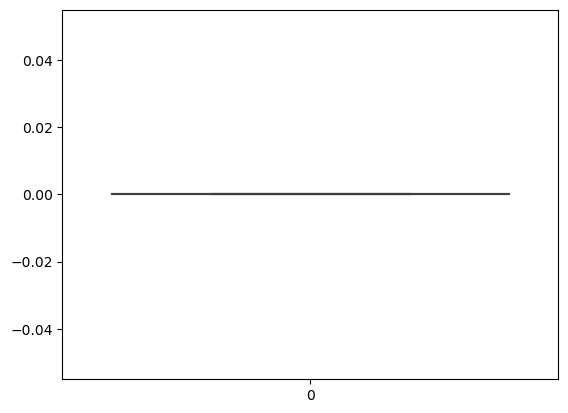

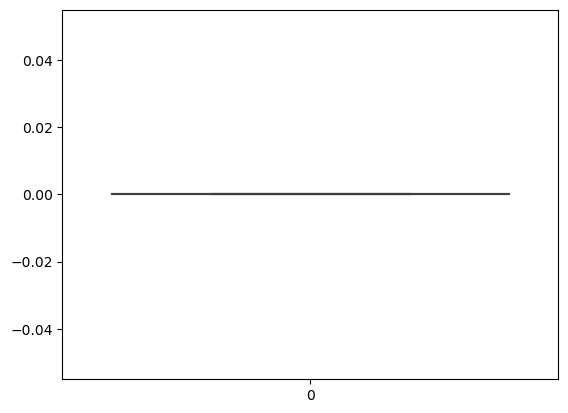

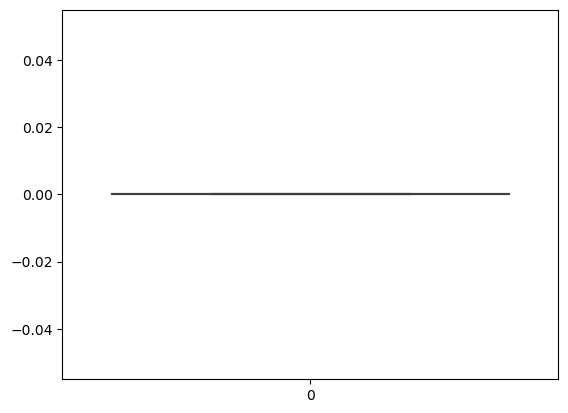

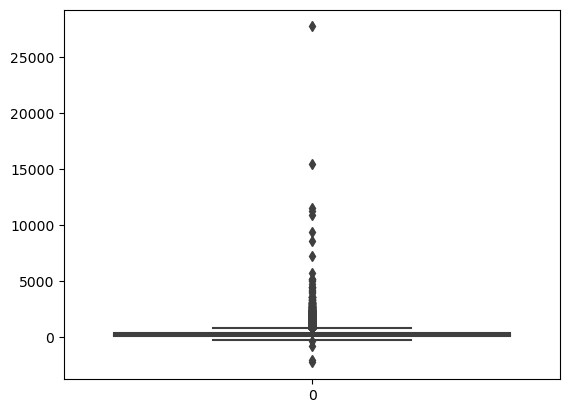

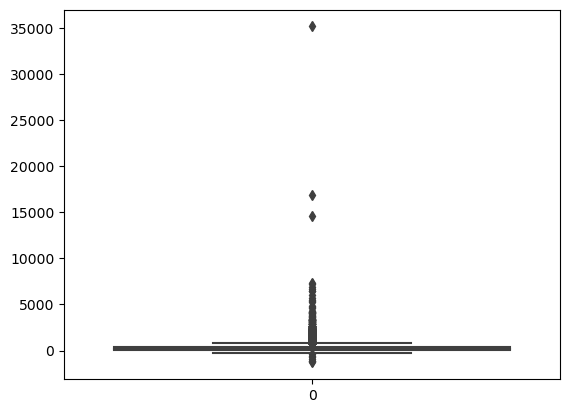

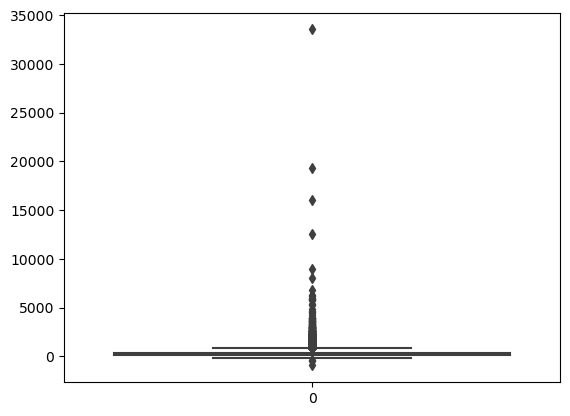

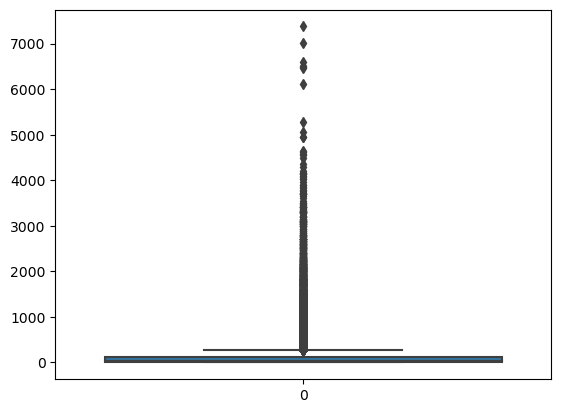

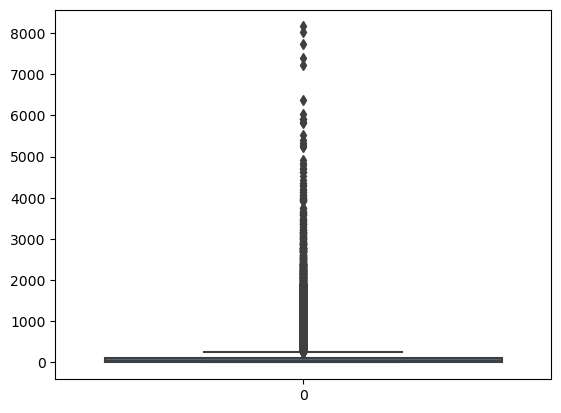

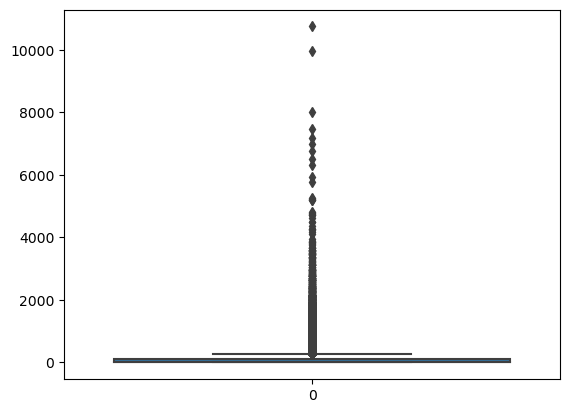

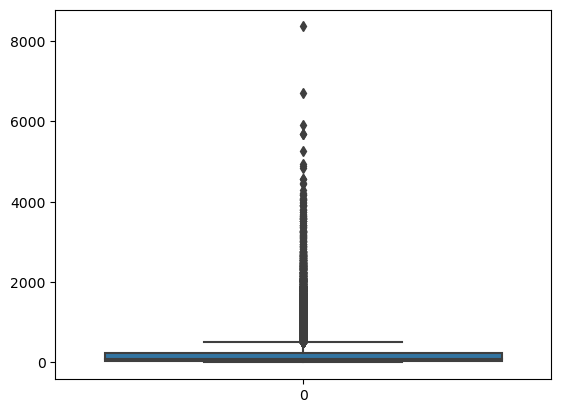

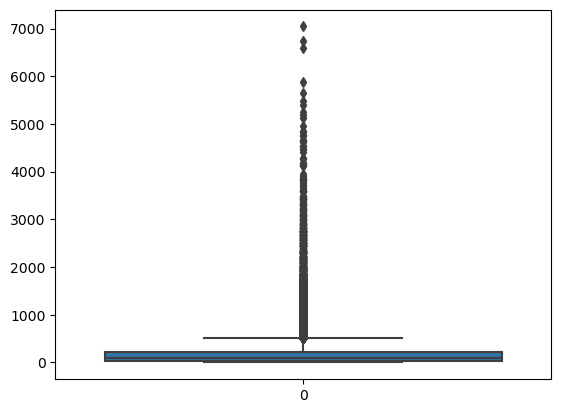

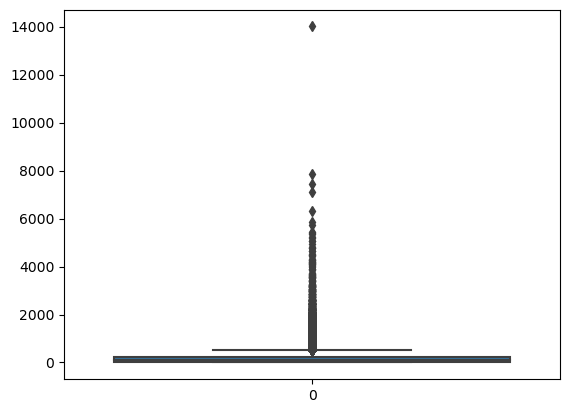

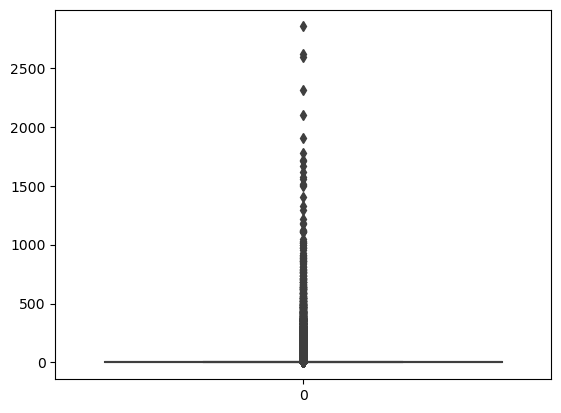

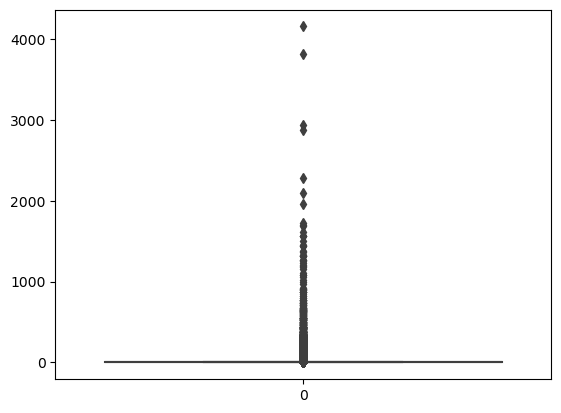

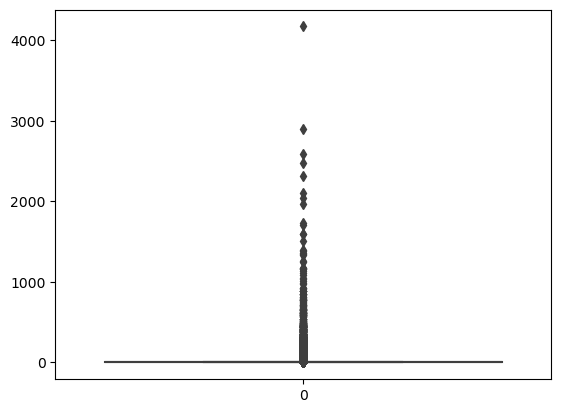

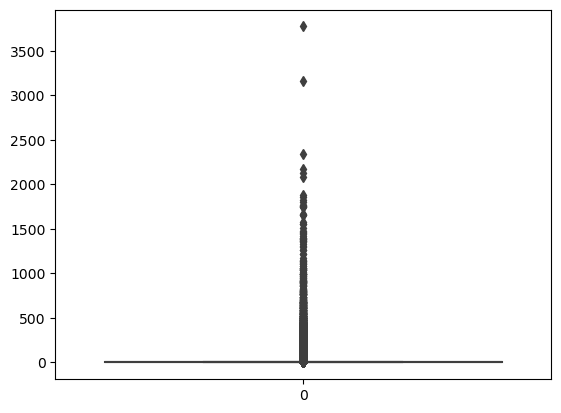

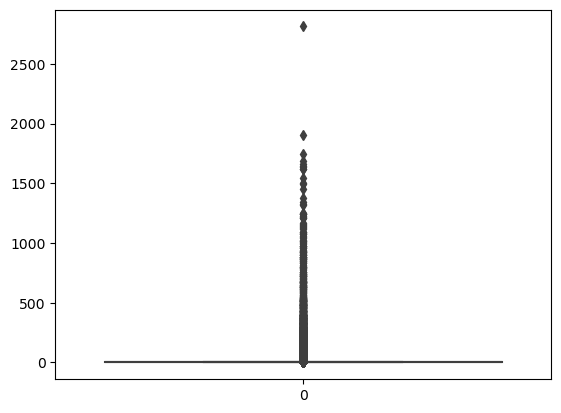

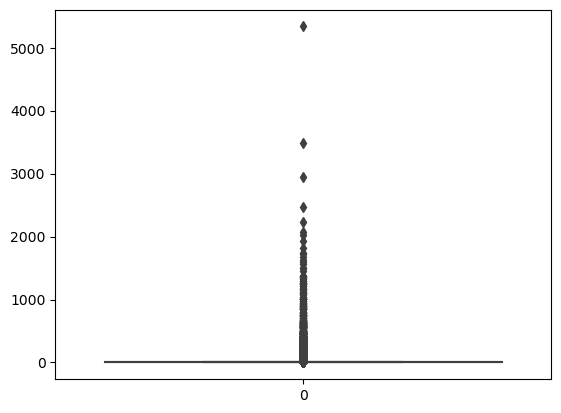

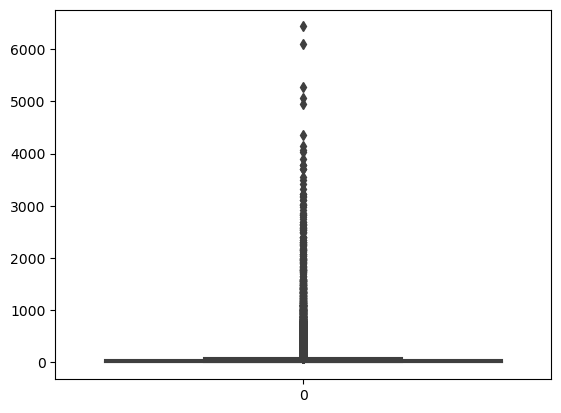

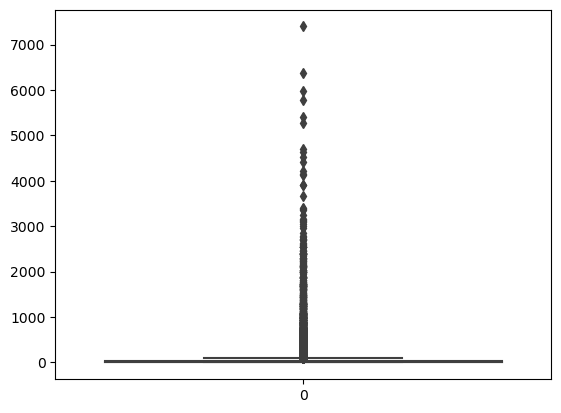

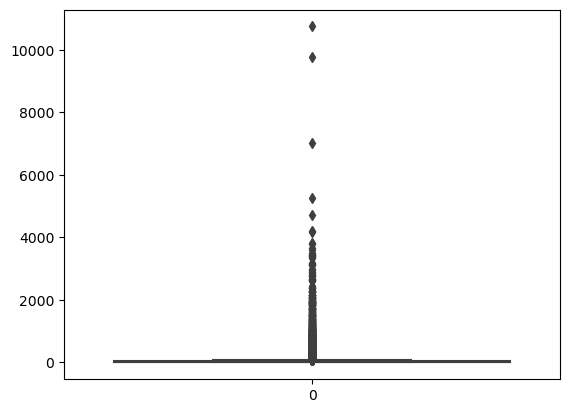

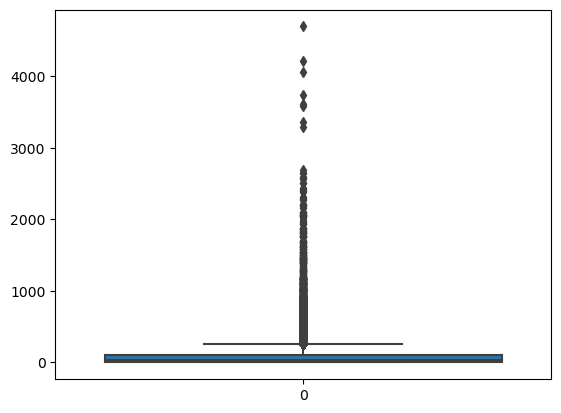

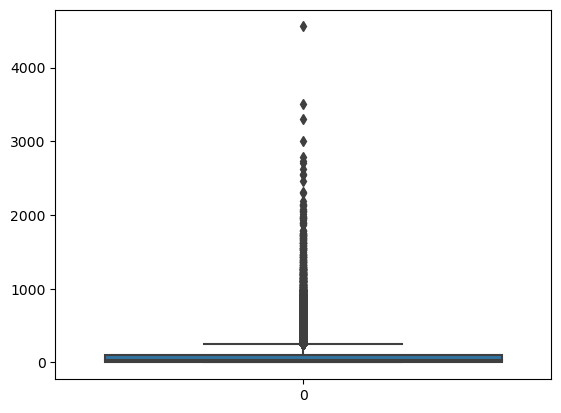

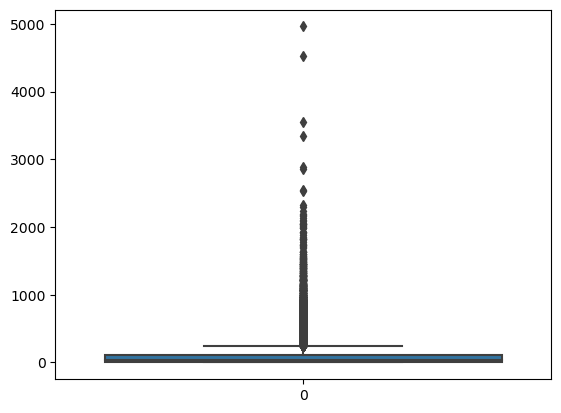

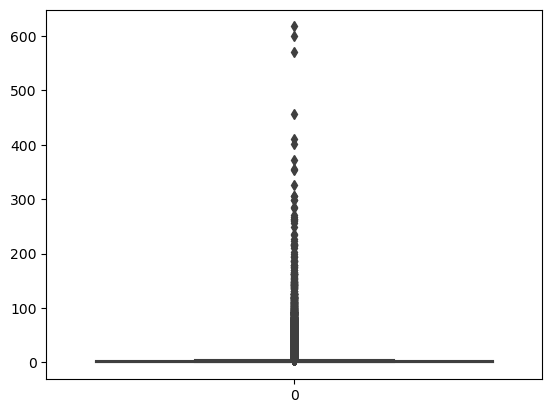

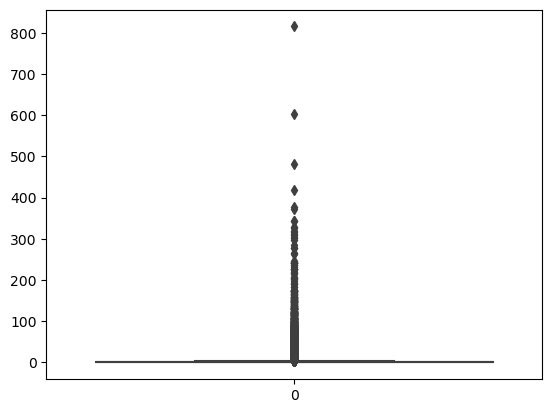

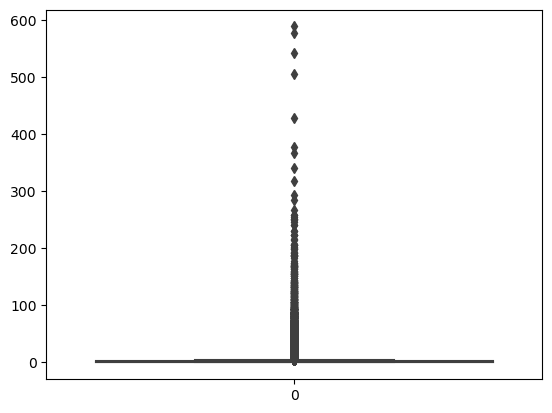

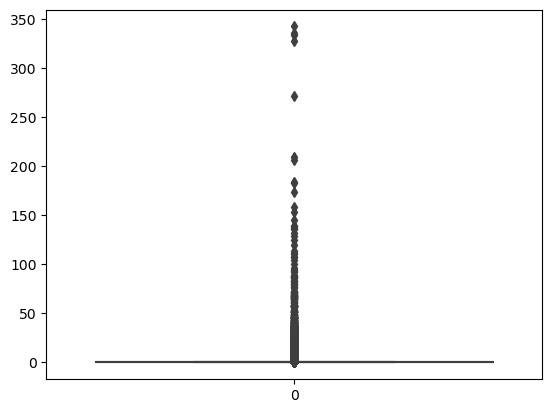

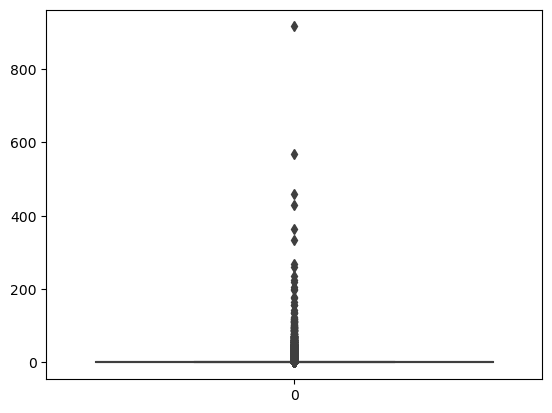

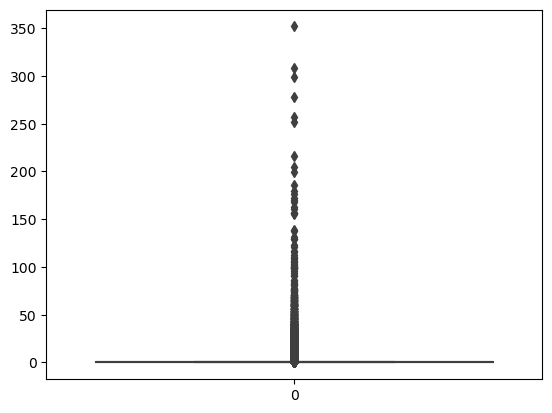

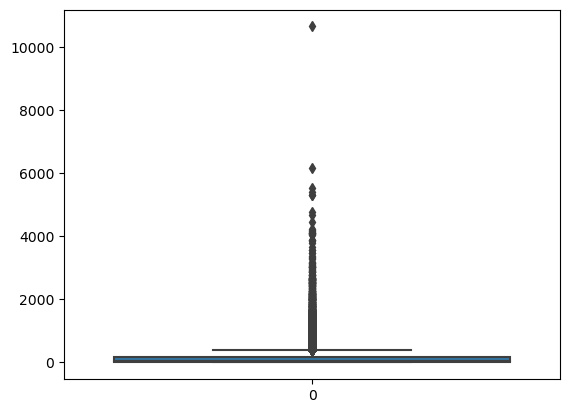

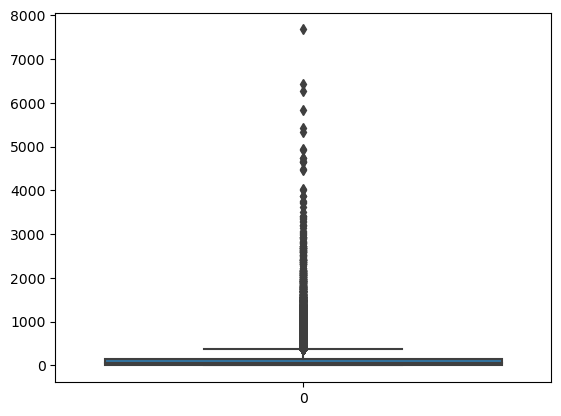

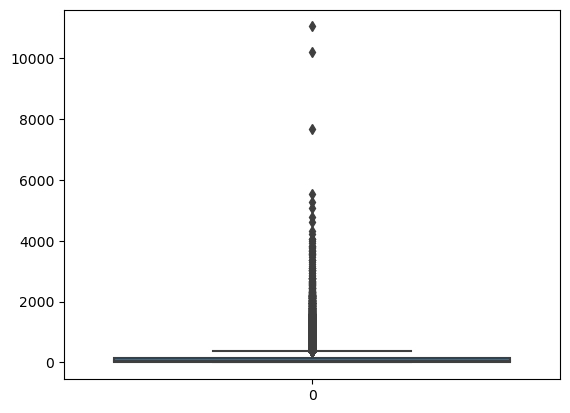

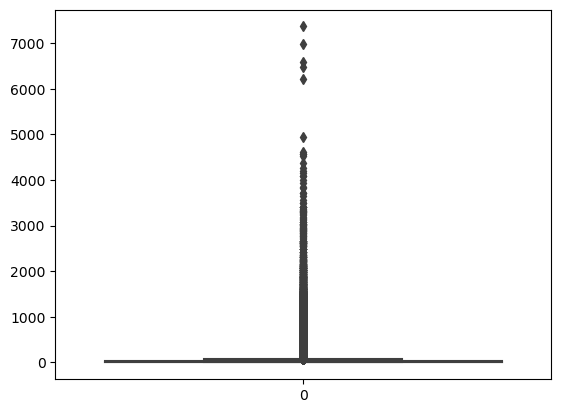

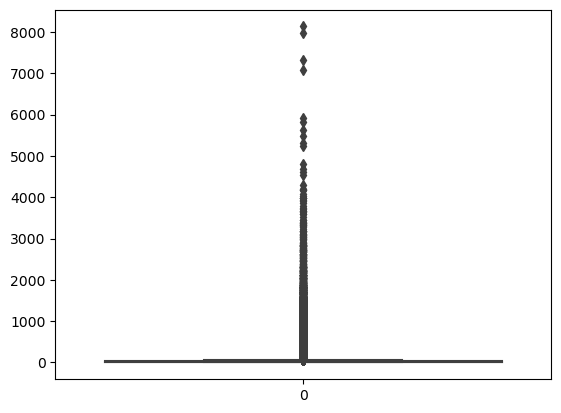

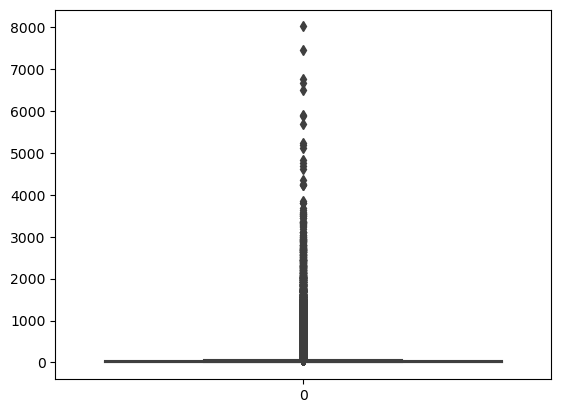

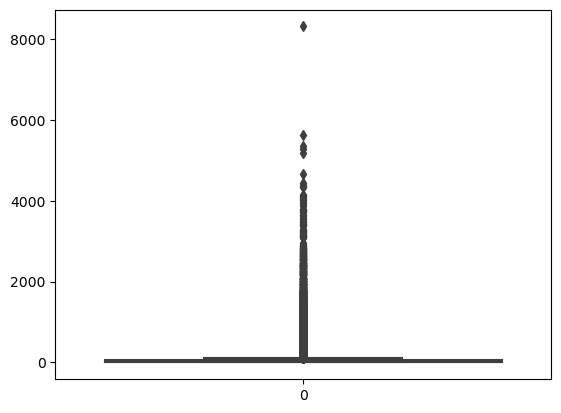

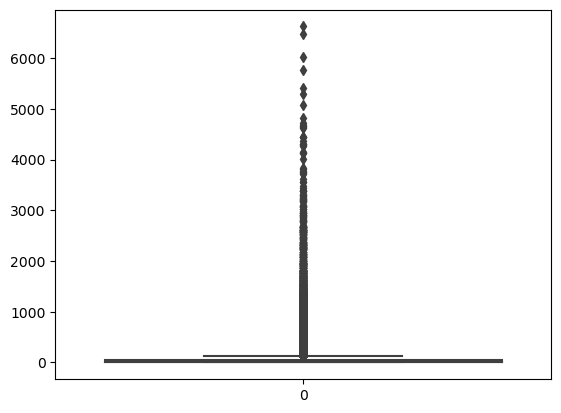

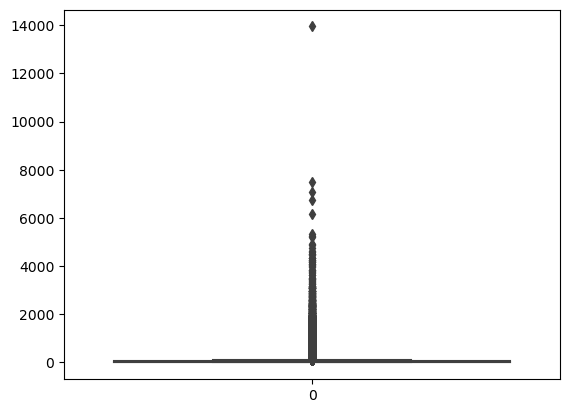

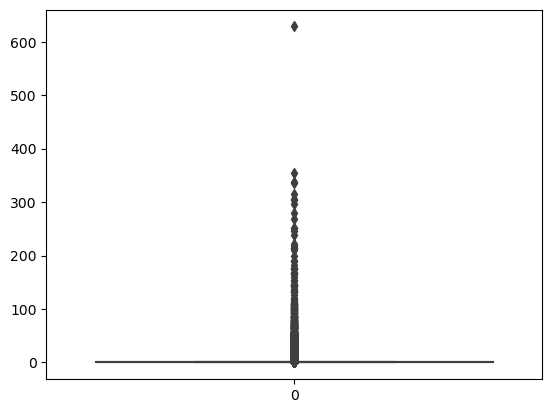

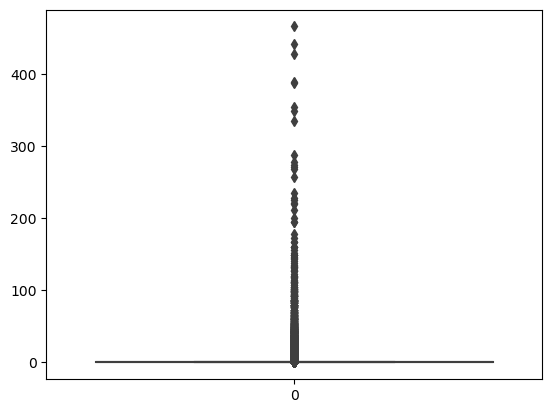

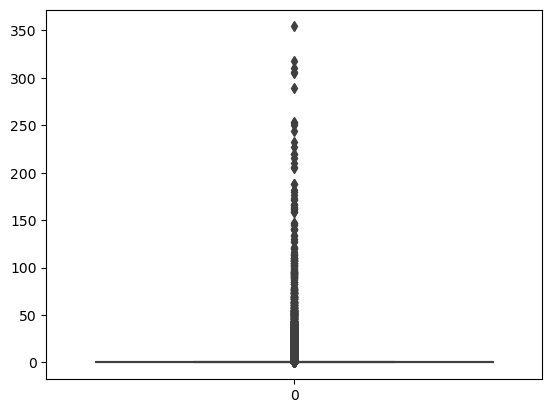

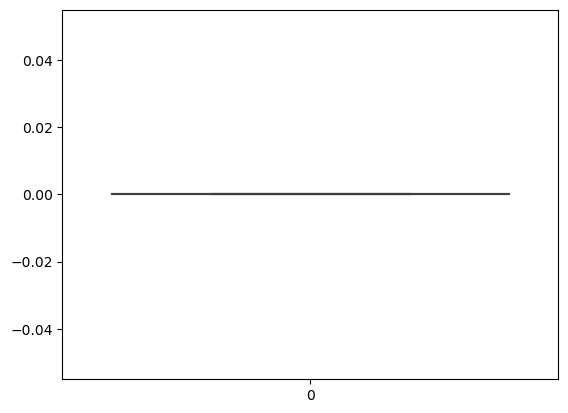

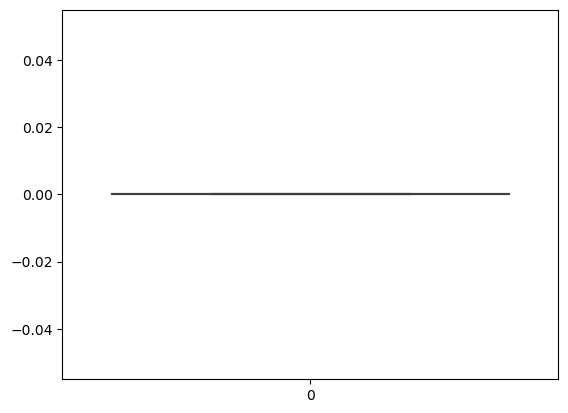

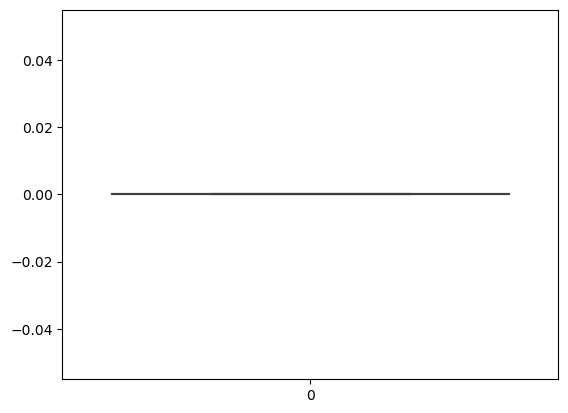

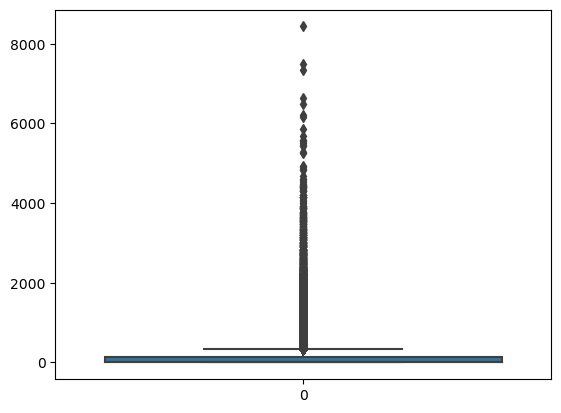

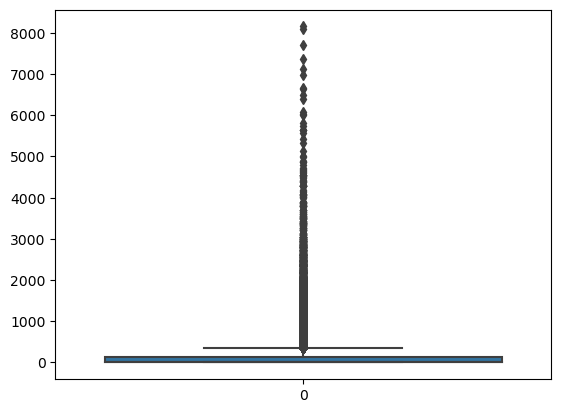

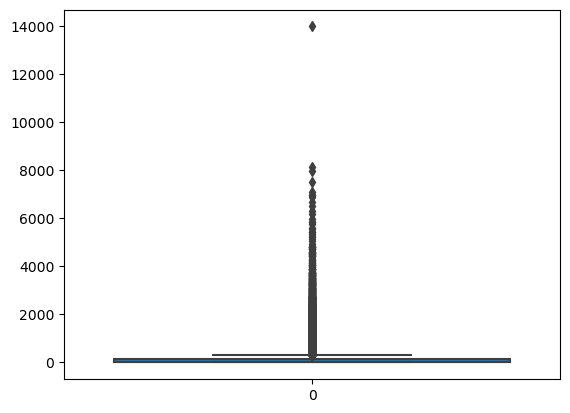

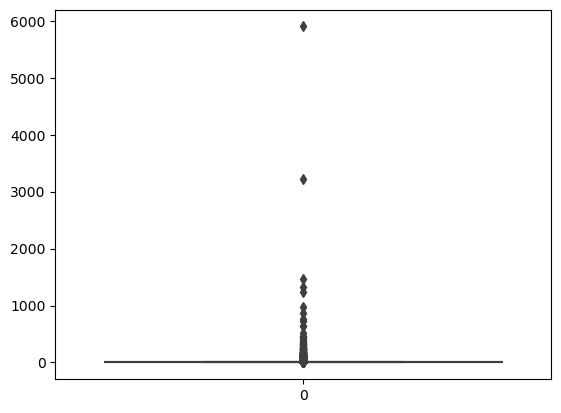

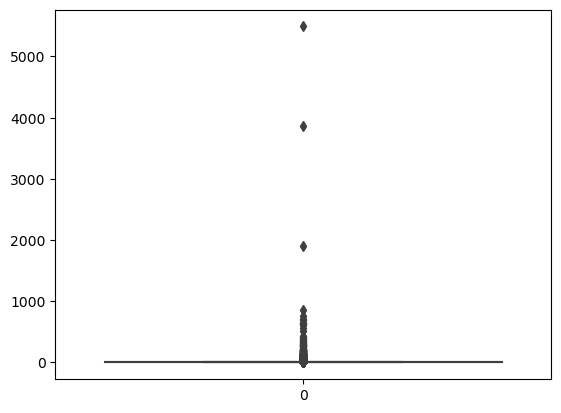

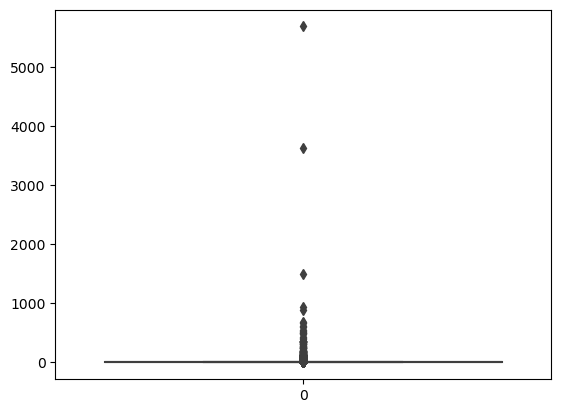

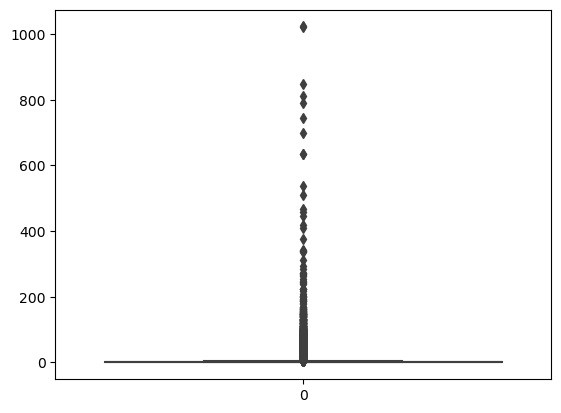

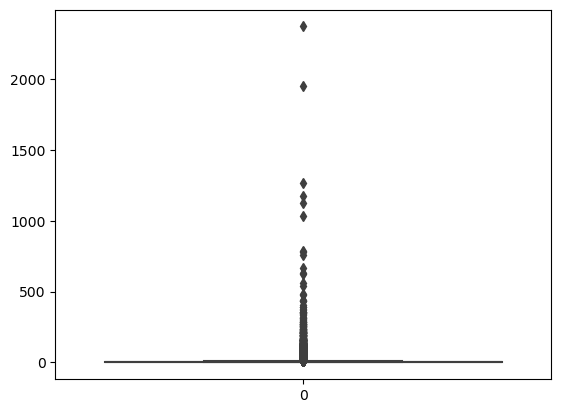

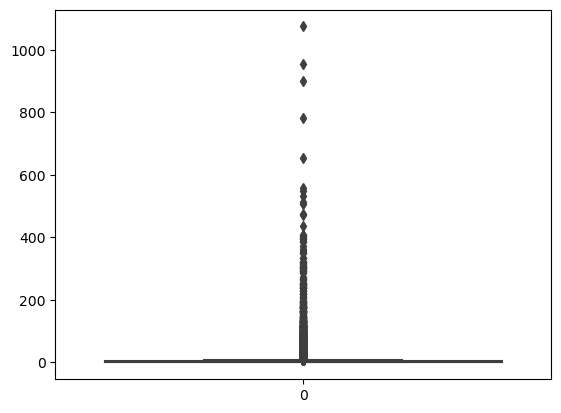

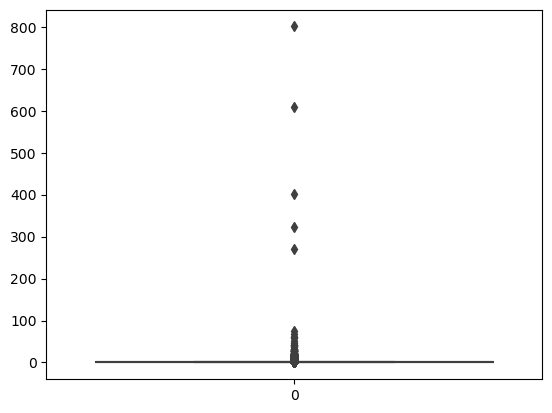

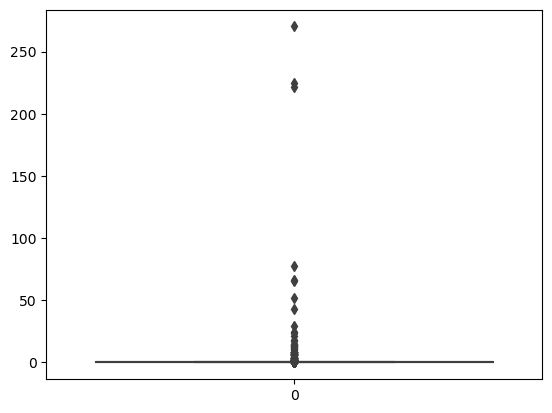

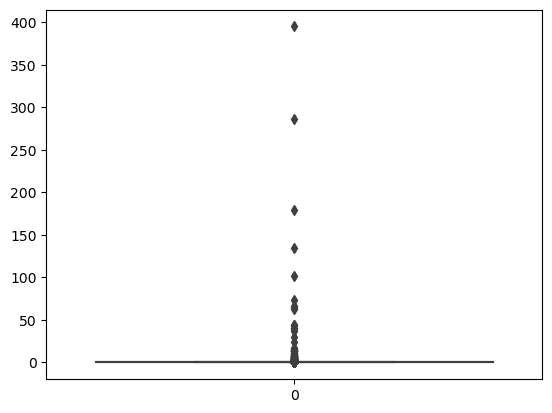

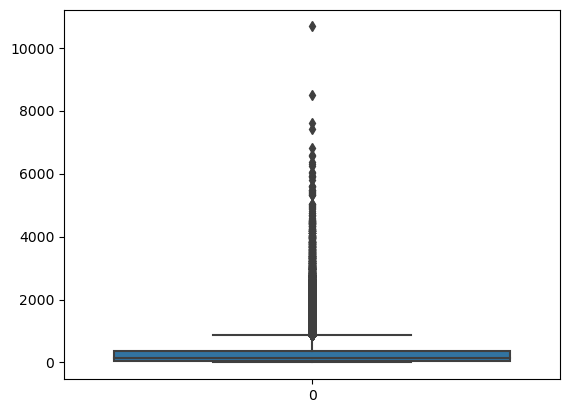

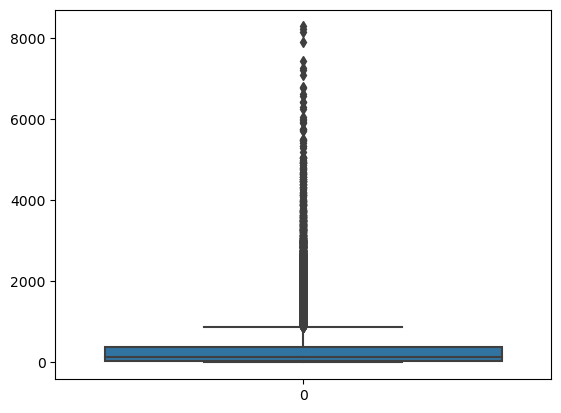

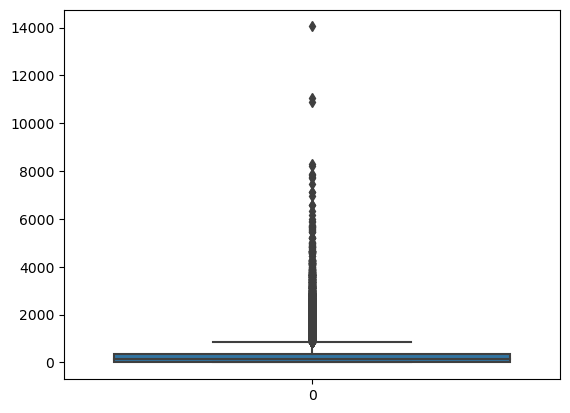

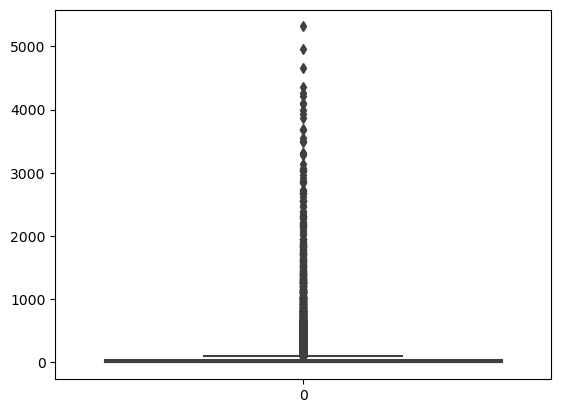

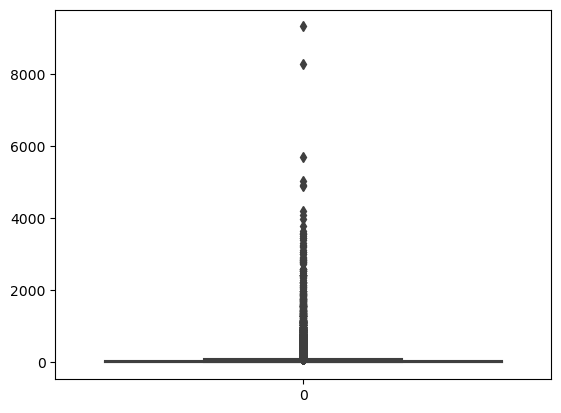

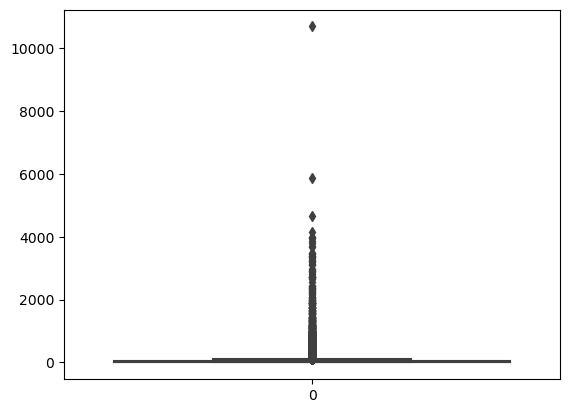

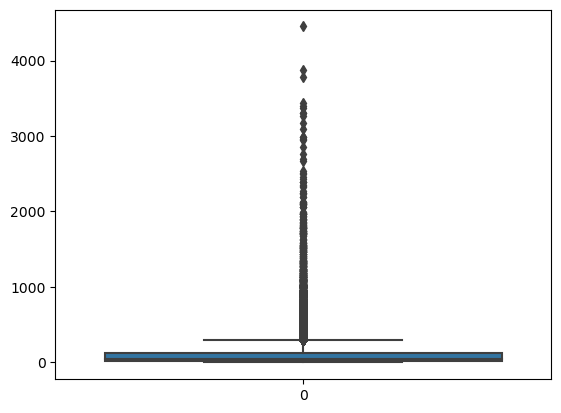

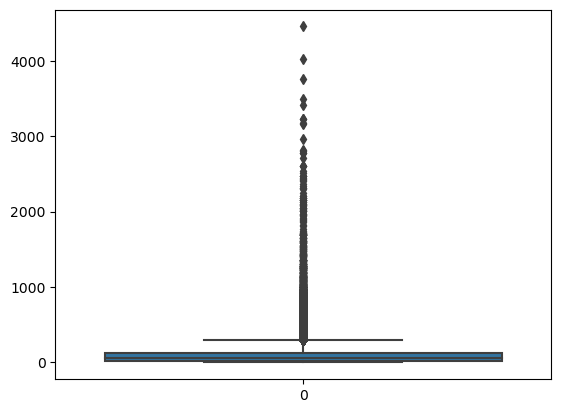

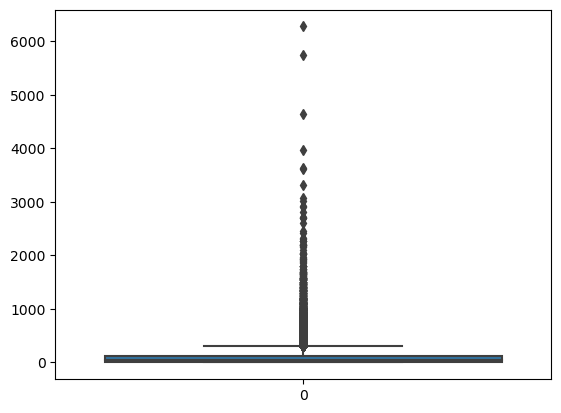

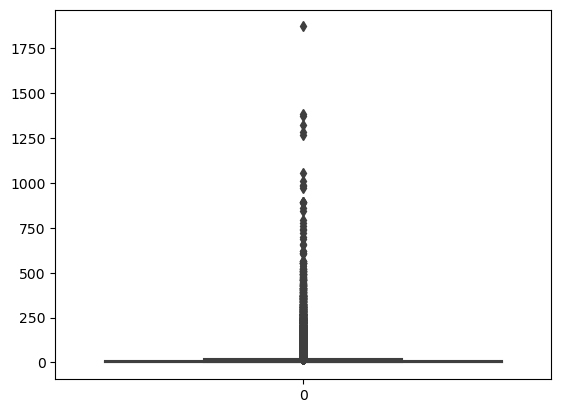

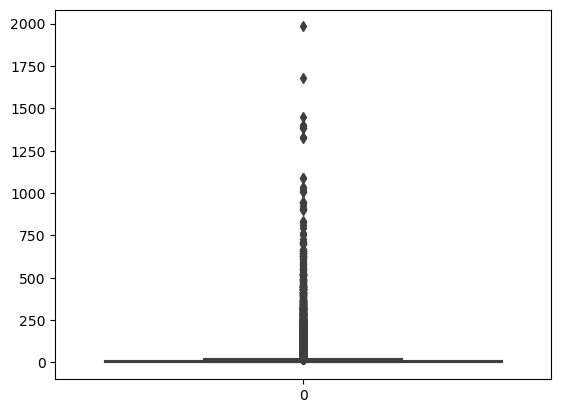

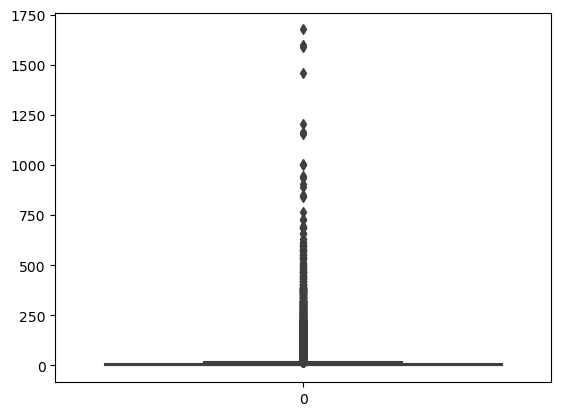

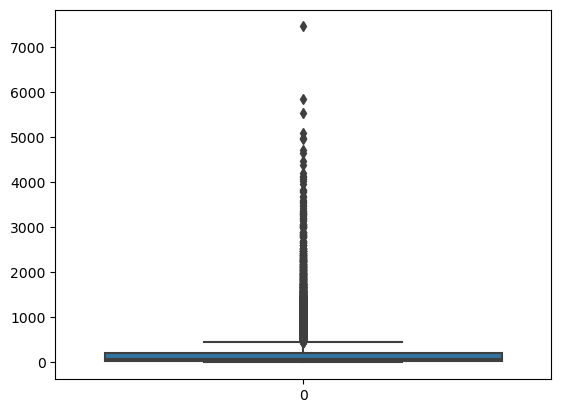

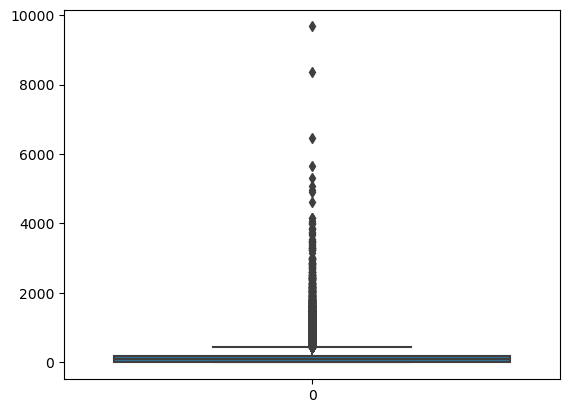

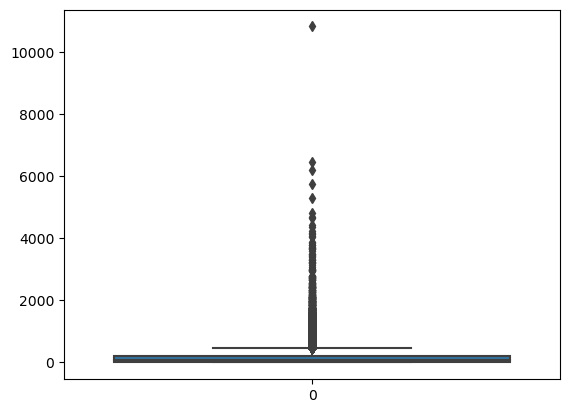

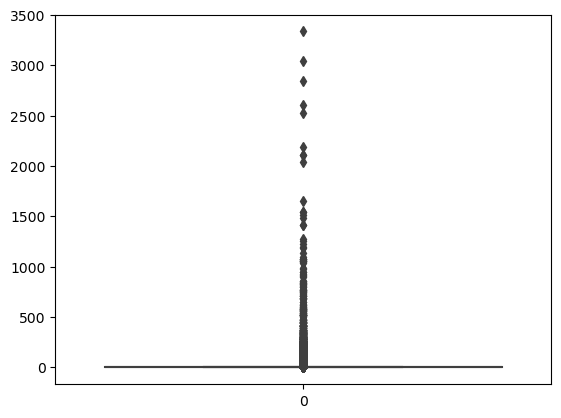

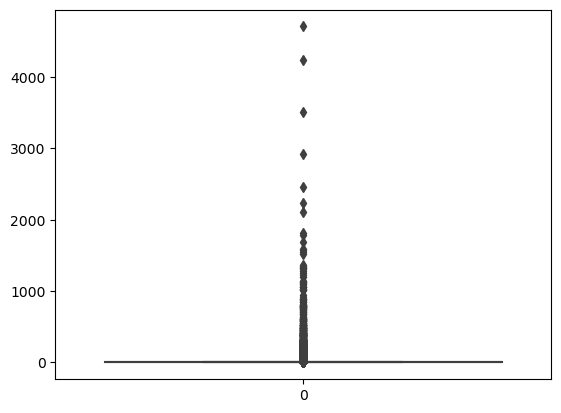

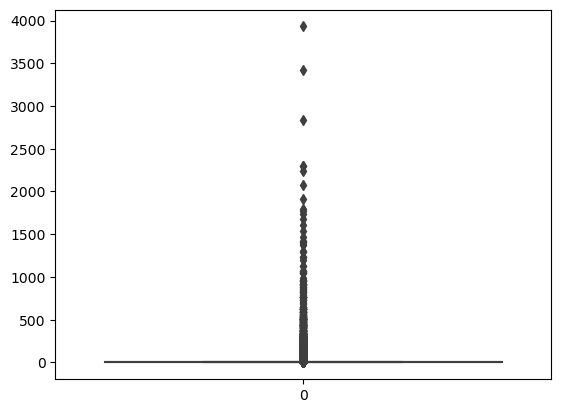

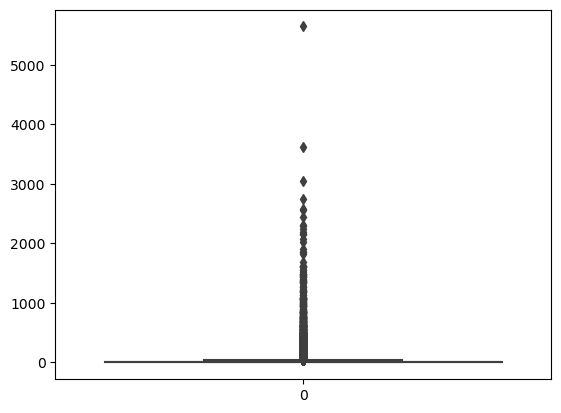

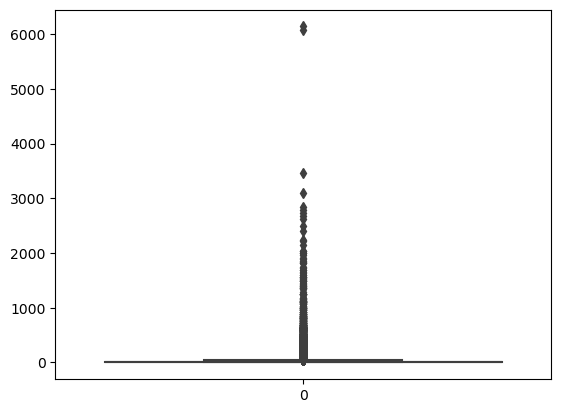

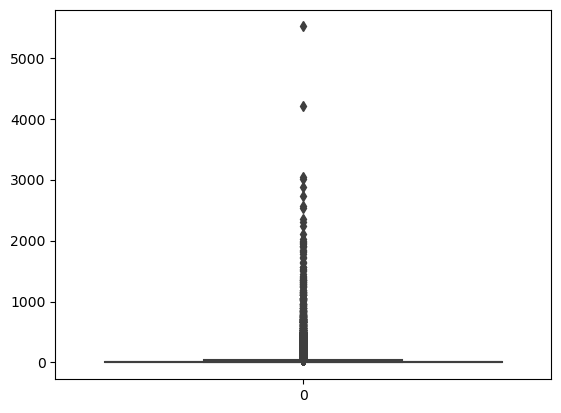

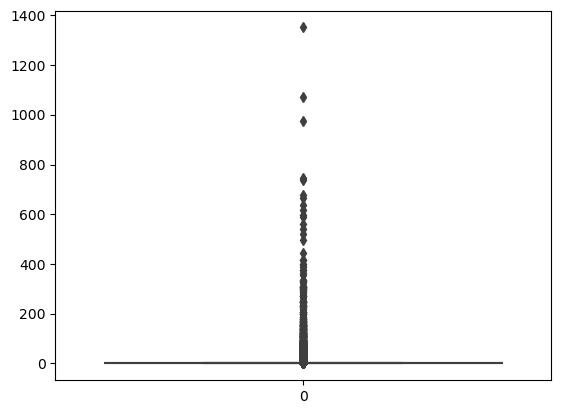

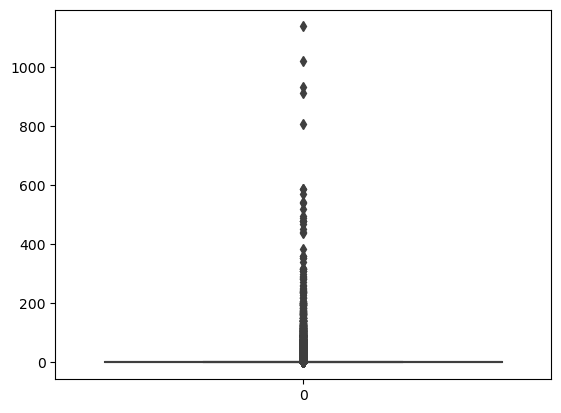

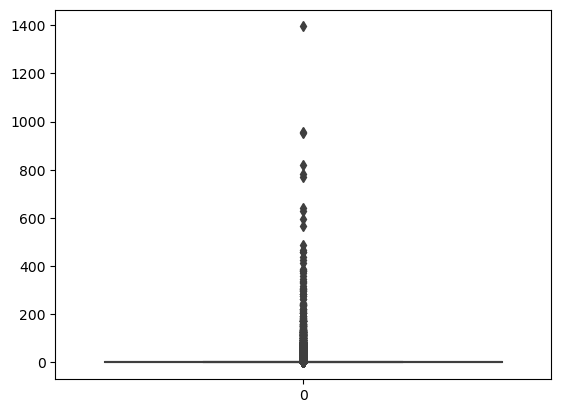

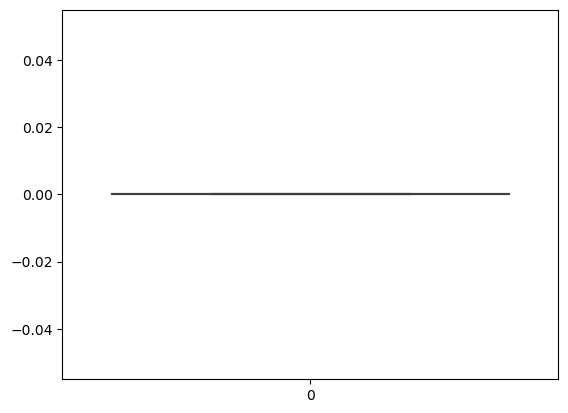

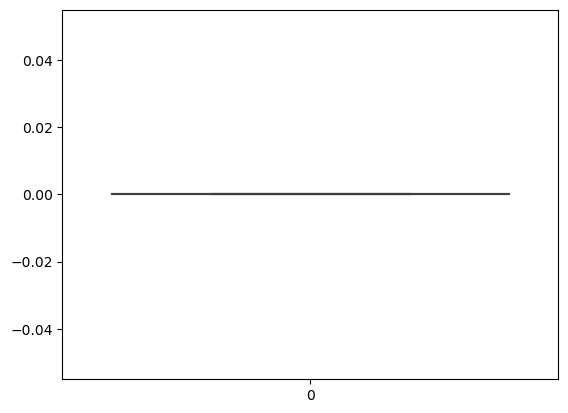

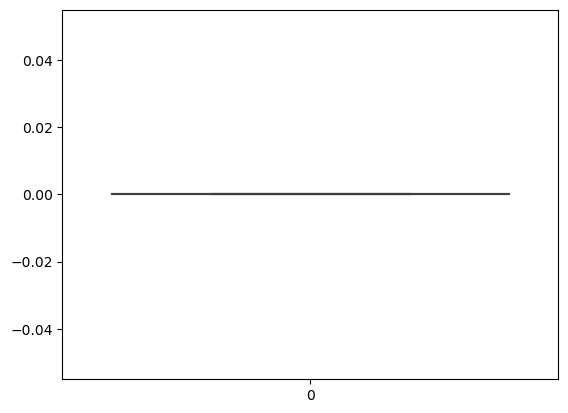

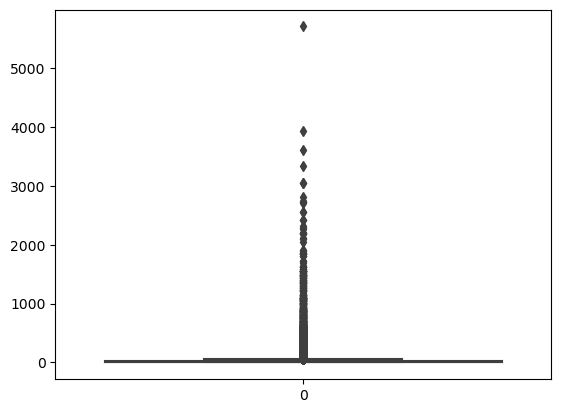

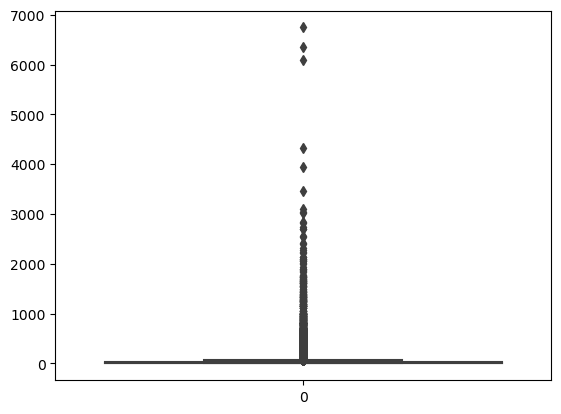

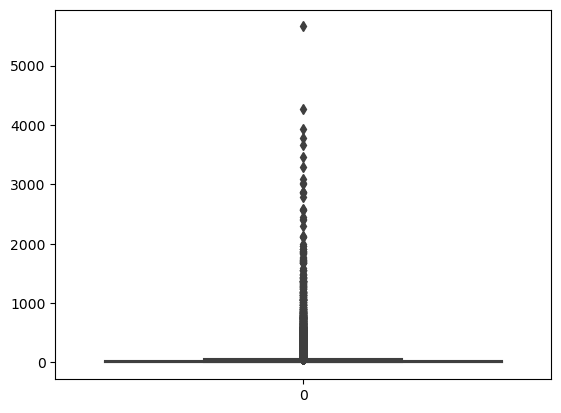

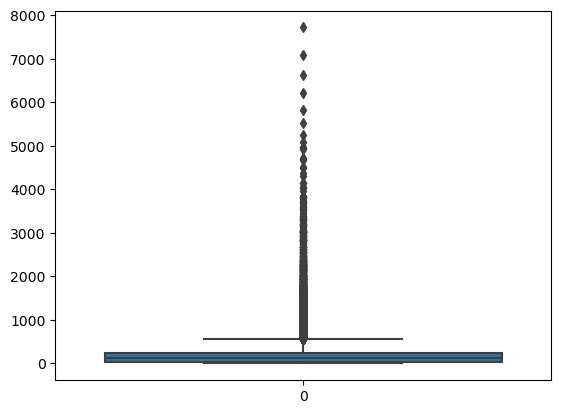

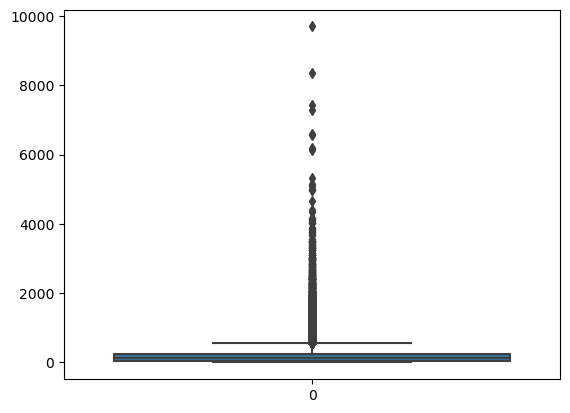

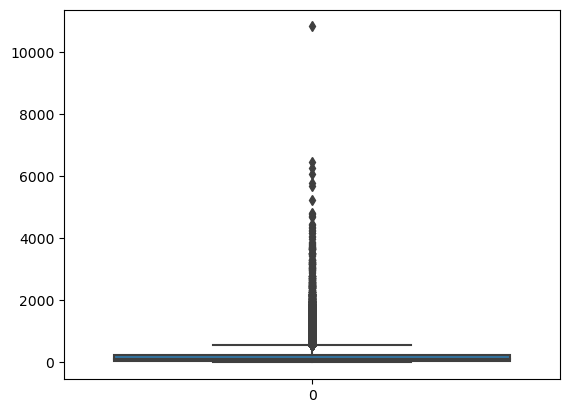

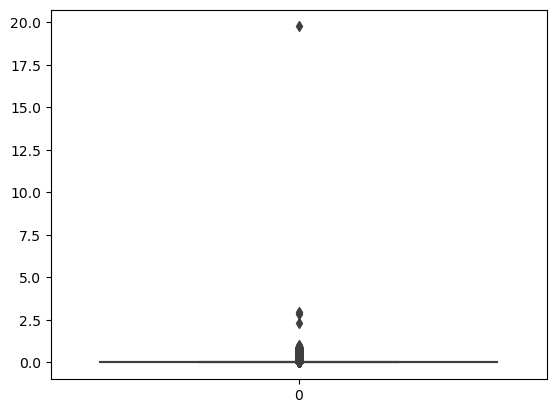

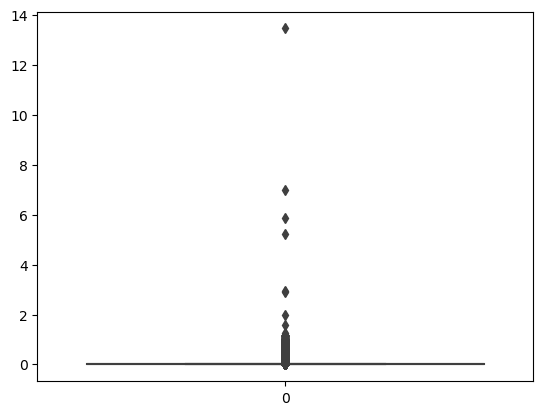

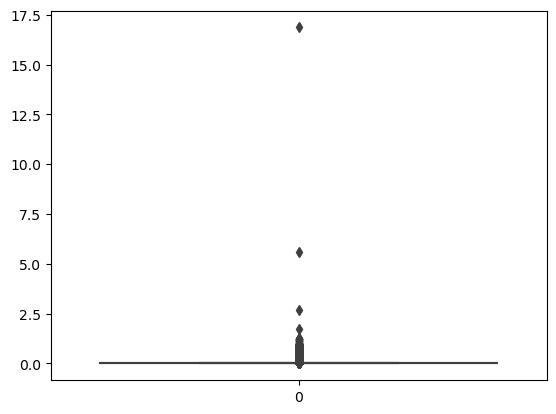

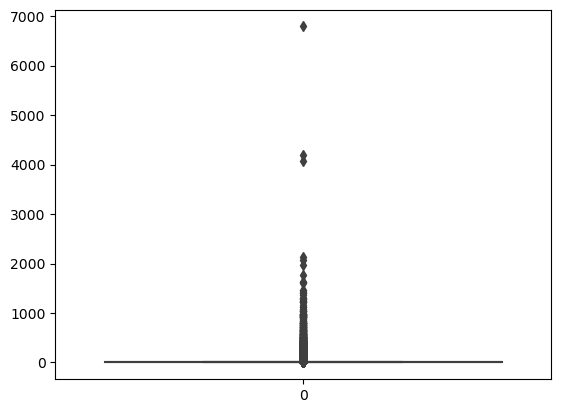

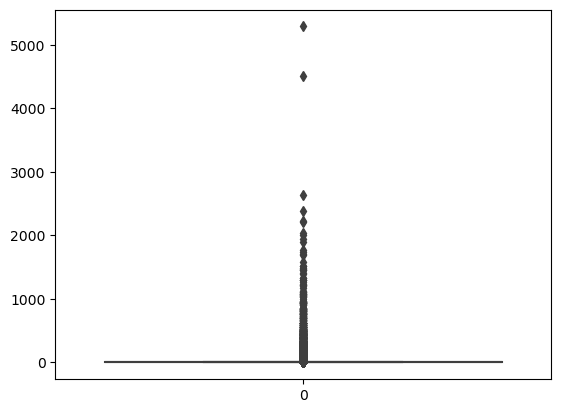

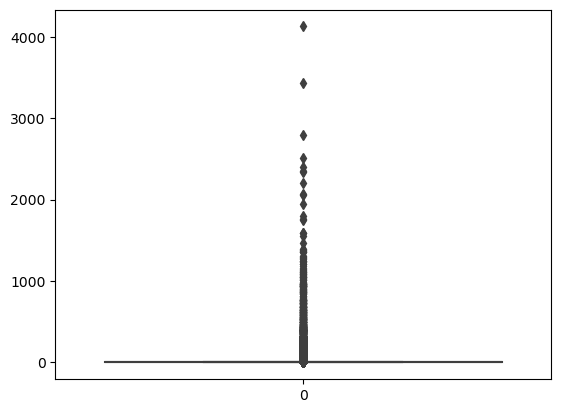

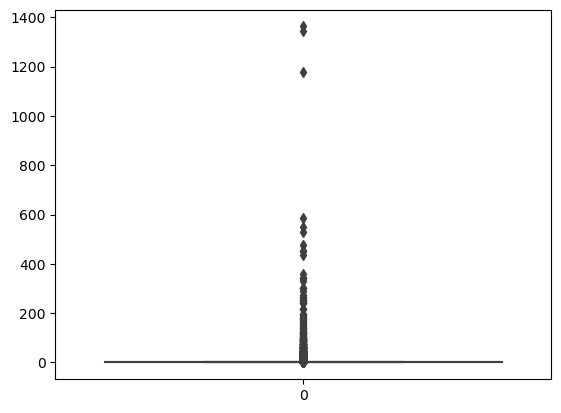

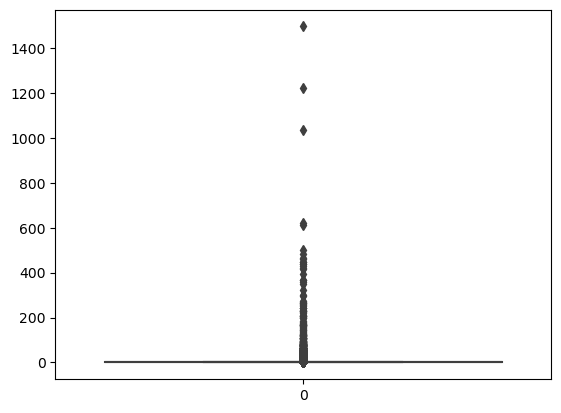

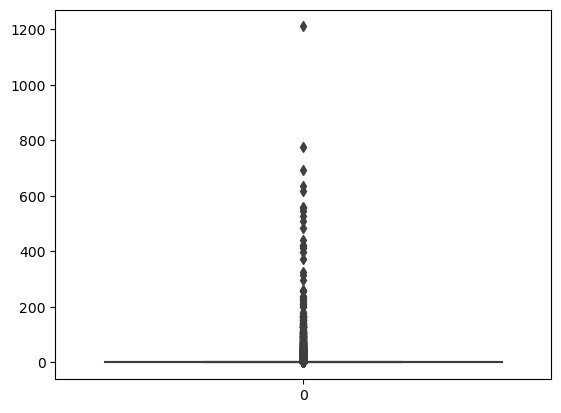

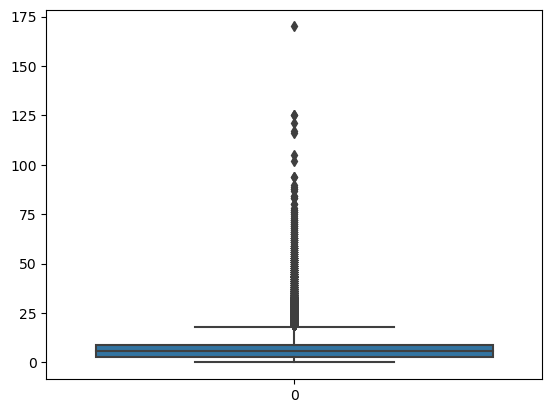

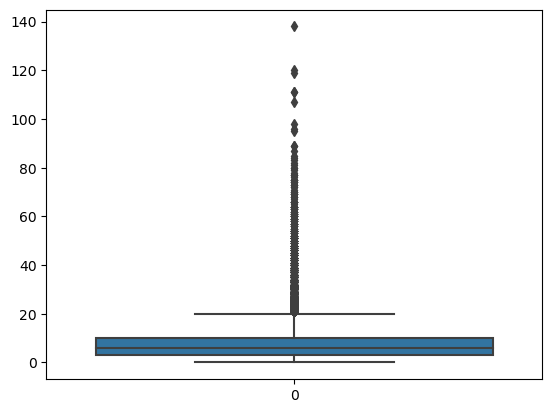

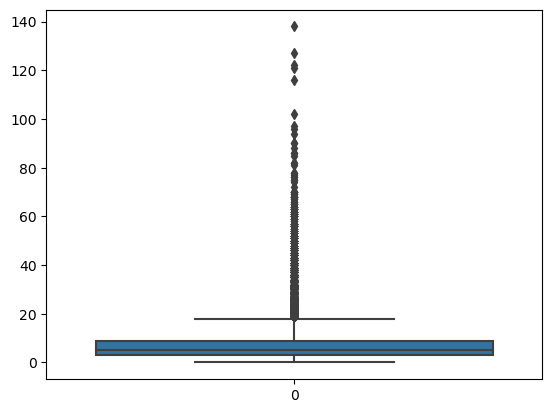

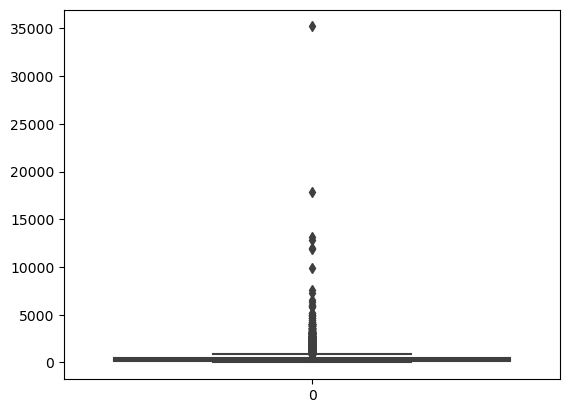

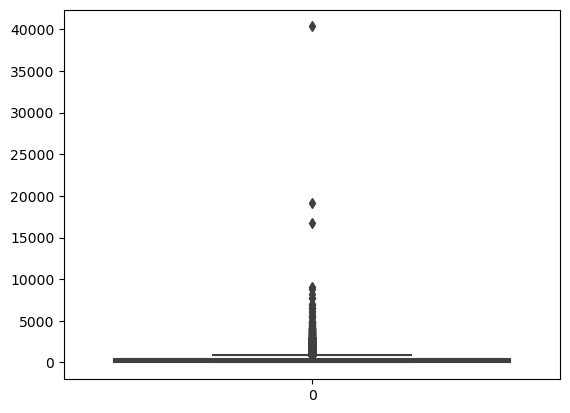

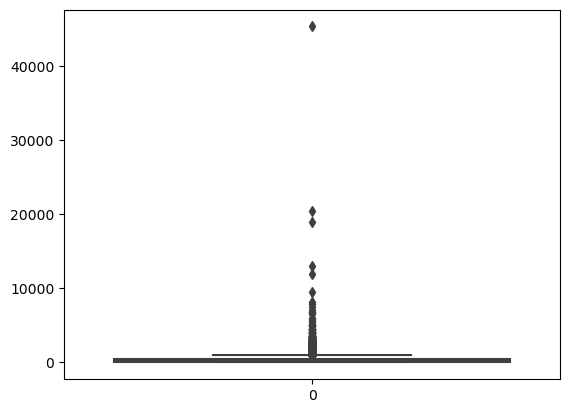

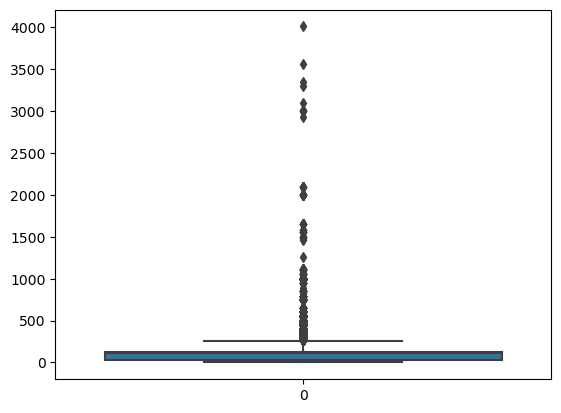

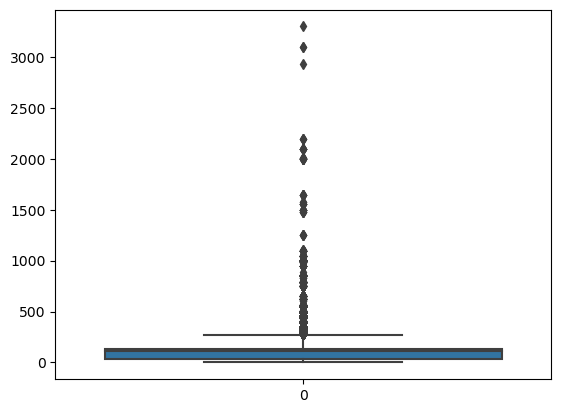

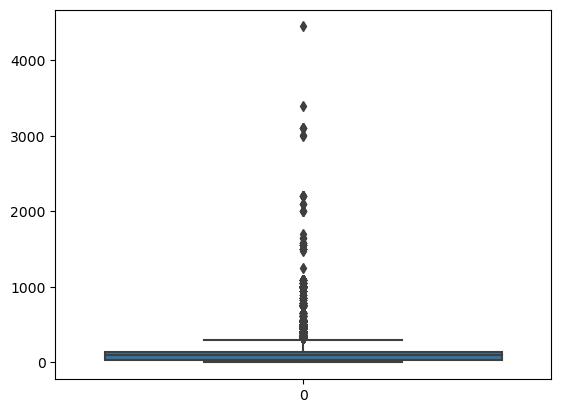

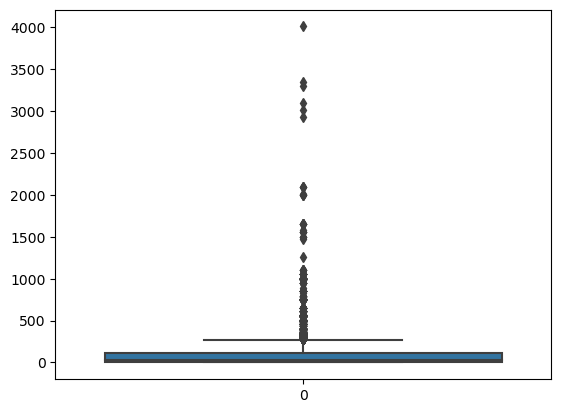

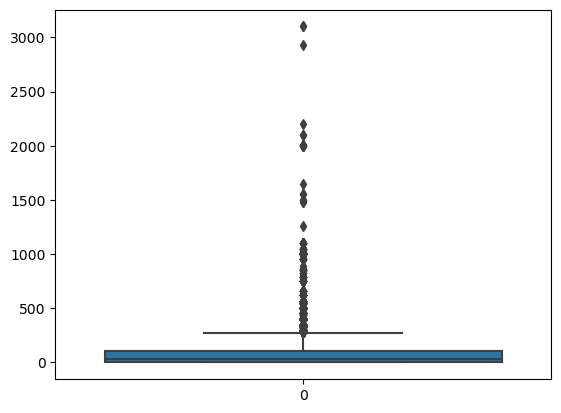

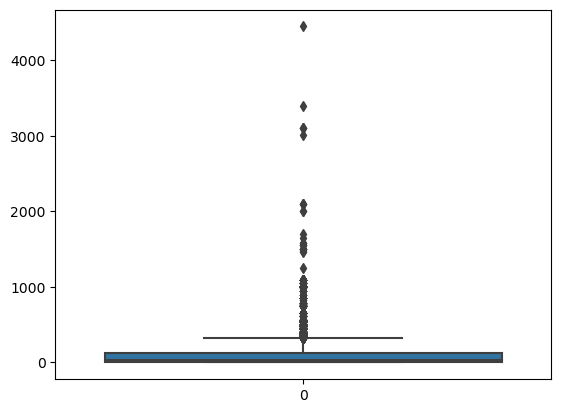

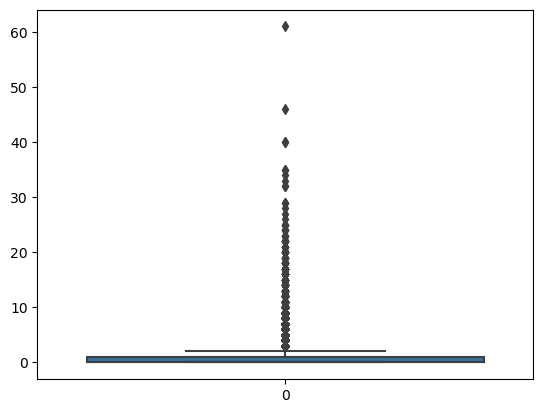

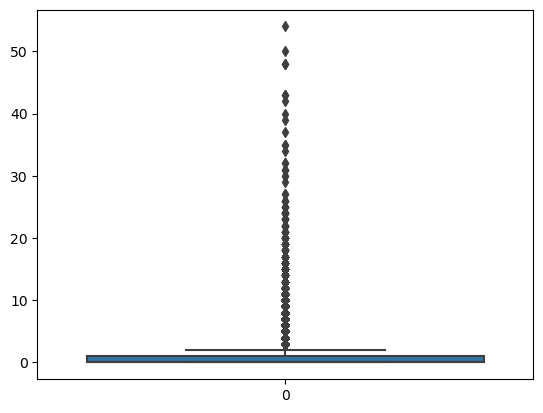

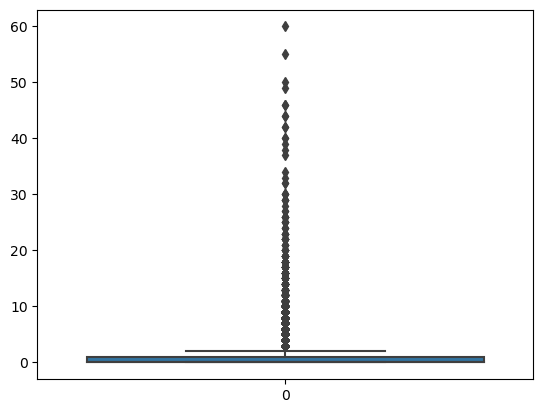

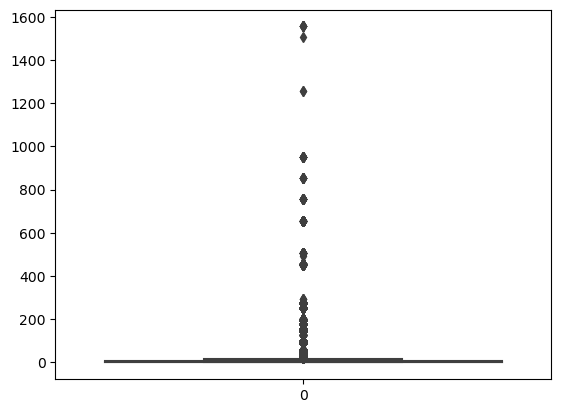

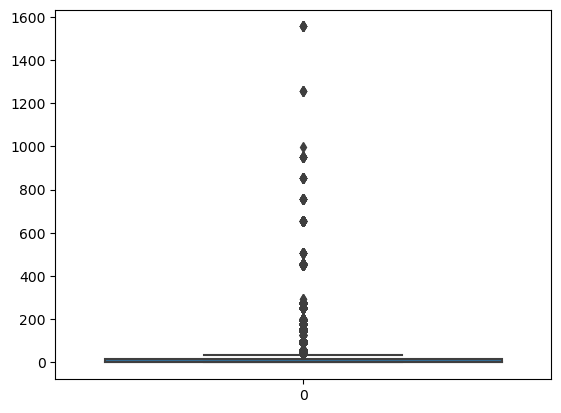

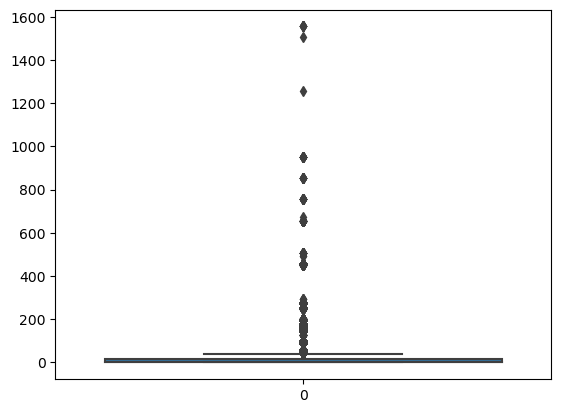

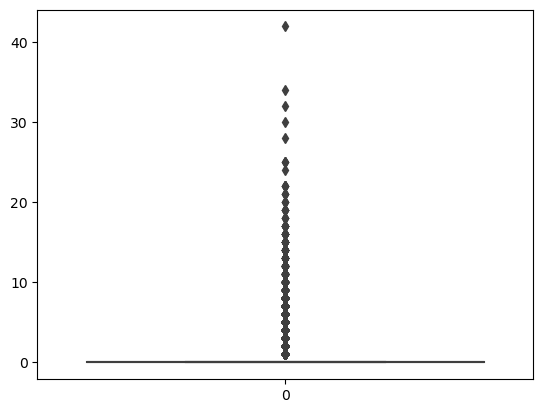

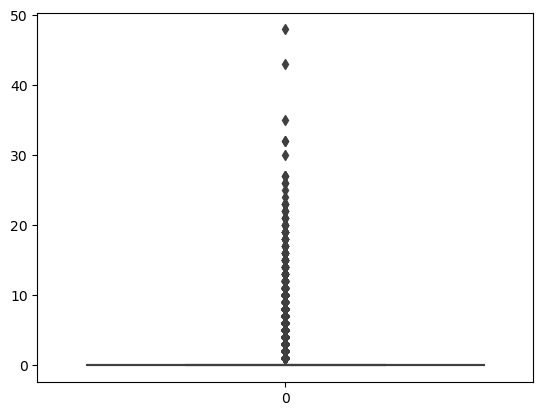

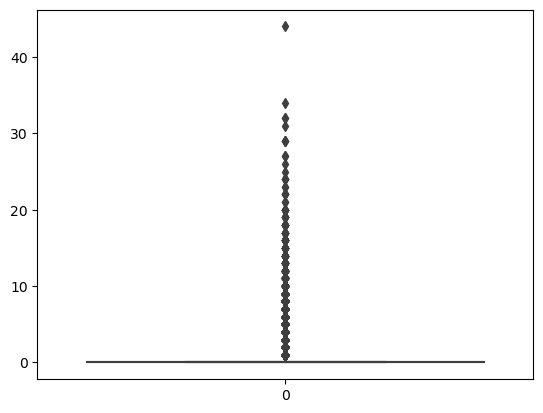

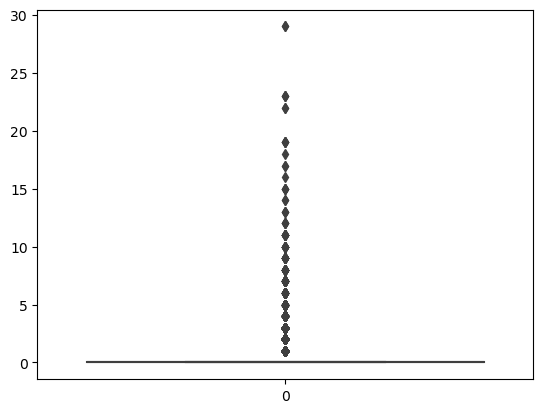

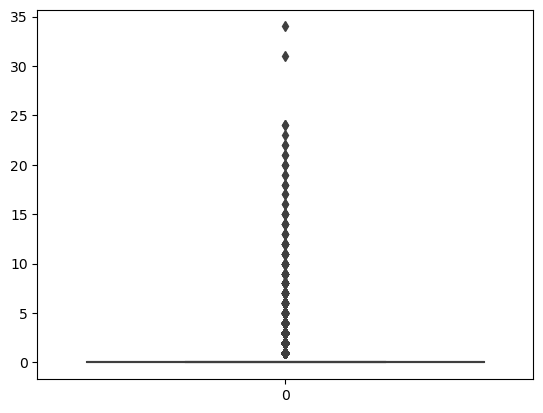

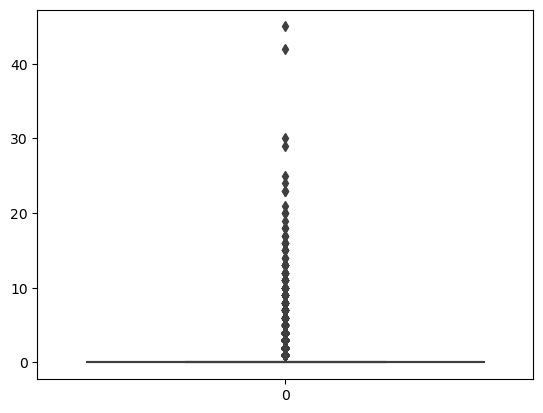

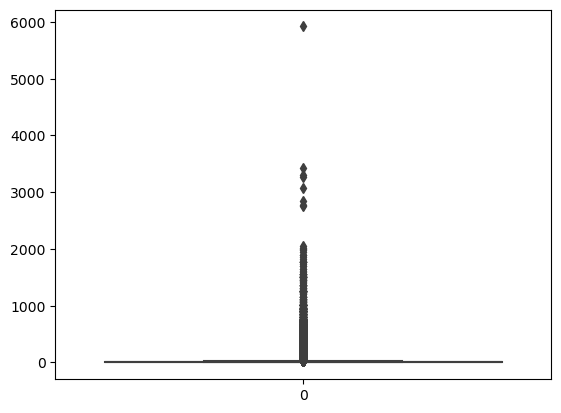

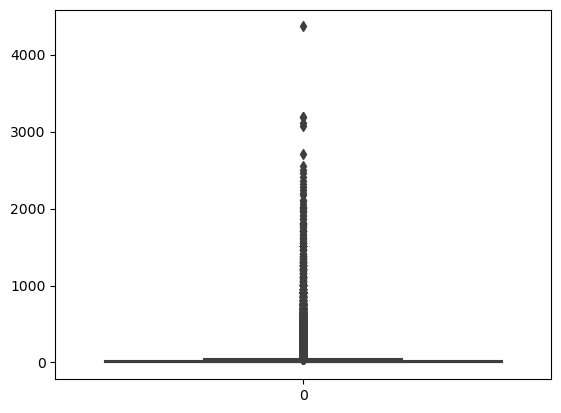

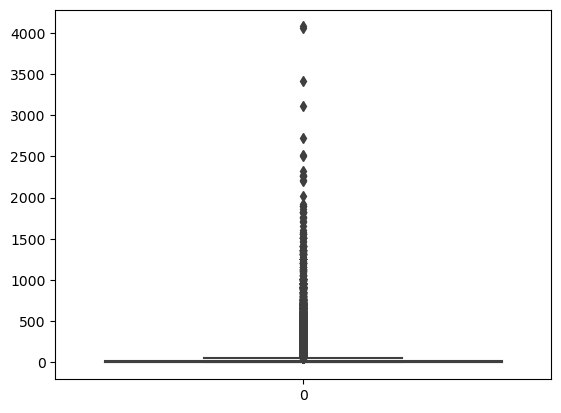

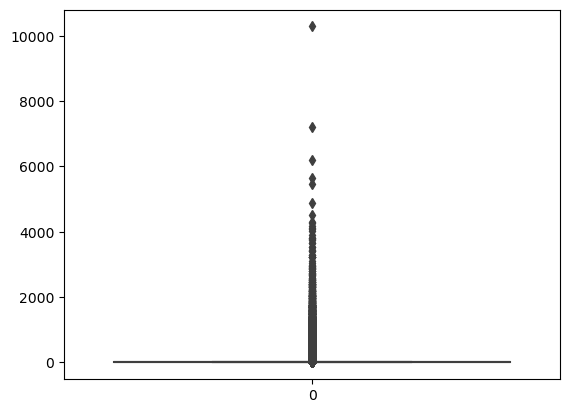

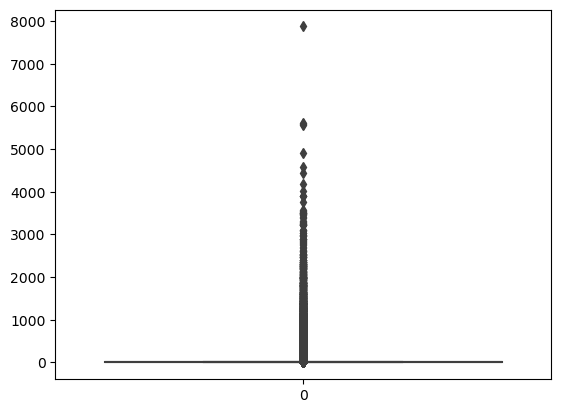

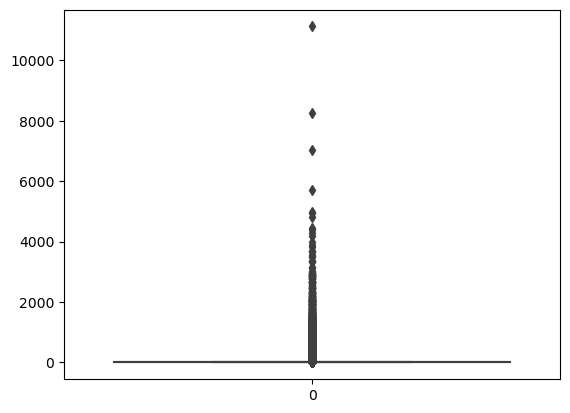

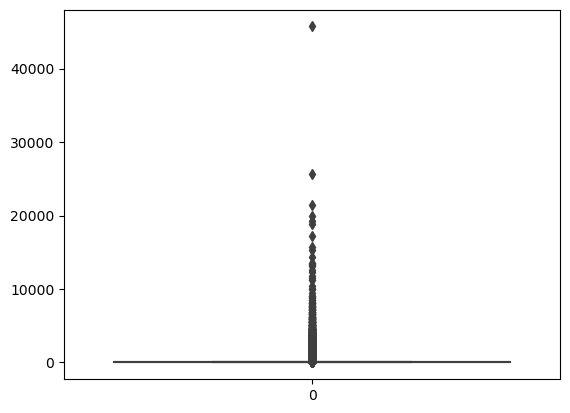

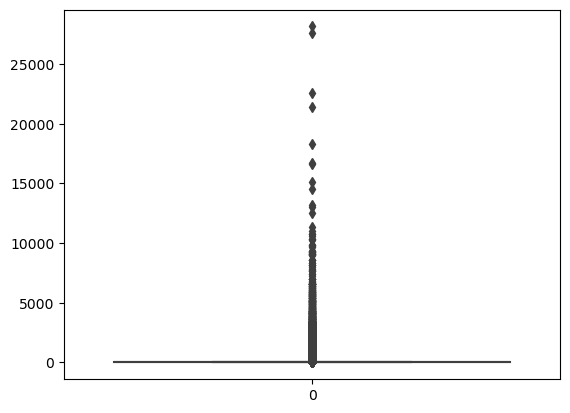

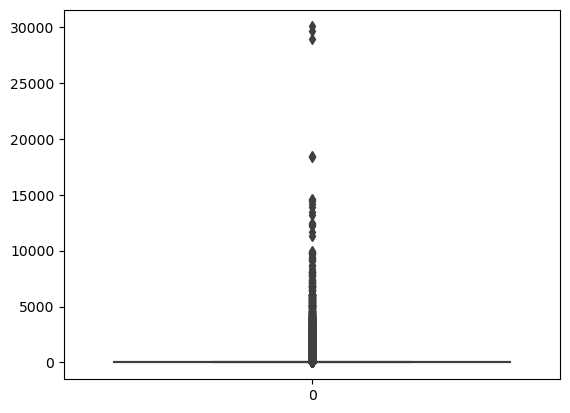

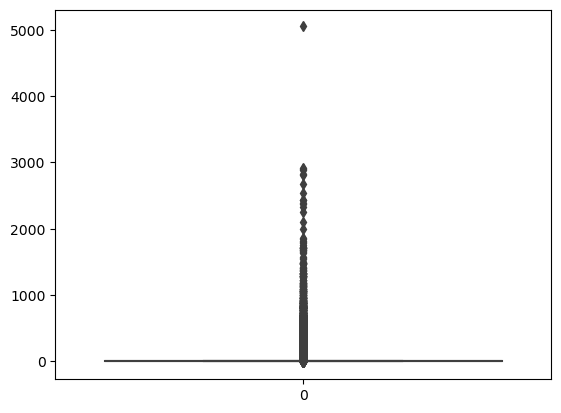

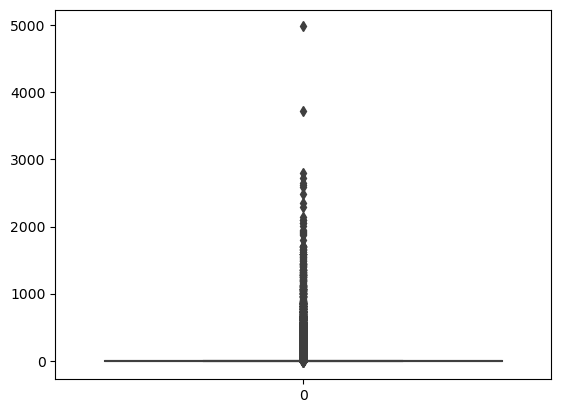

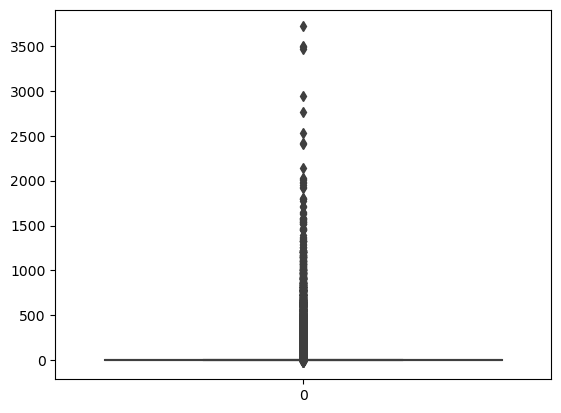

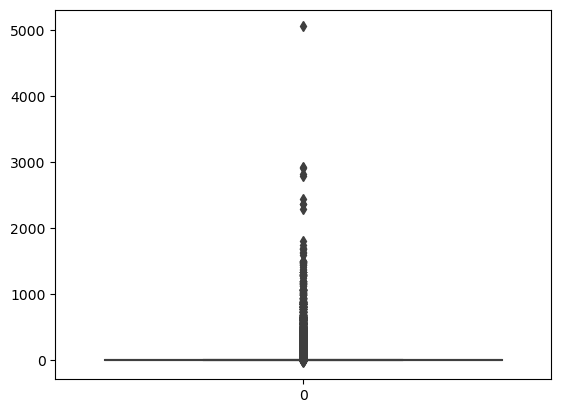

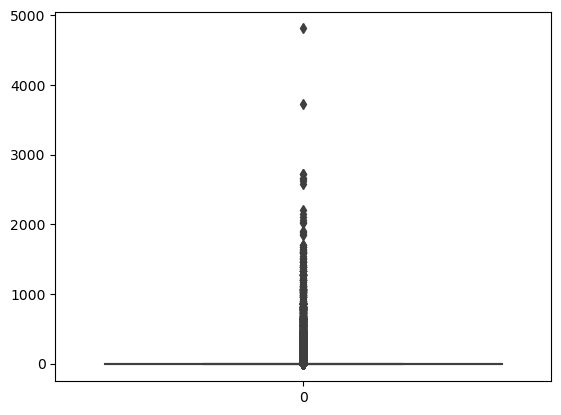

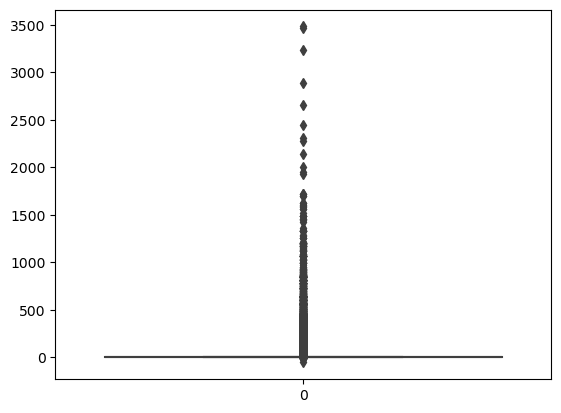

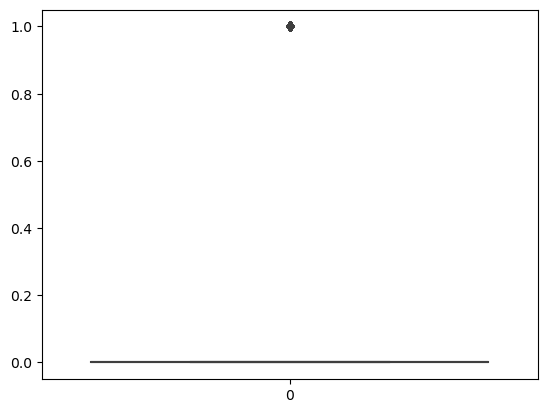

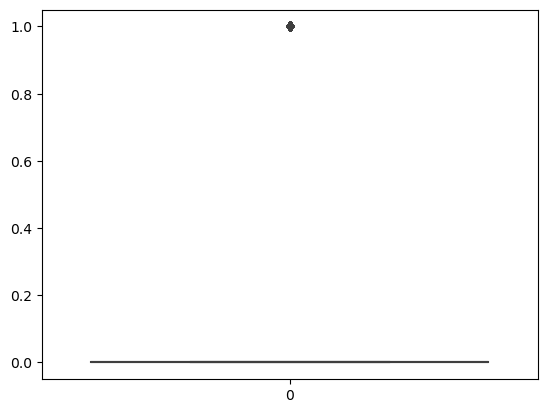

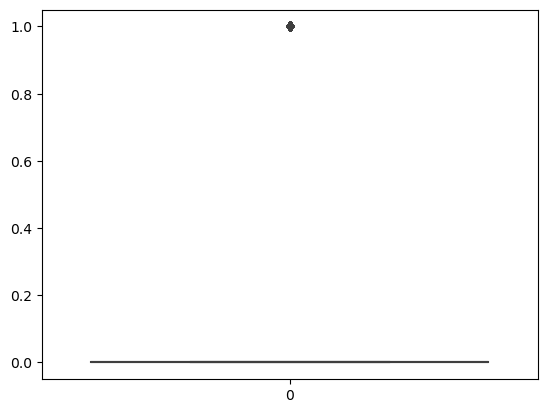

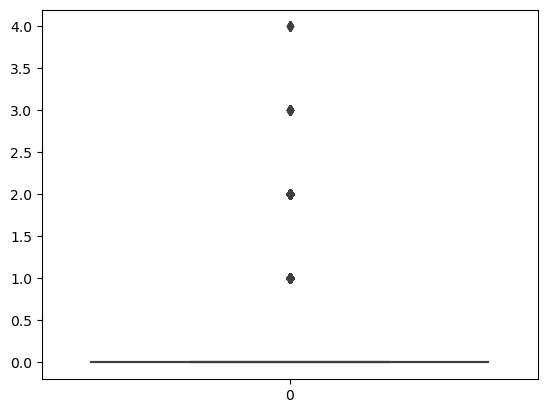

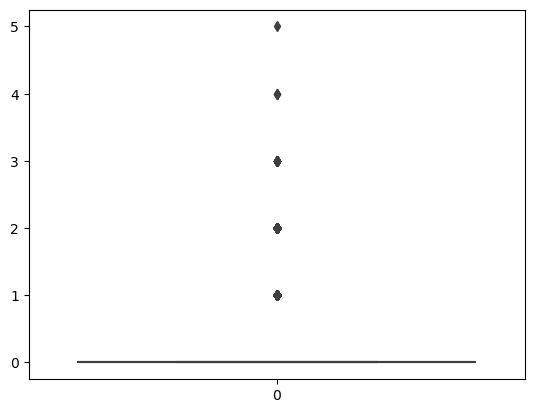

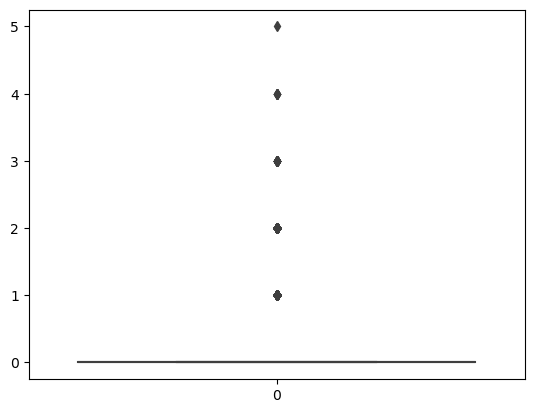

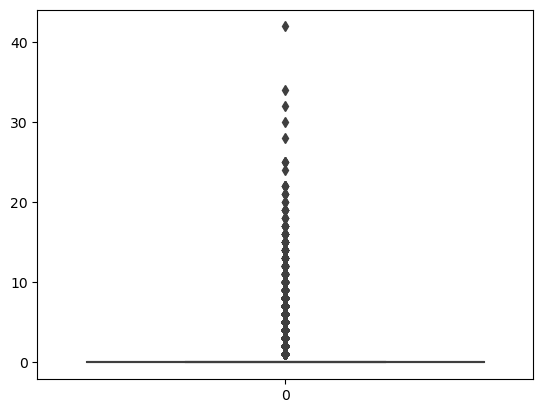

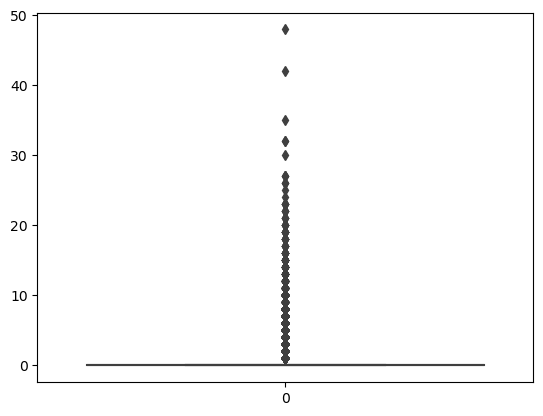

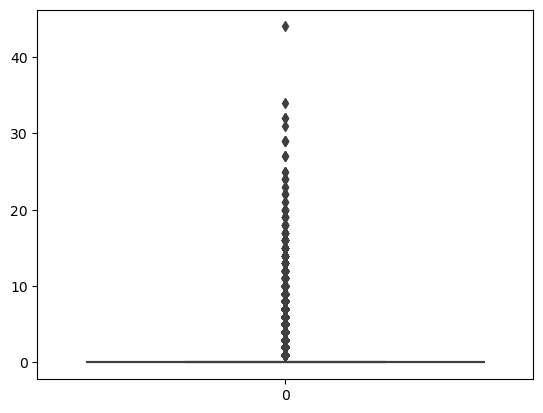

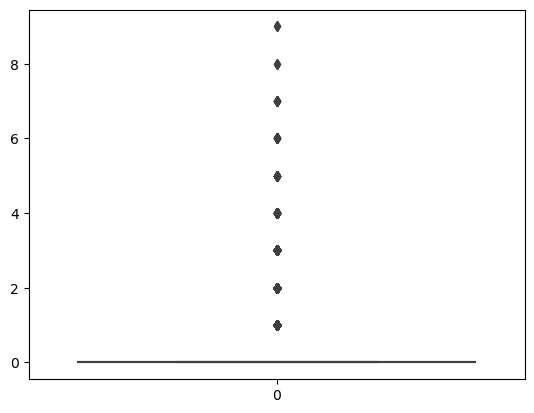

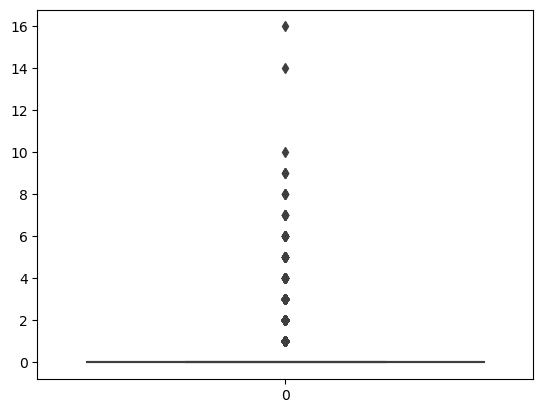

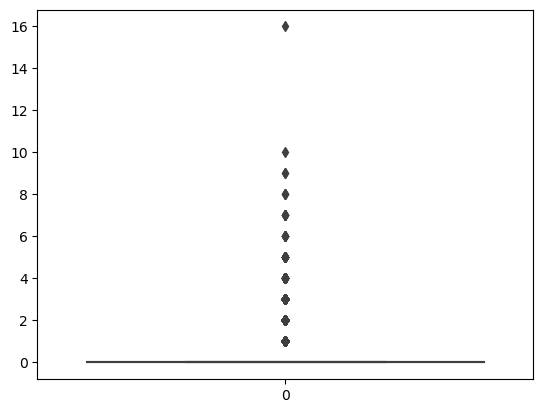

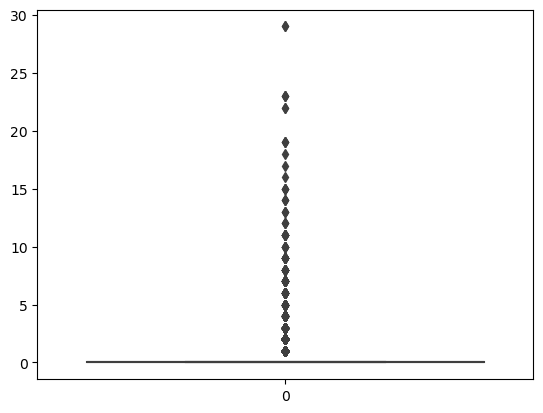

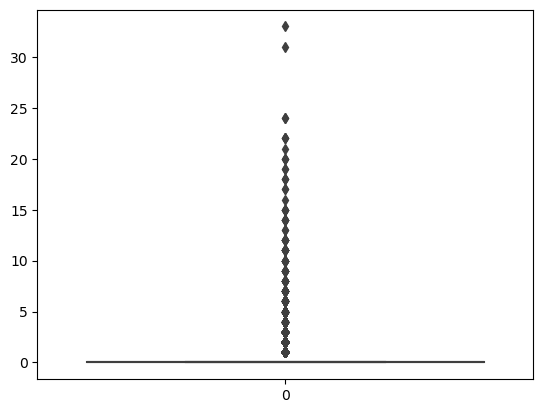

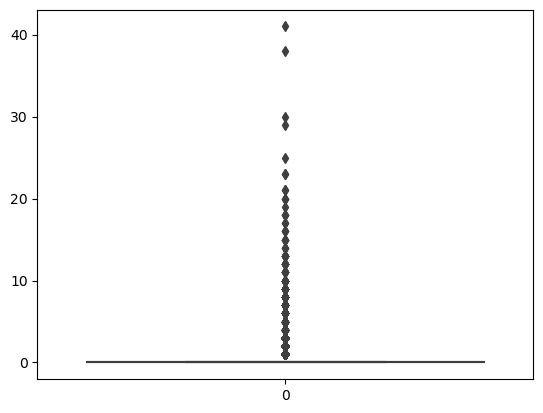

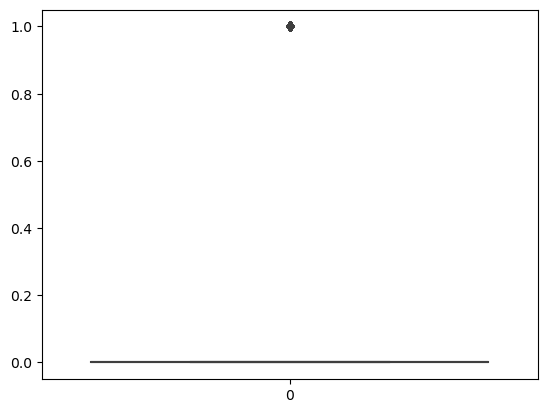

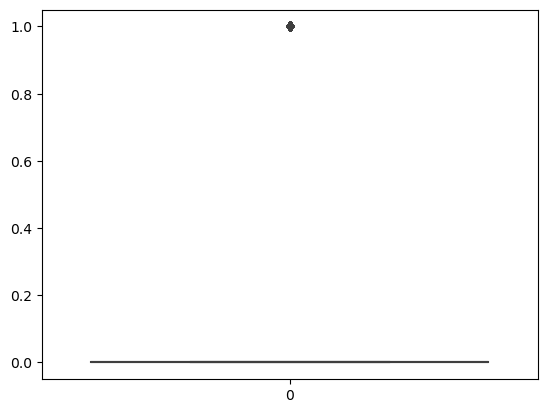

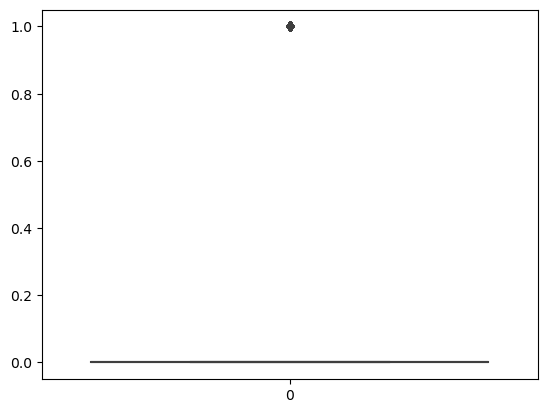

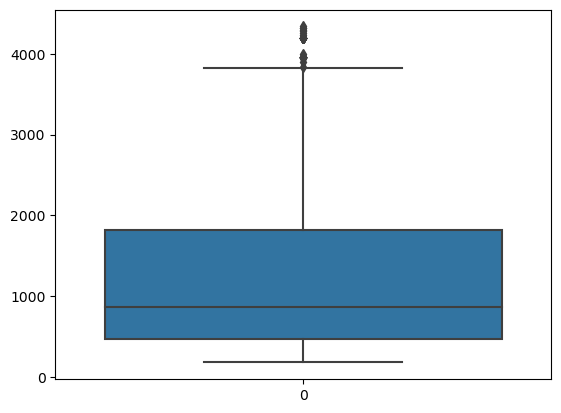

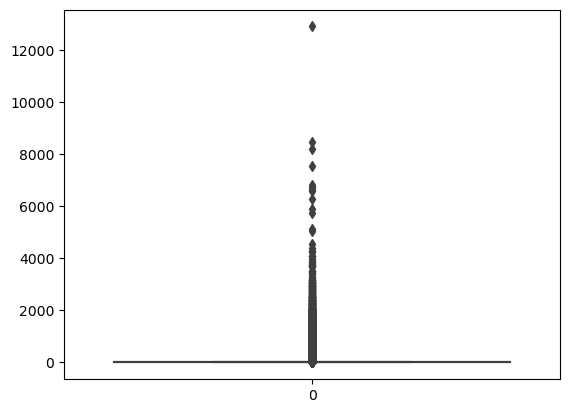

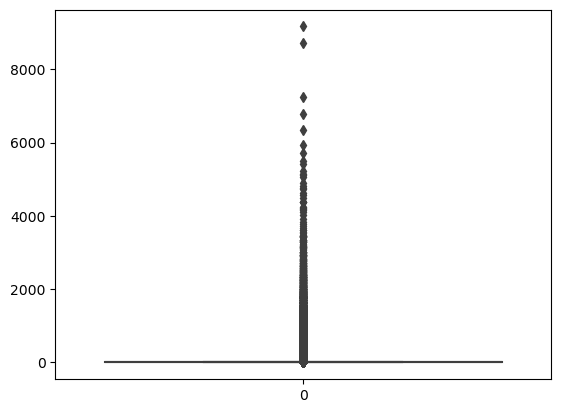

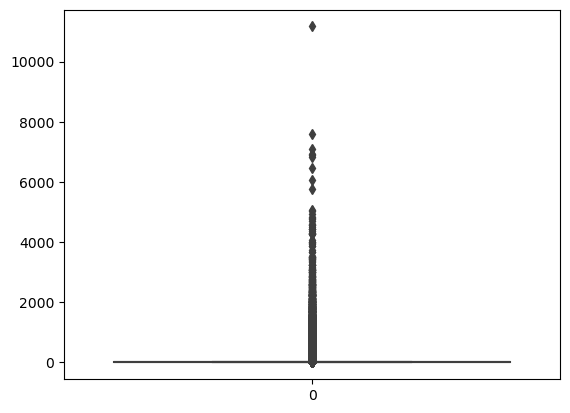

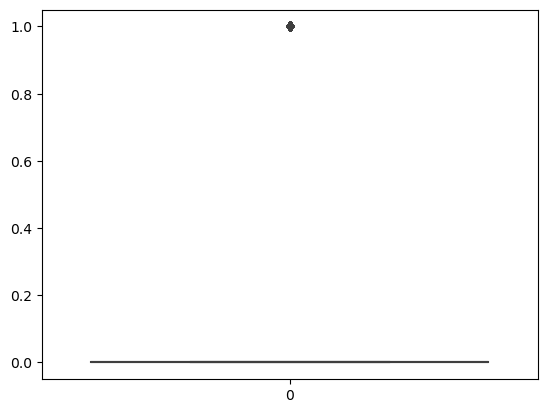

In [10]:
for i in df.columns:
   sns.boxplot(df[i])
   plt.show()

It is observed that there are outliers in the data as observed from the box plots. It is not a good idea to remove so much of extreme high values since our objective is to target high value customers and giving a cutoff like 75 percentile to remove outliers might lead to loss of valuable information<br> Therefore a upper cutoff value of 90th percentile is chosen

In [11]:
percentile_90 = df.quantile(0.9)
df = df[df <= percentile_90]

Negative values are seen for some variables and therefore a lower cutoff of 5 percentile is chosen.

In [12]:
percentile_05 = df.quantile(0.05)
df = df[df >= percentile_05]

Ensuring that the null values are imputed with '0'

In [13]:
df = df.fillna(0)

The box plots now looks better and not much outliers are present which will influence the ML model

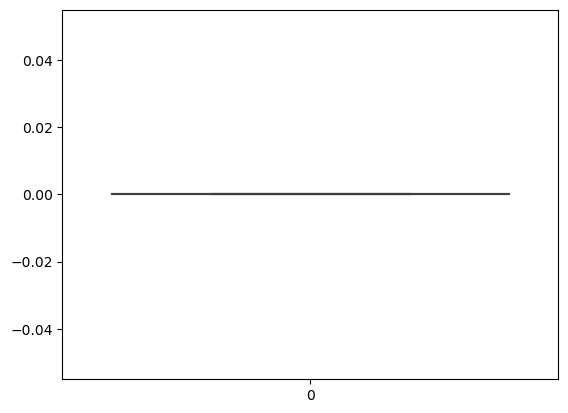

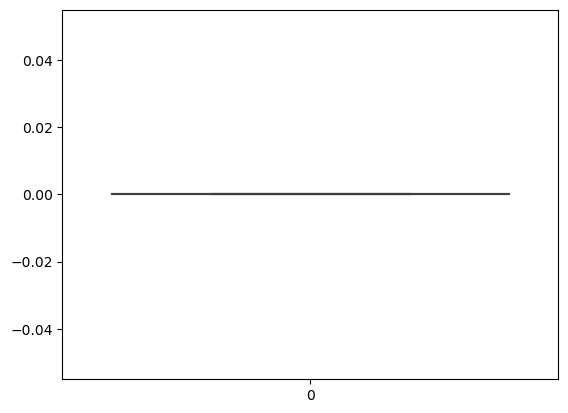

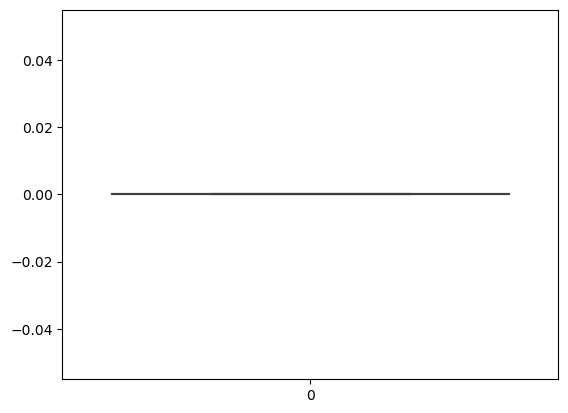

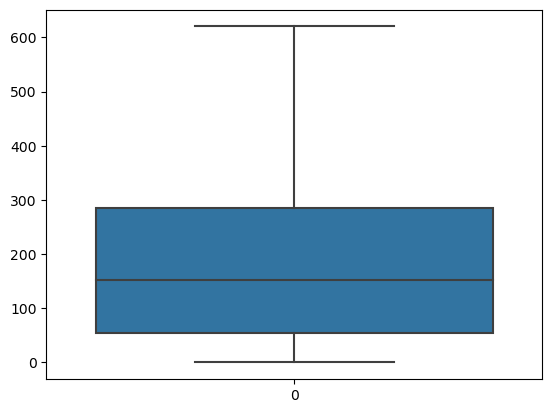

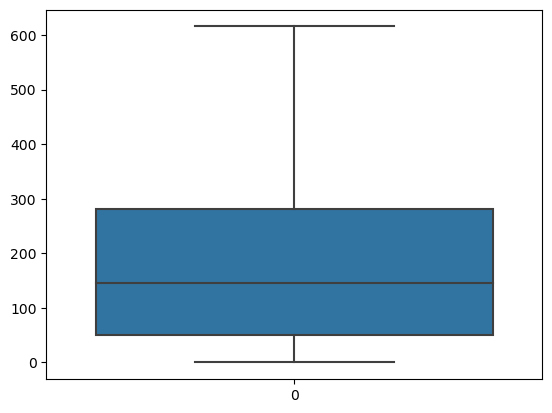

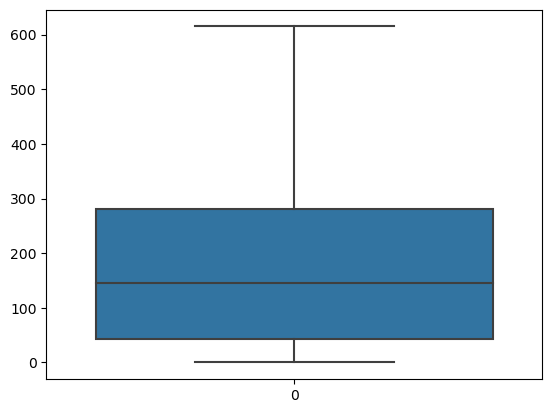

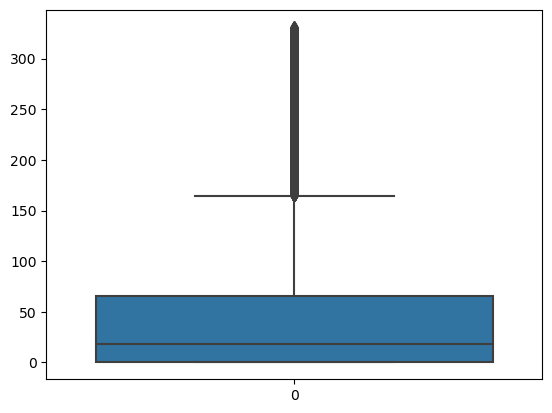

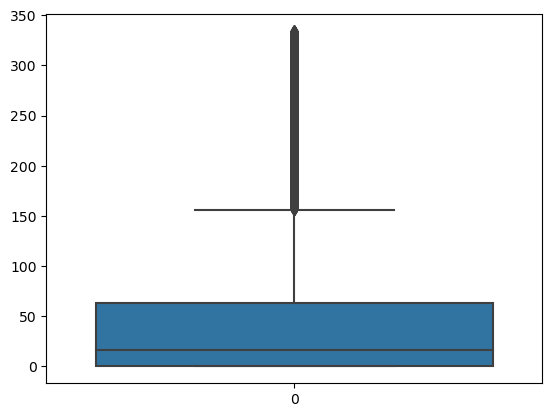

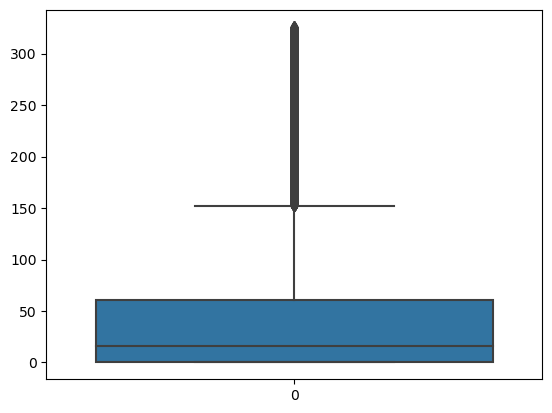

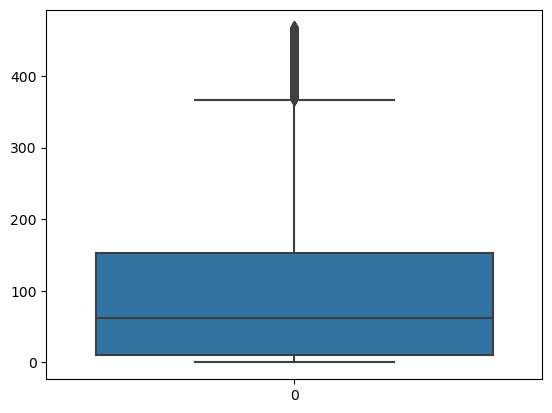

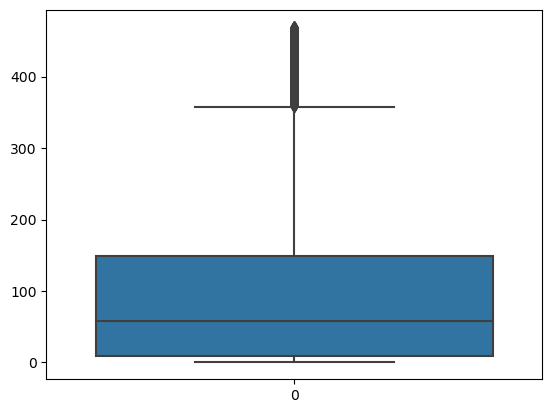

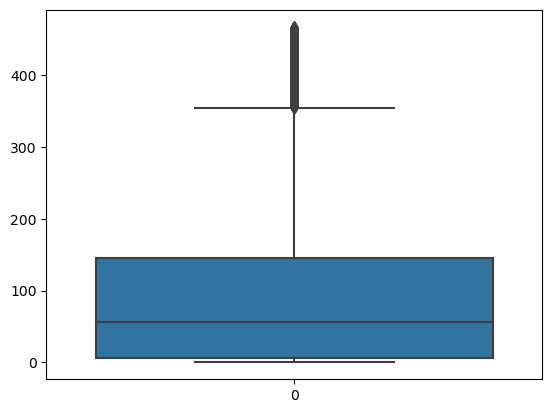

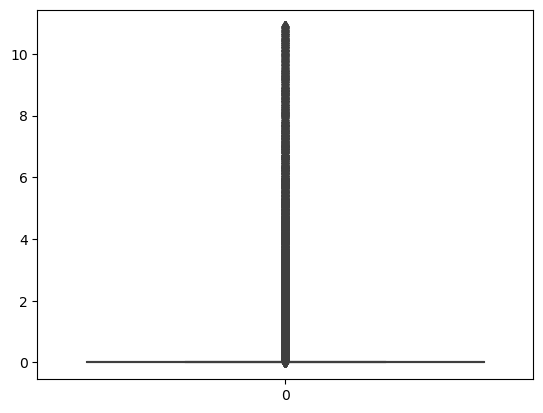

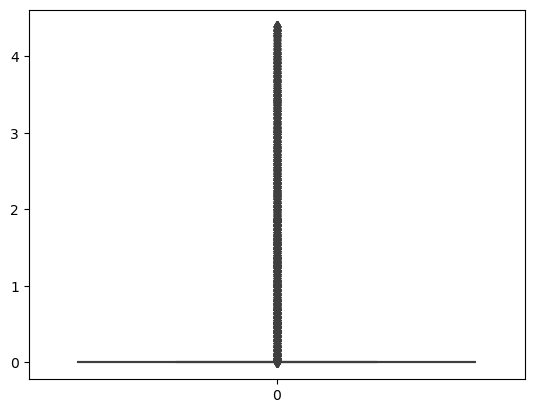

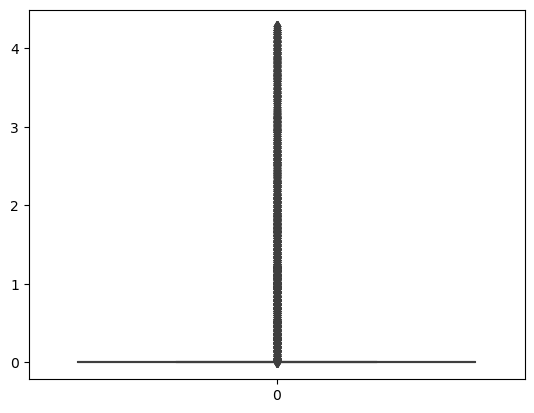

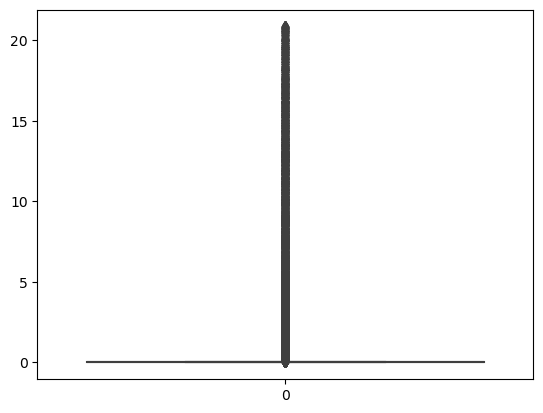

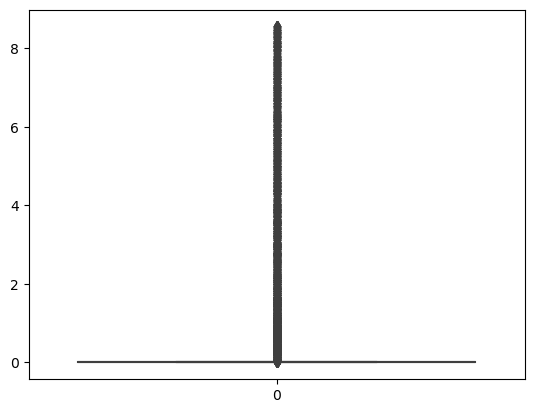

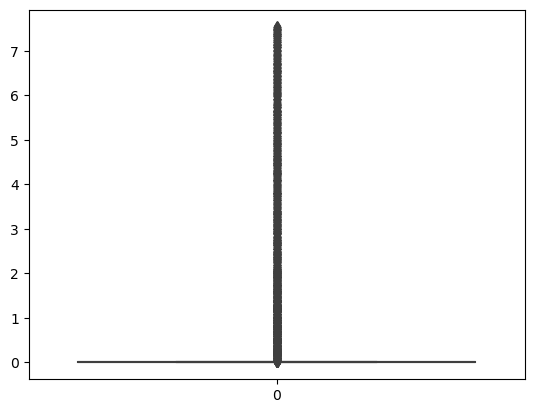

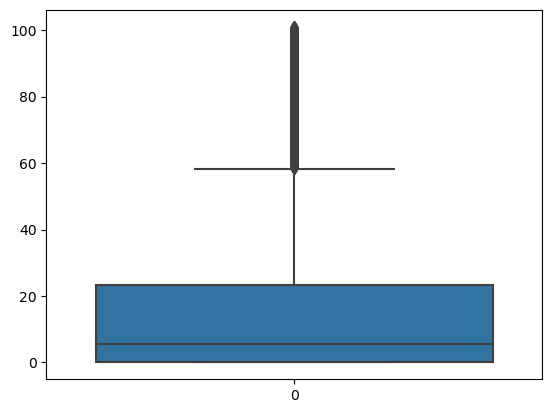

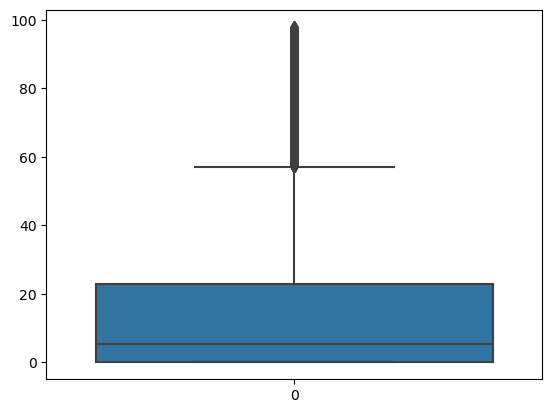

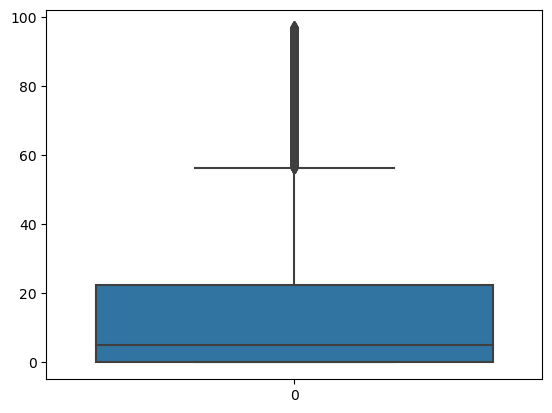

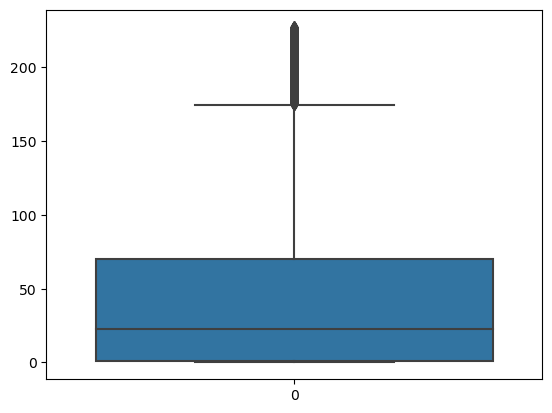

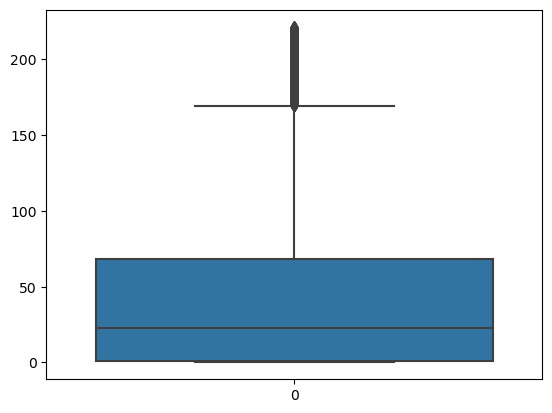

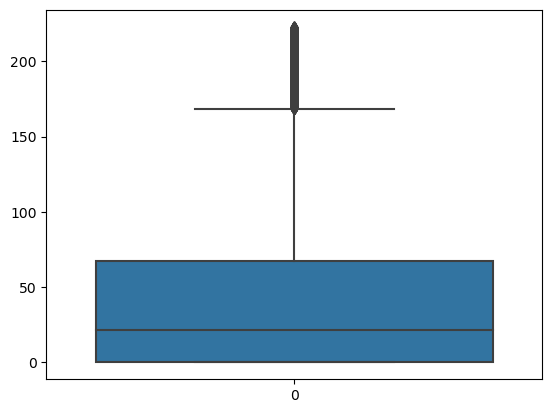

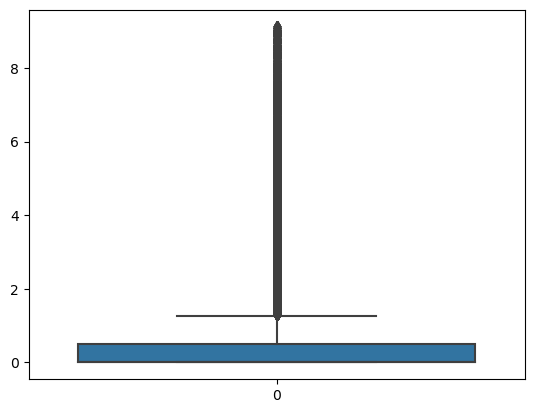

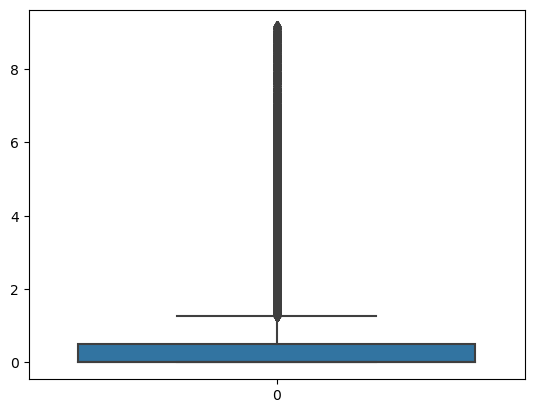

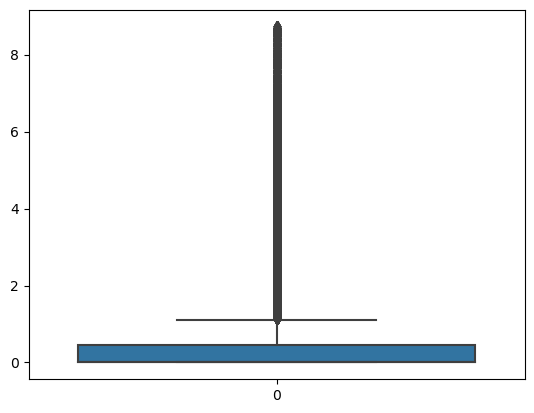

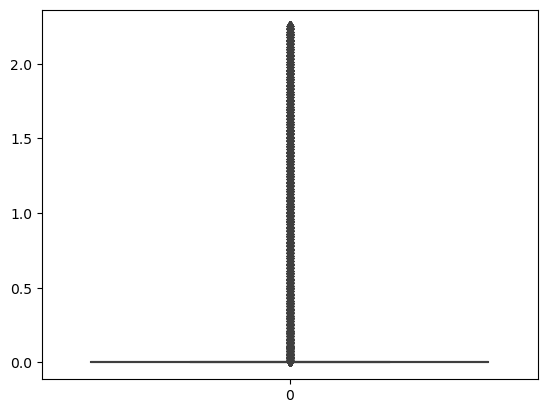

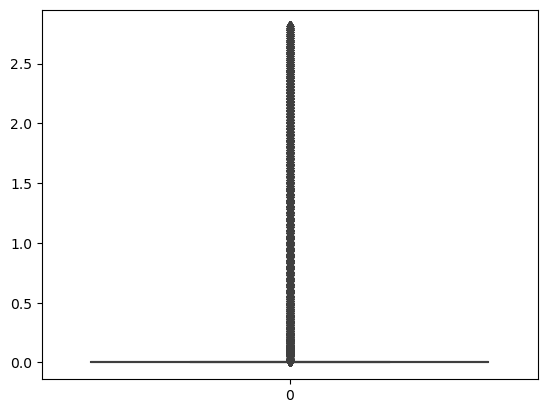

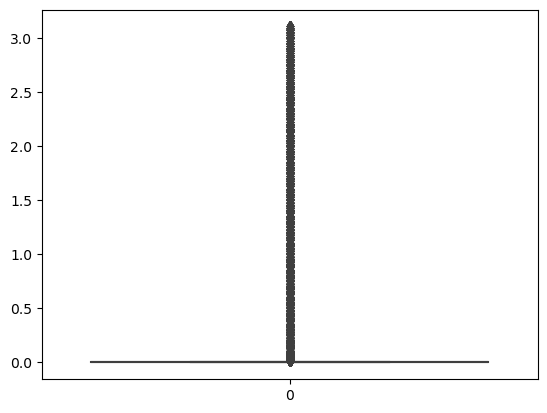

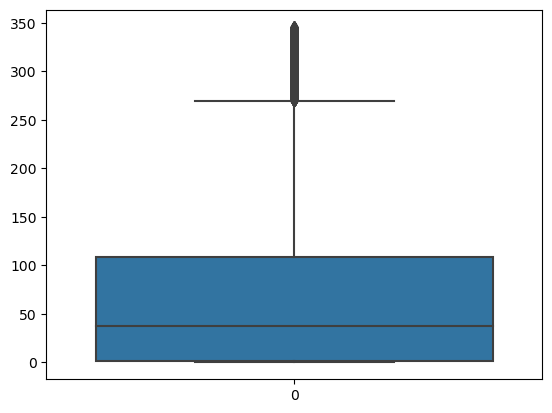

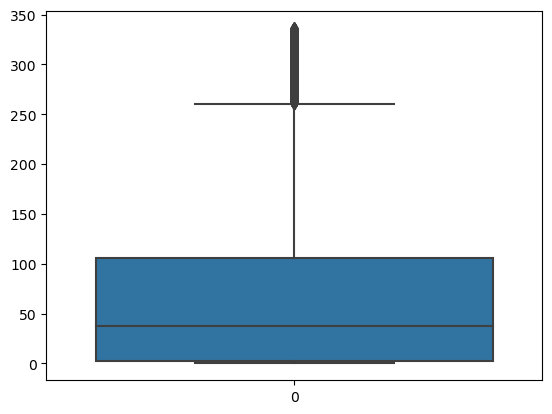

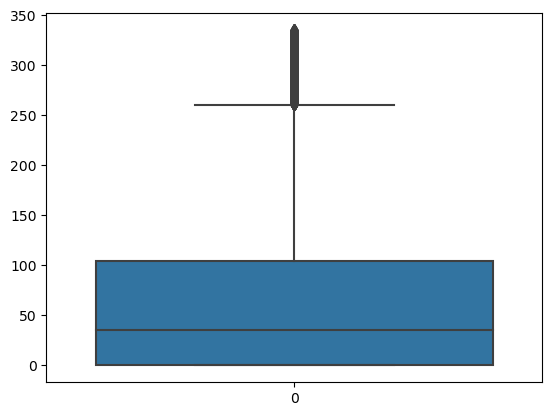

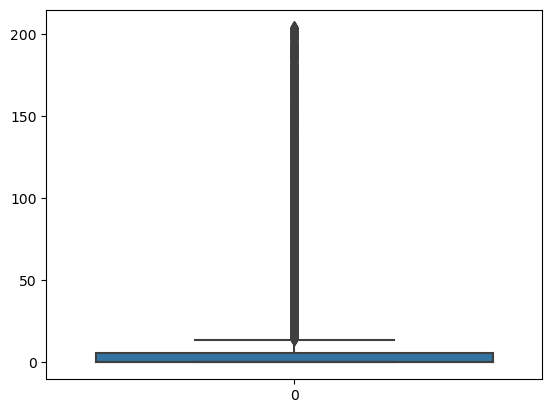

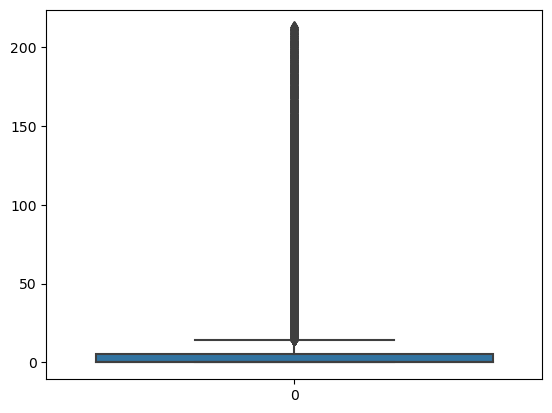

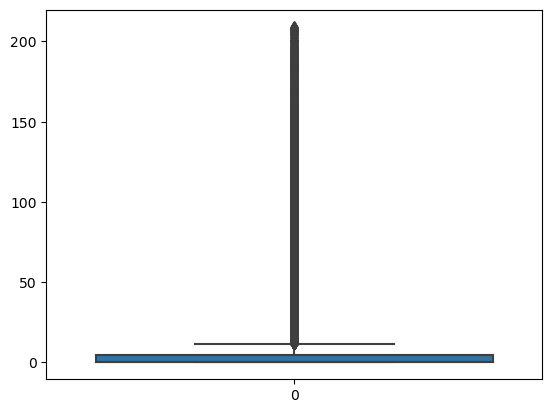

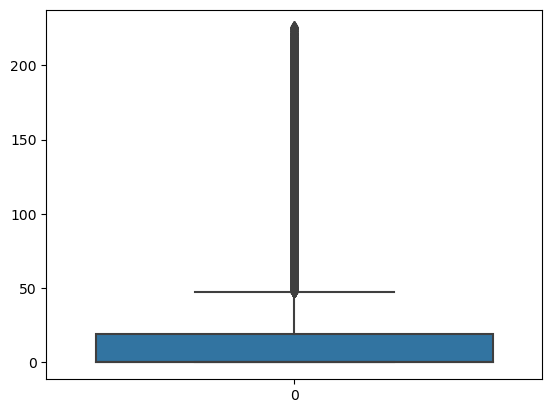

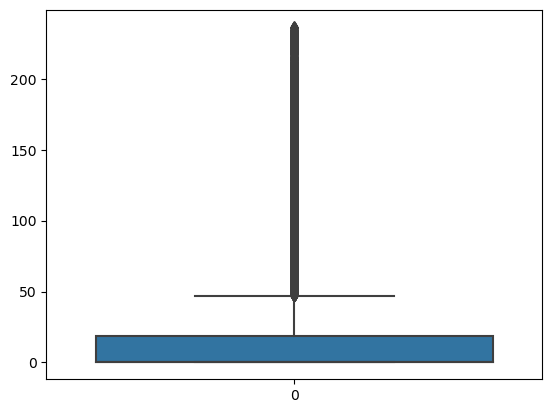

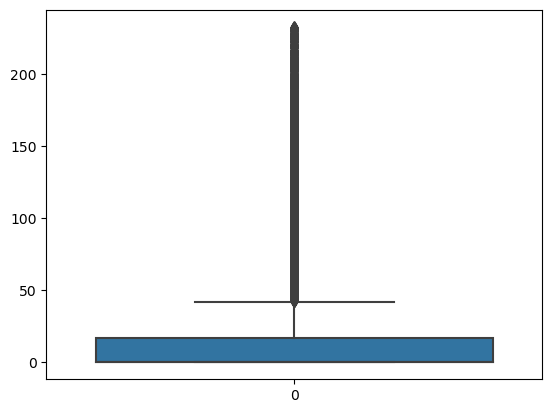

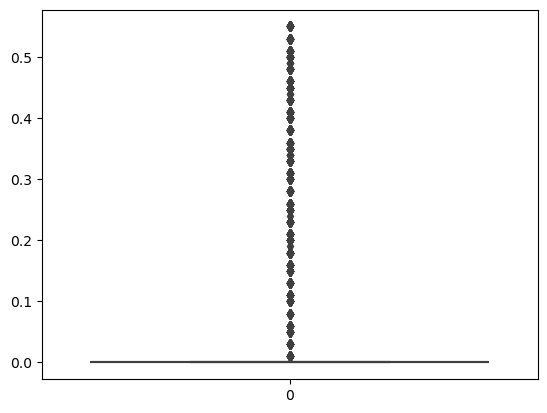

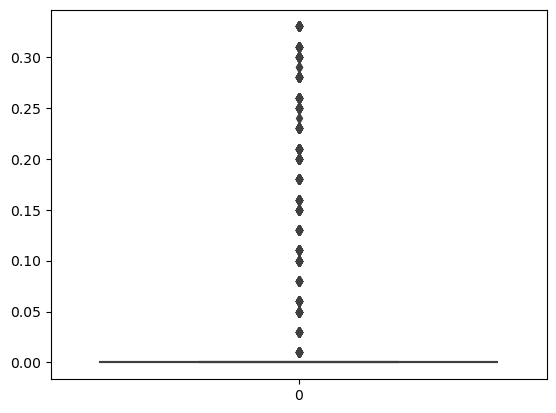

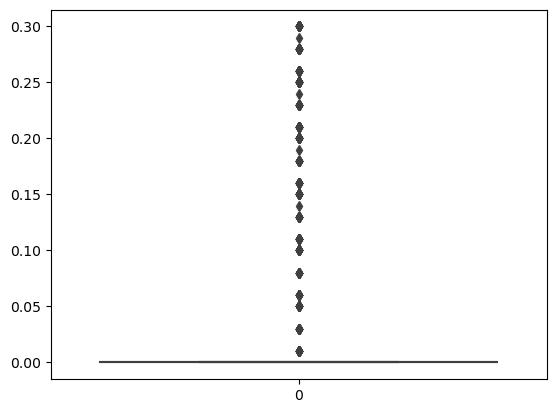

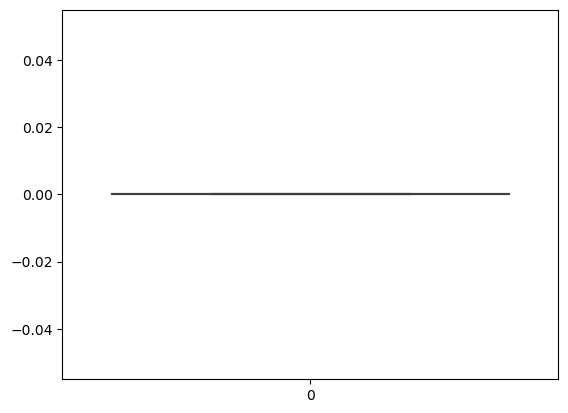

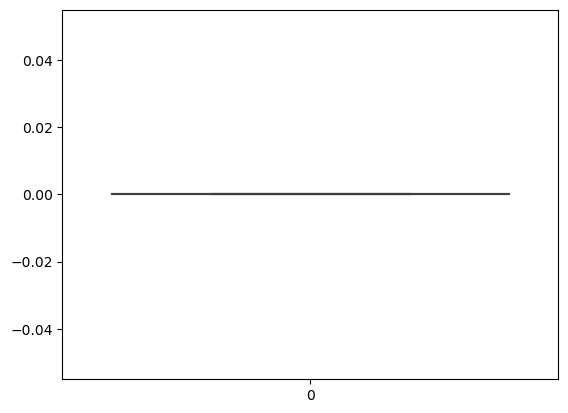

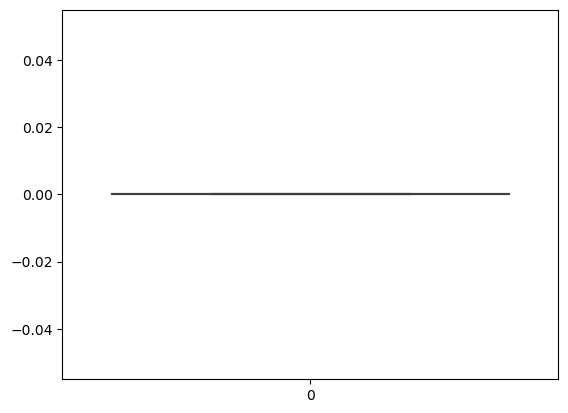

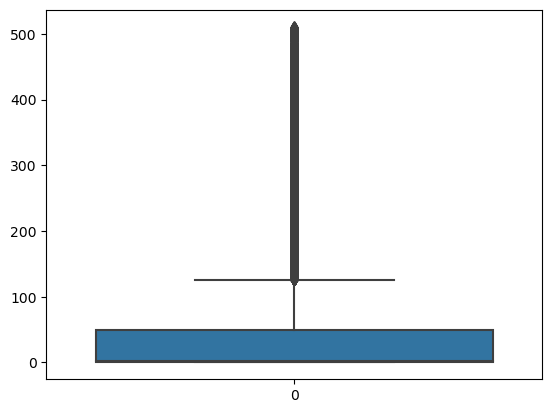

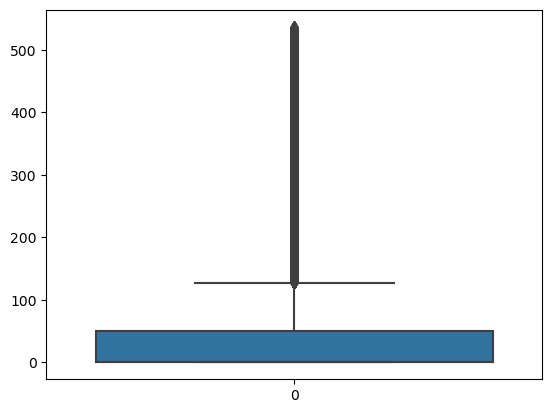

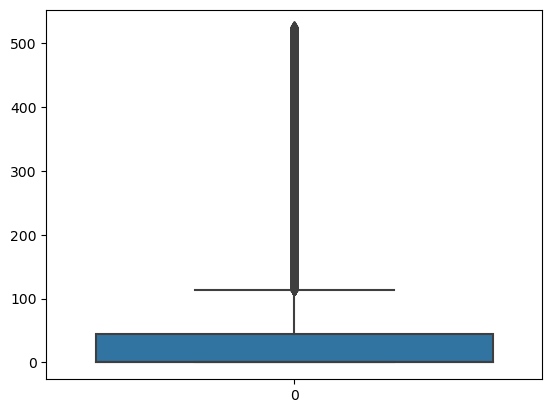

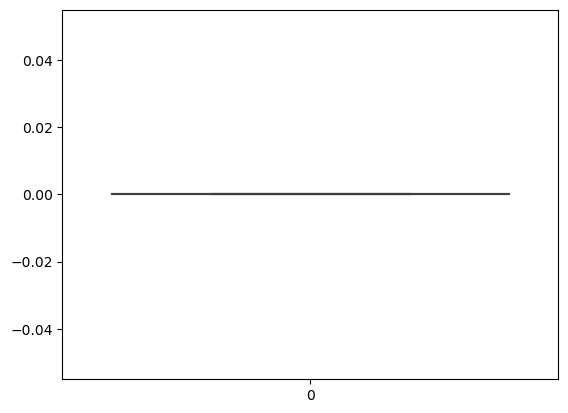

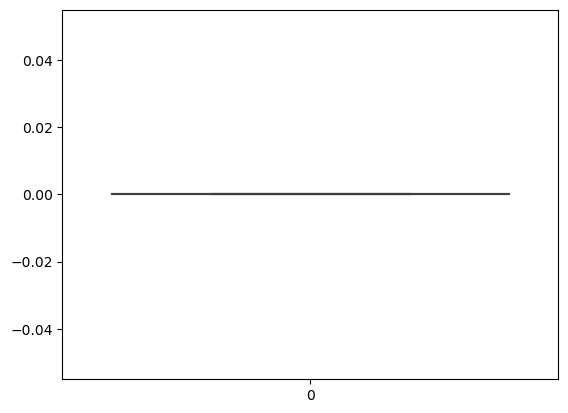

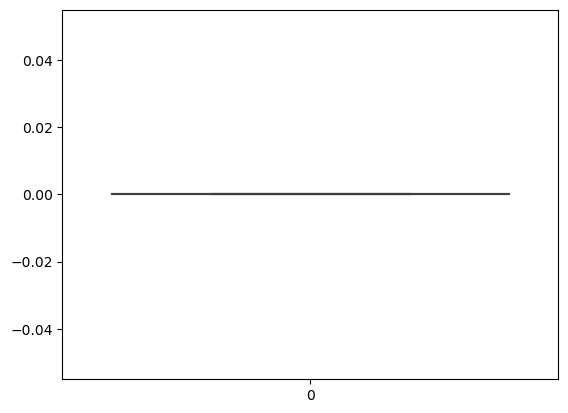

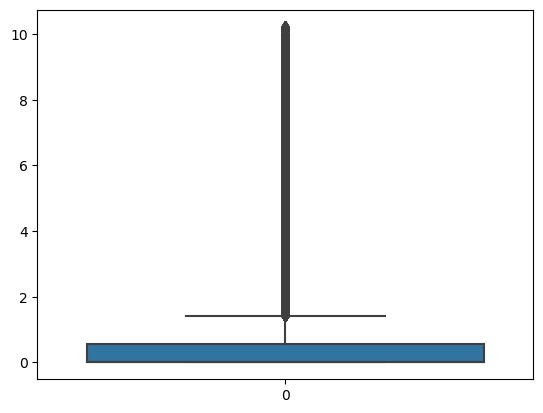

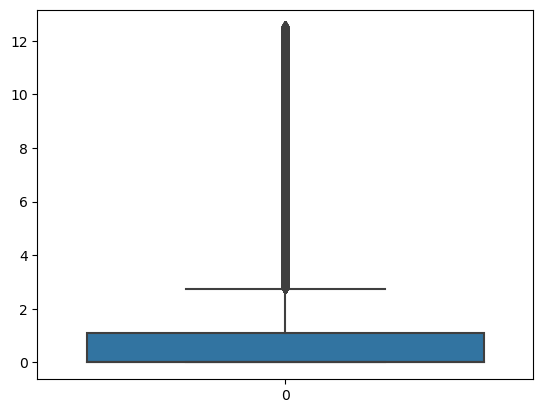

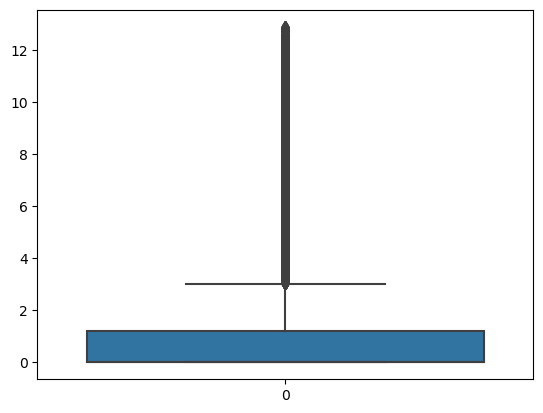

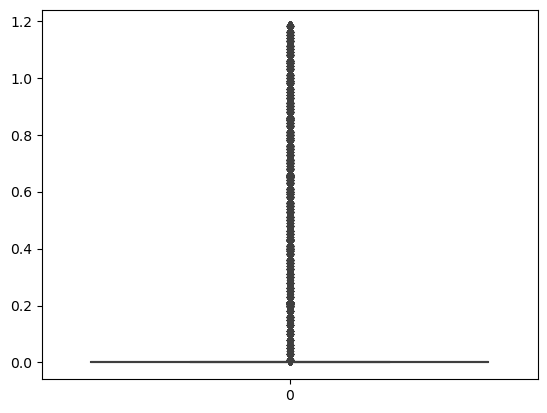

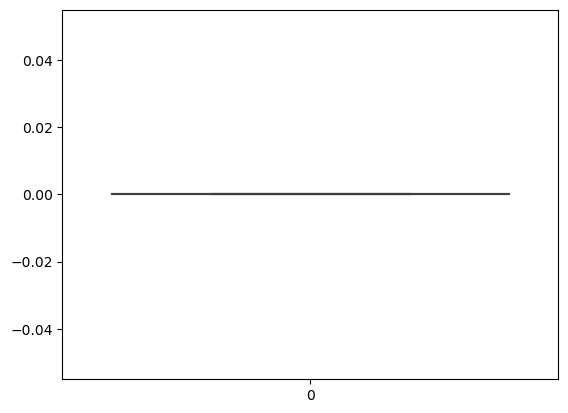

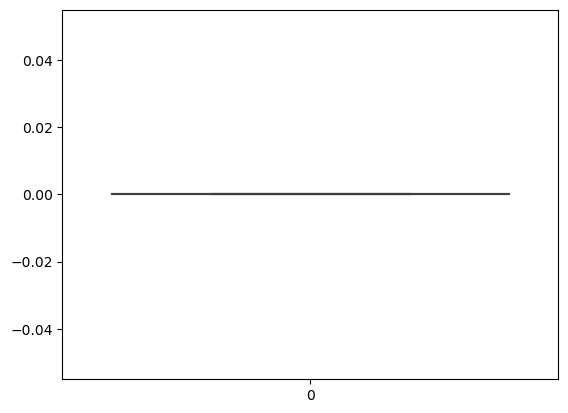

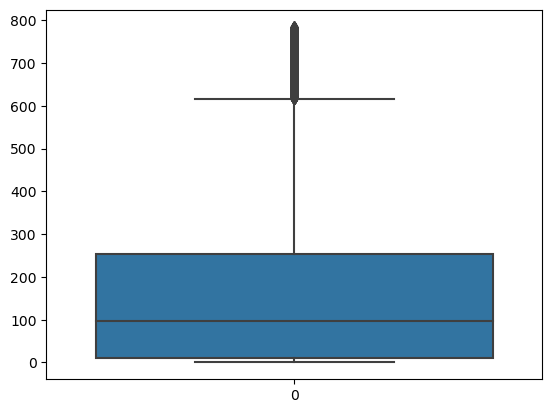

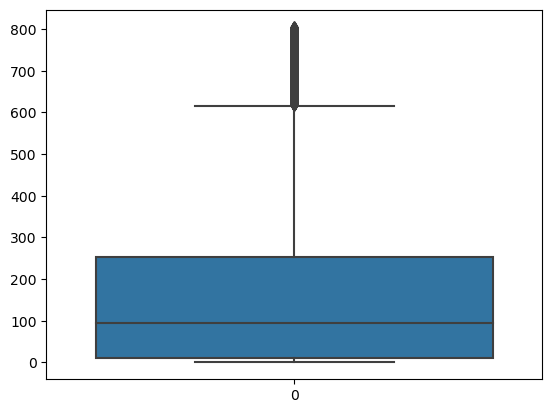

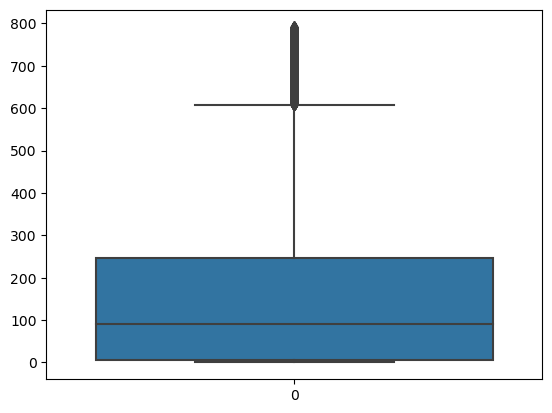

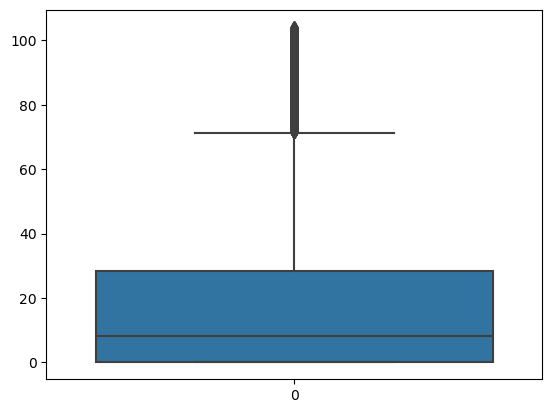

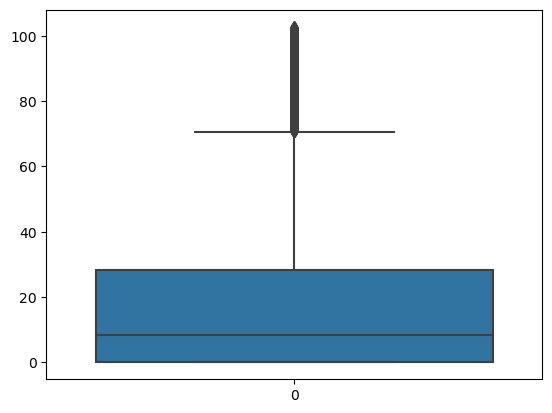

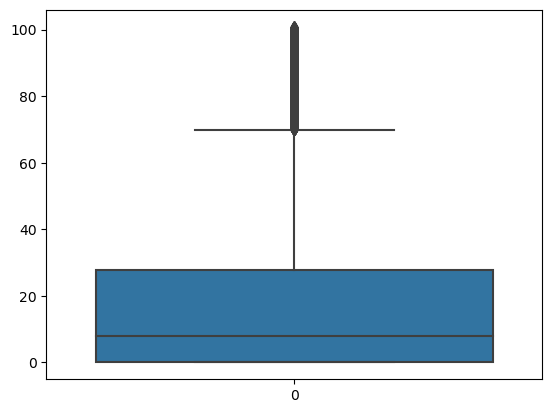

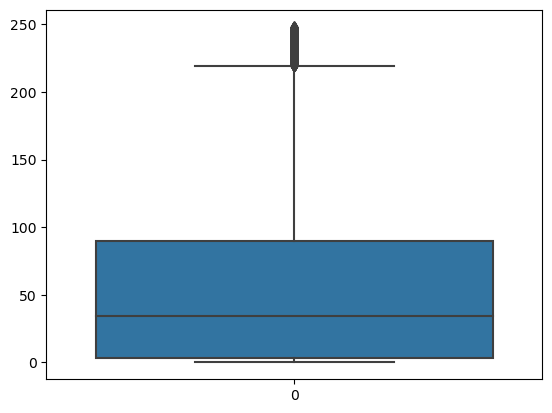

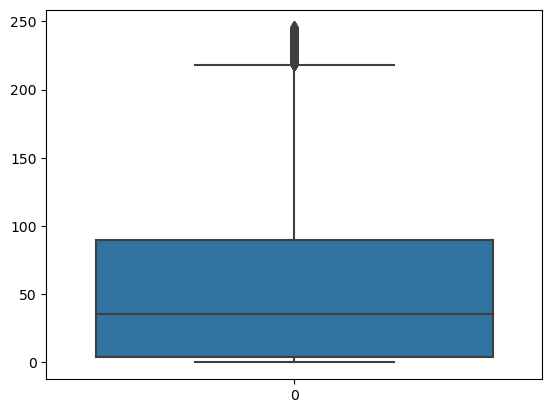

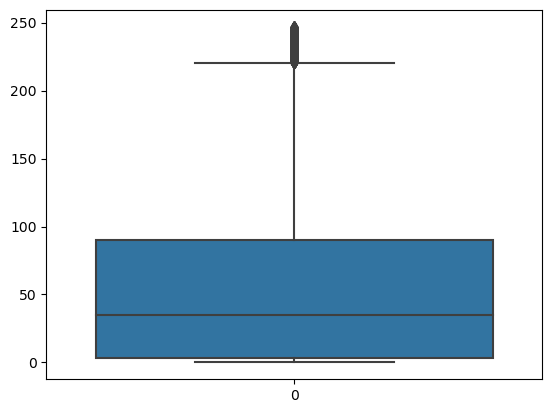

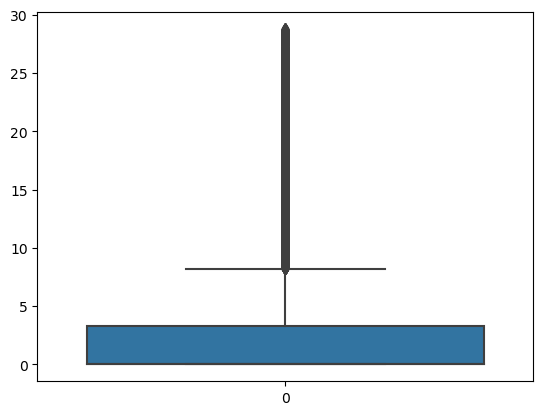

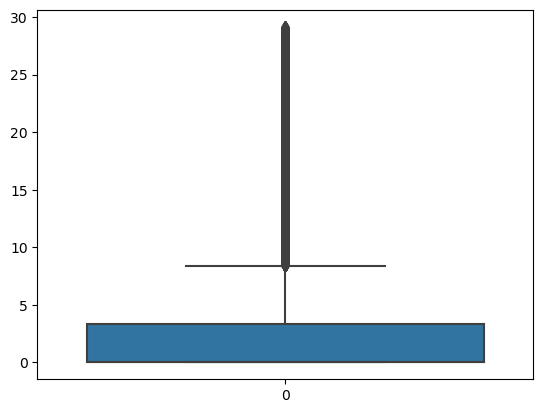

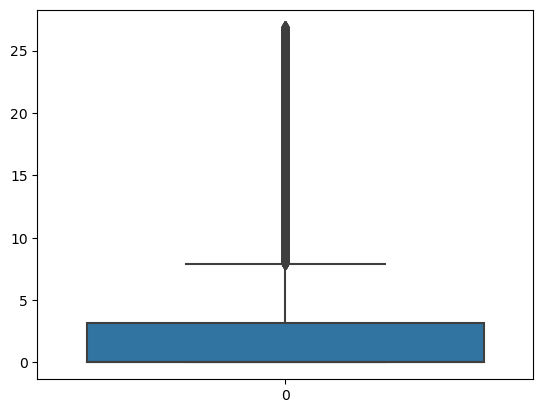

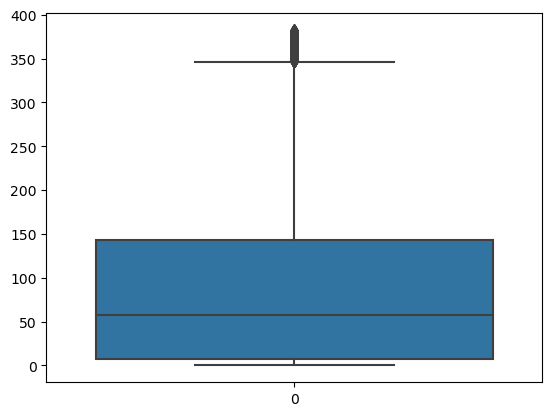

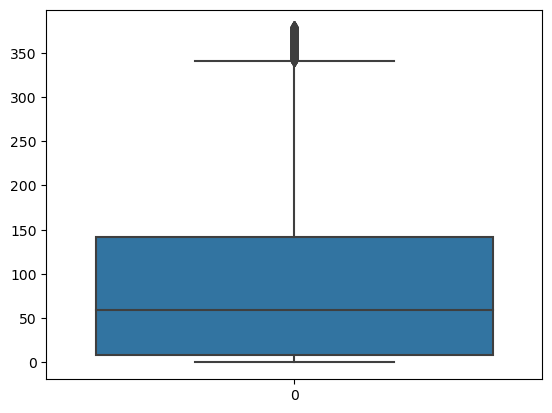

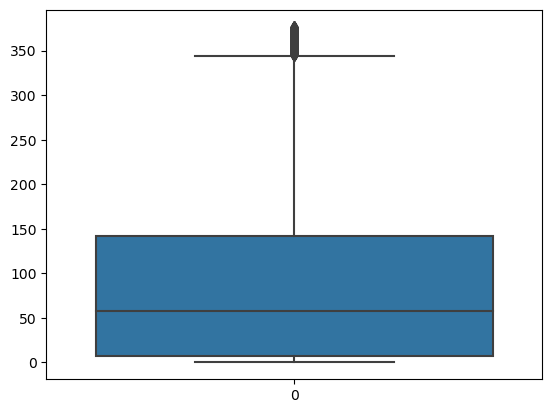

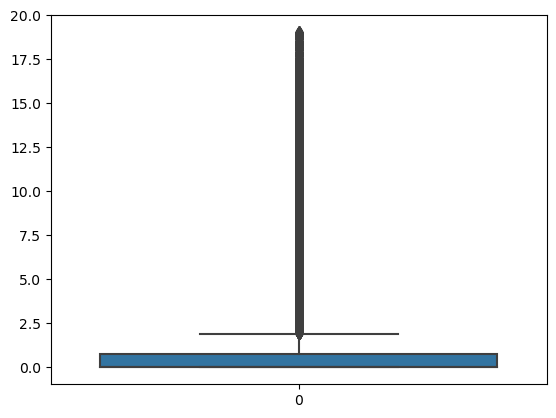

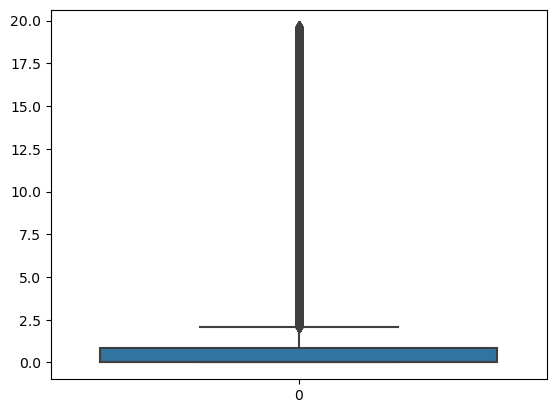

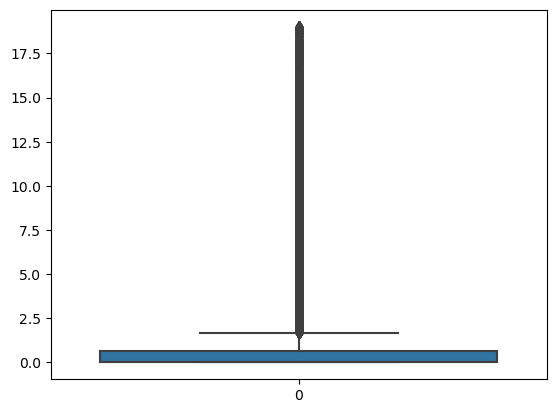

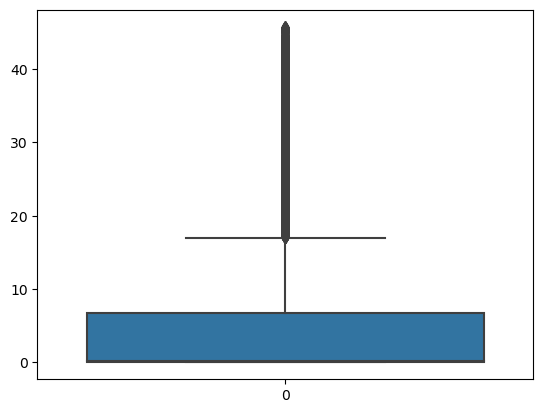

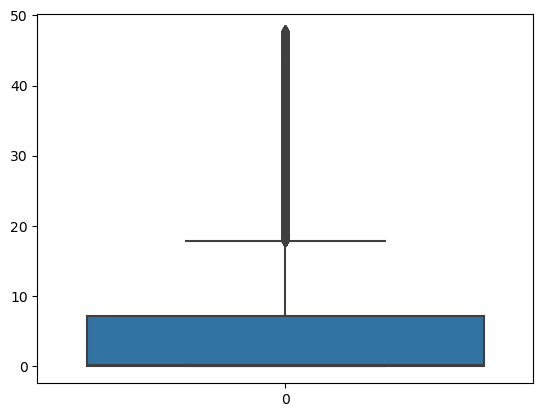

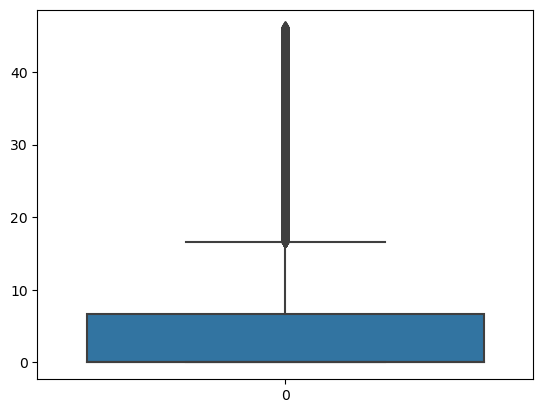

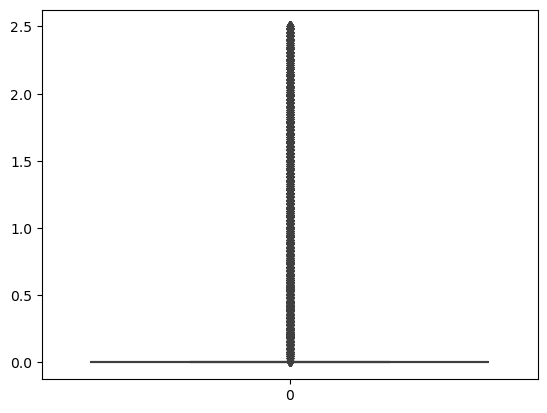

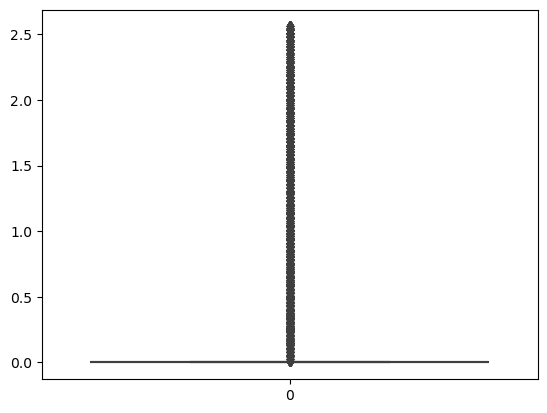

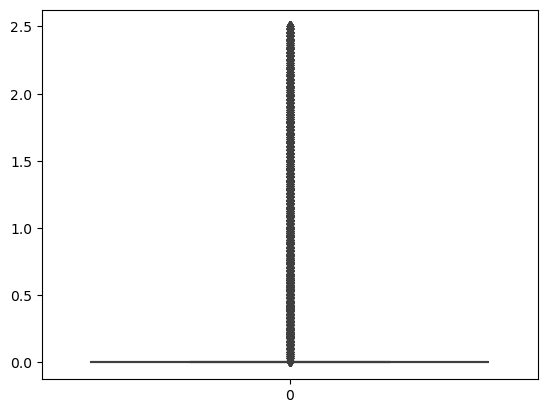

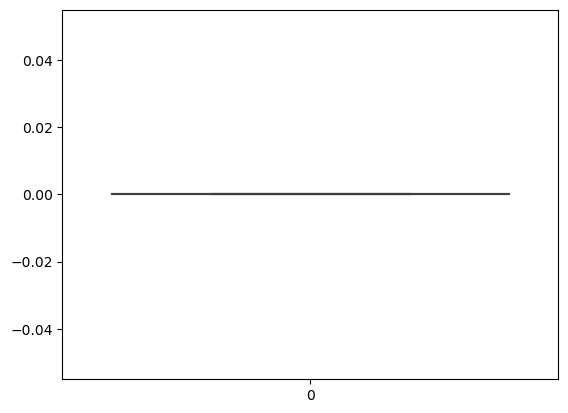

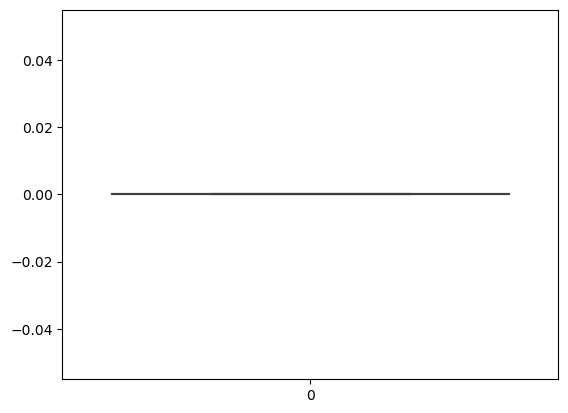

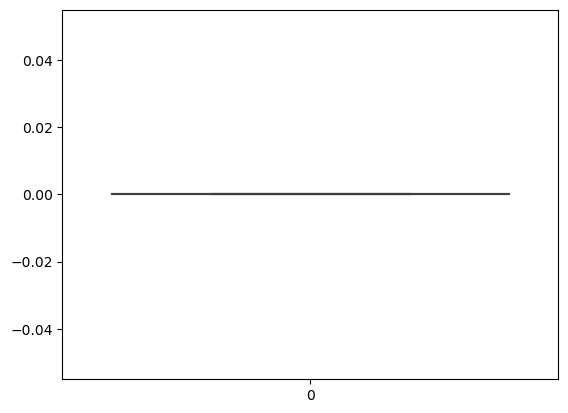

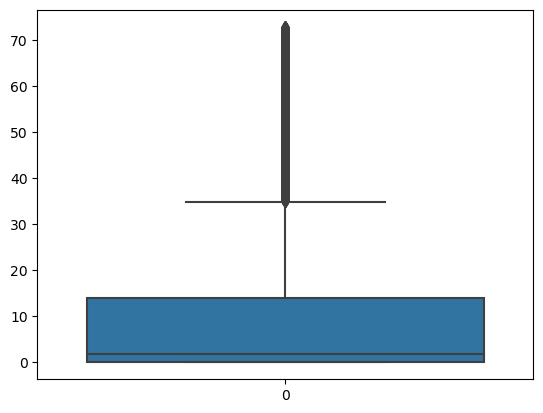

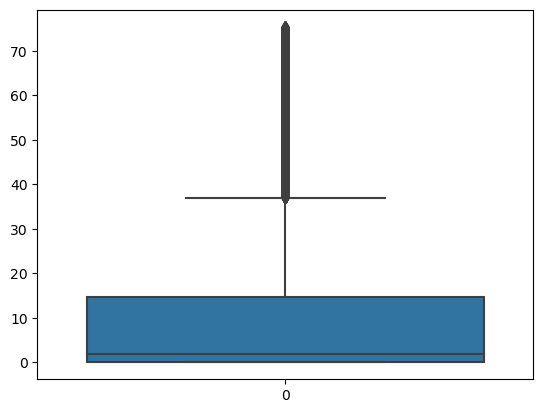

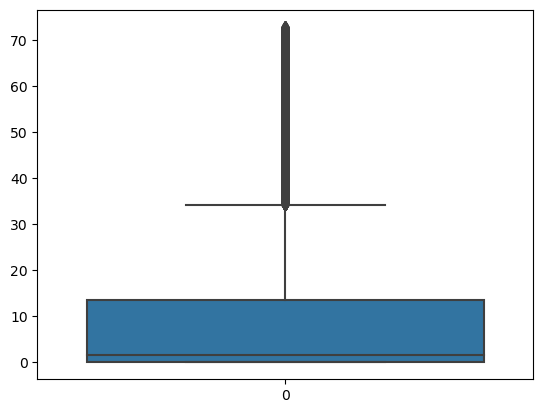

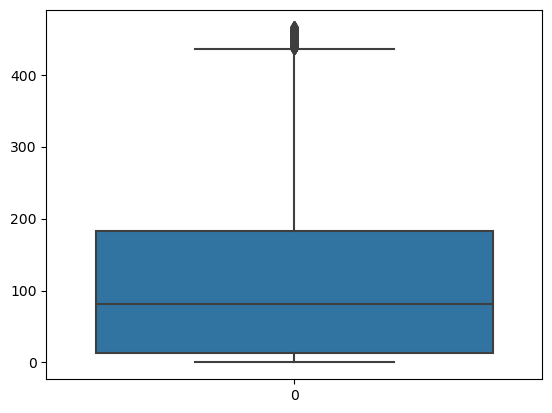

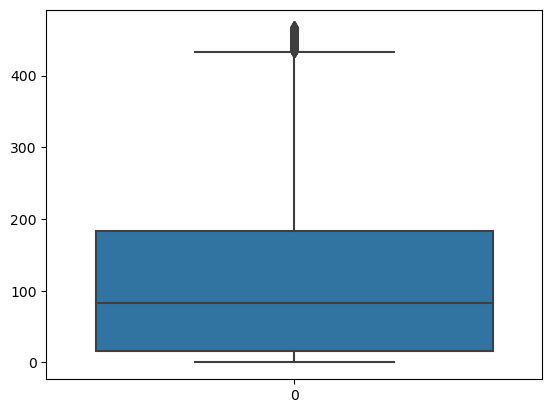

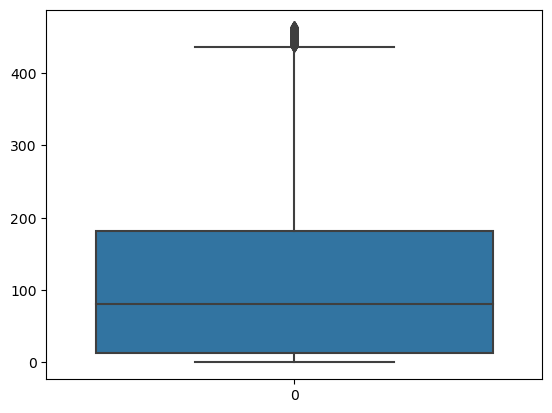

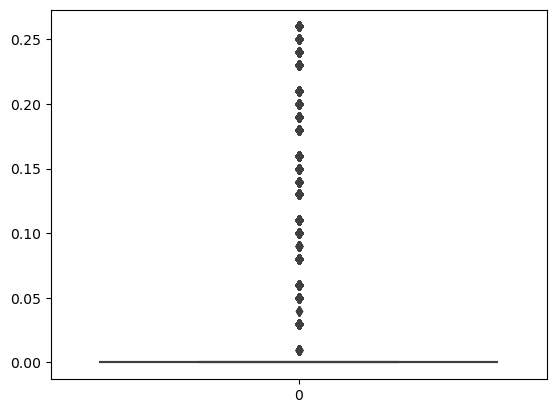

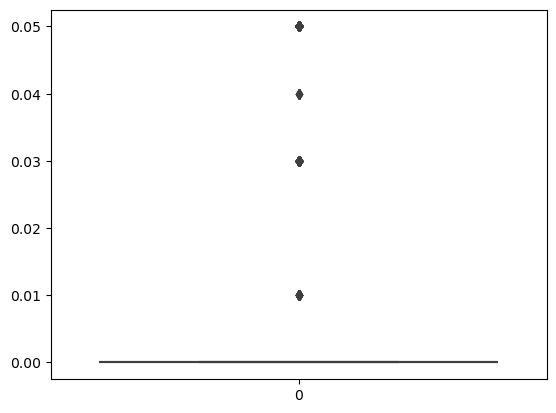

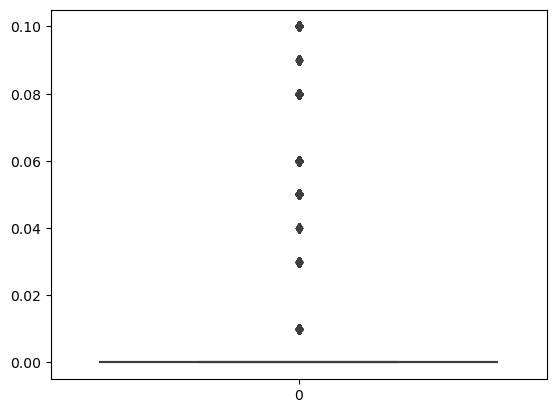

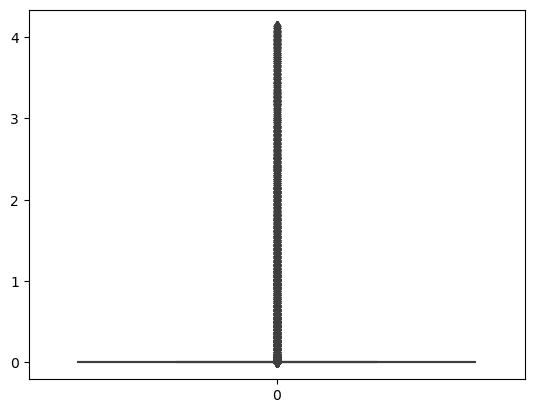

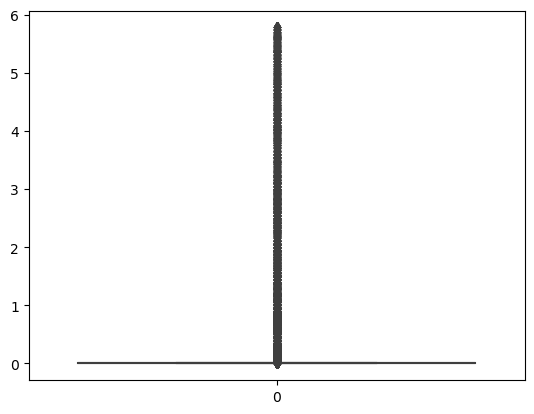

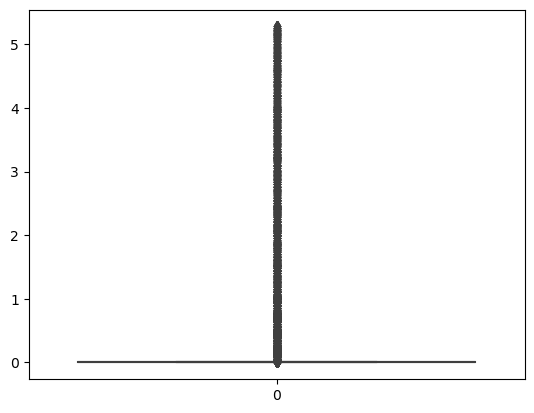

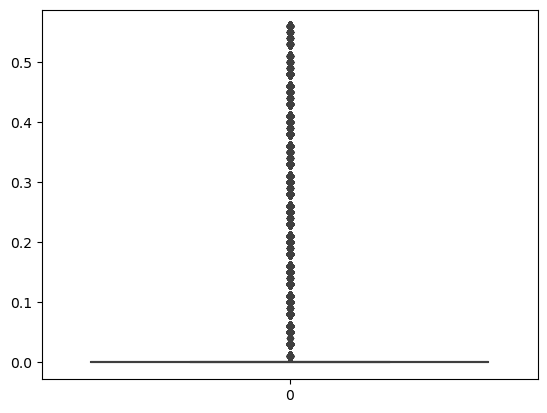

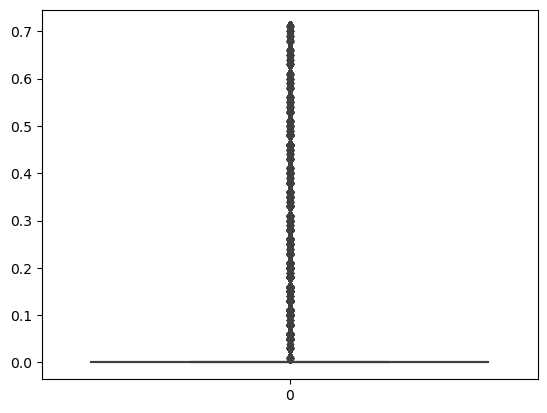

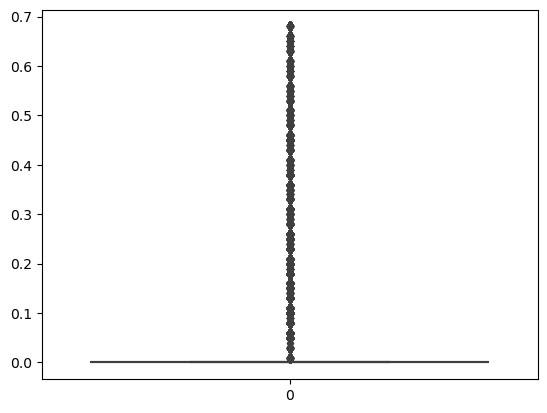

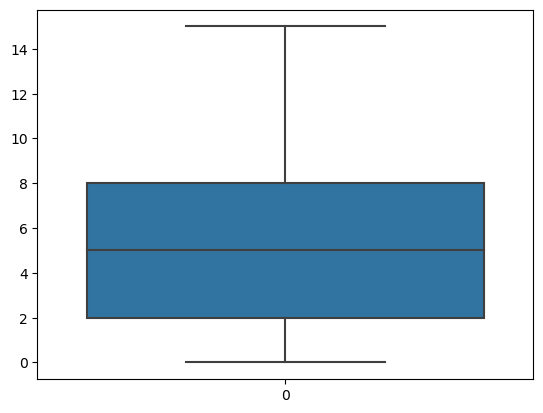

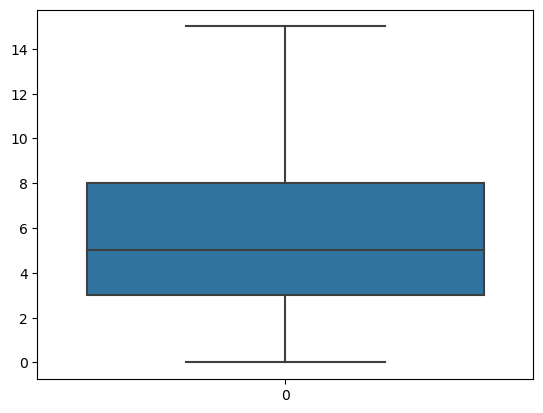

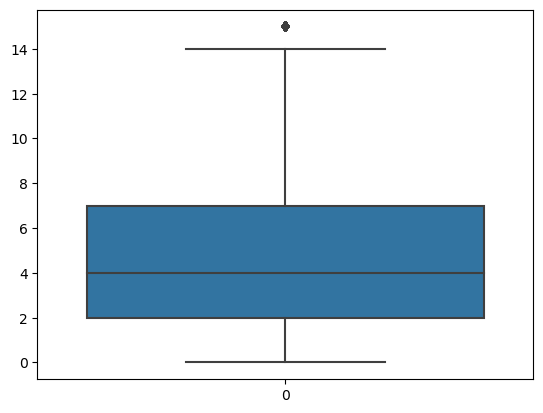

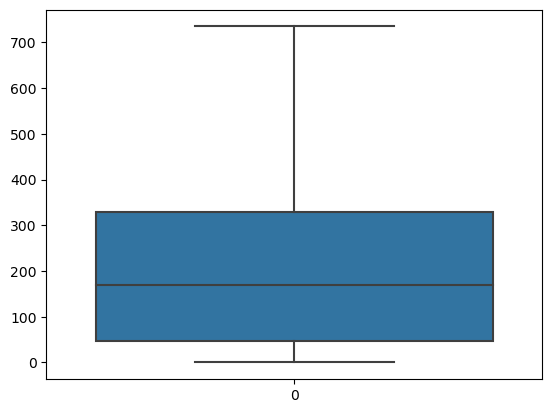

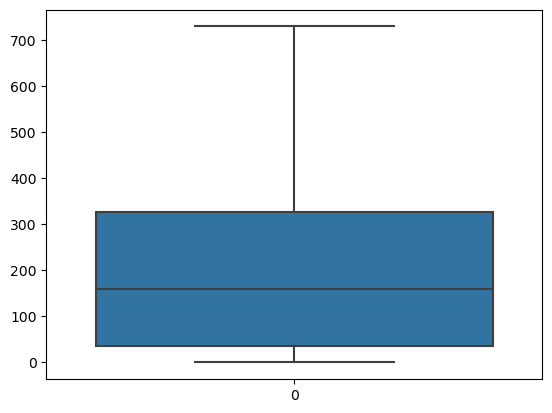

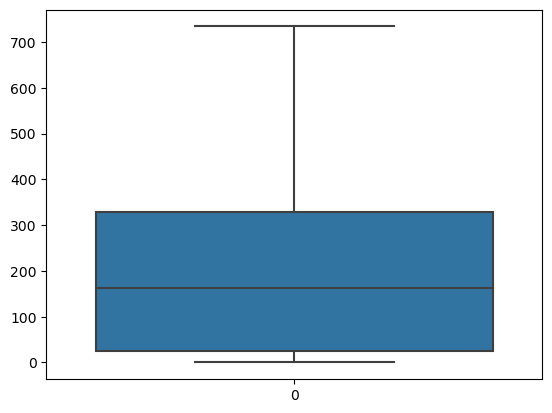

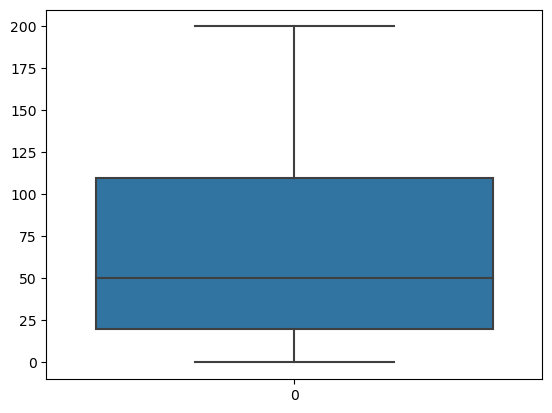

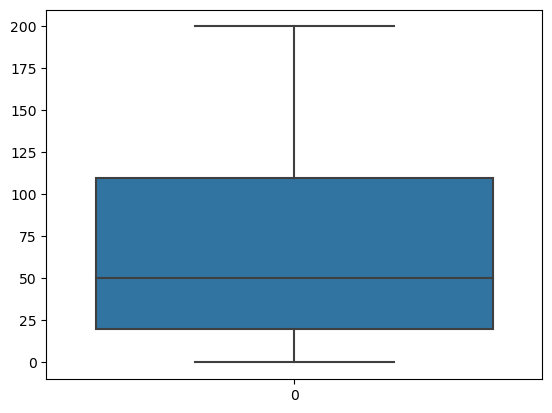

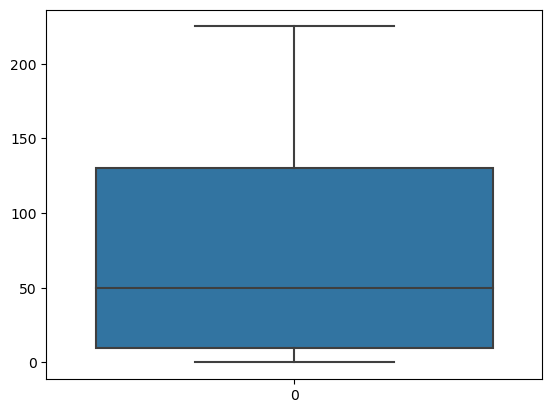

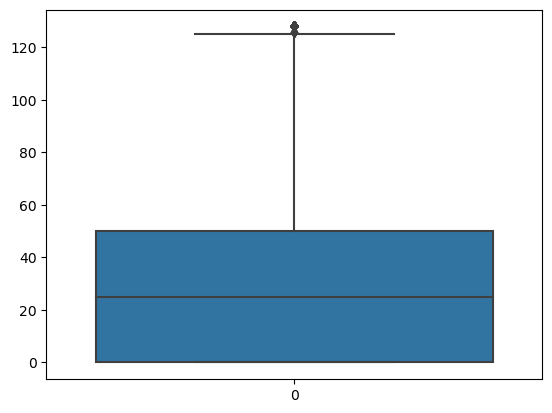

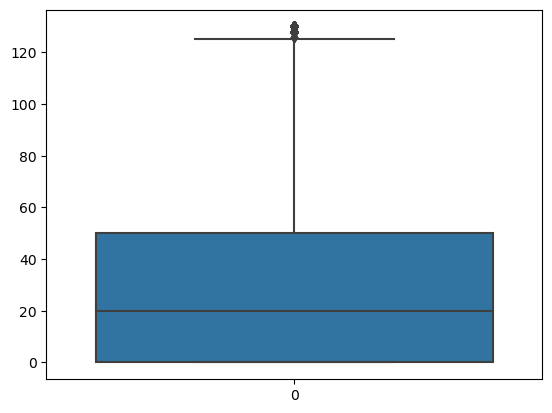

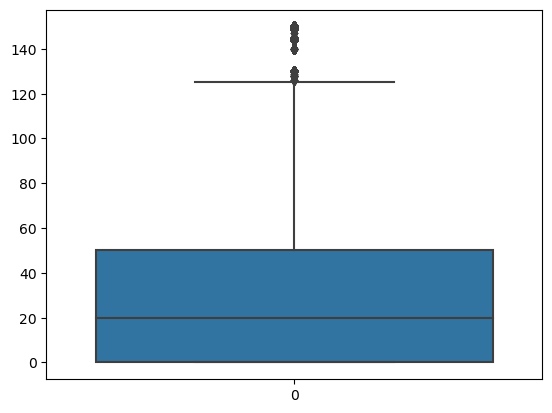

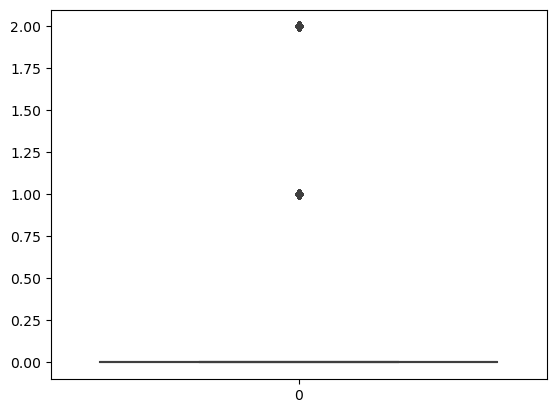

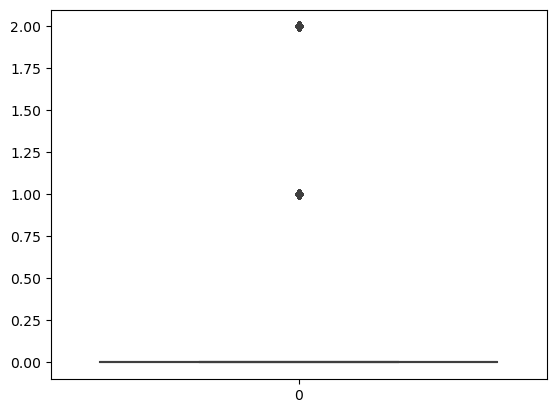

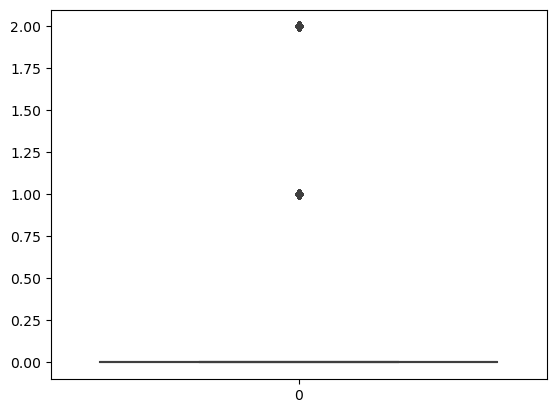

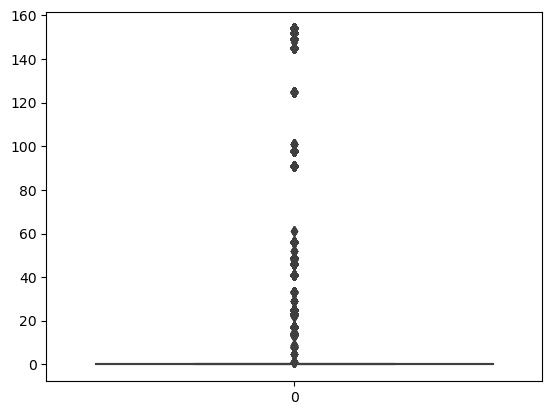

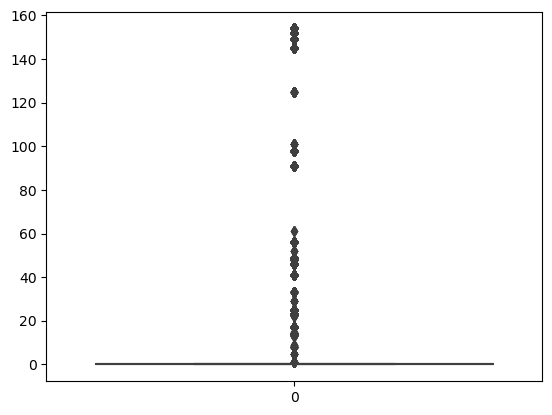

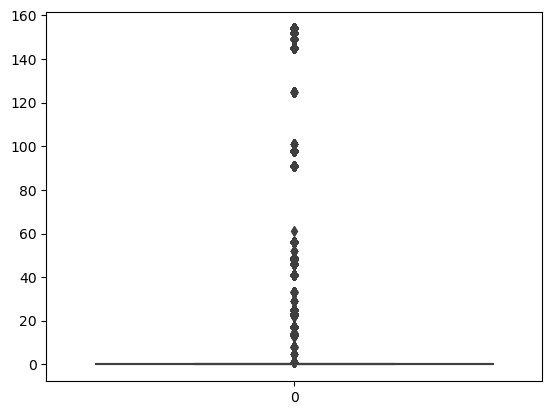

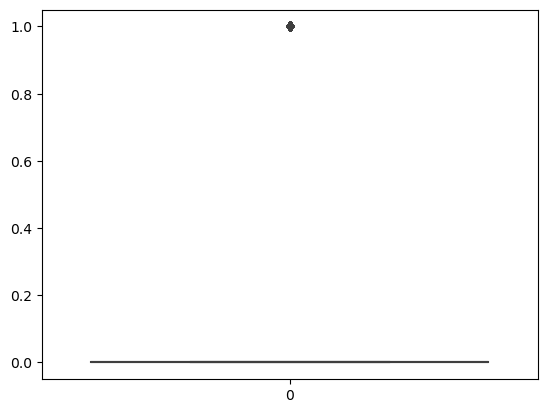

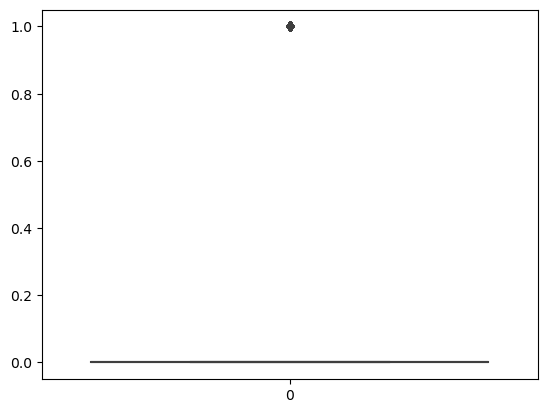

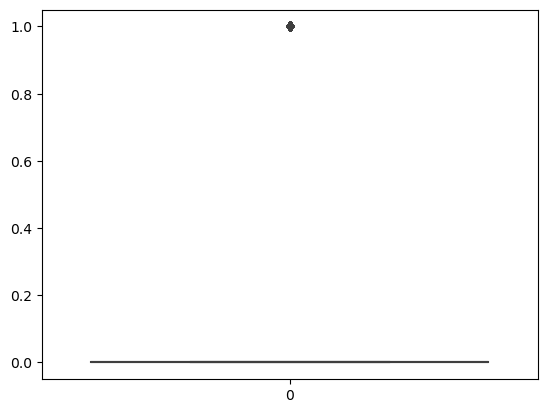

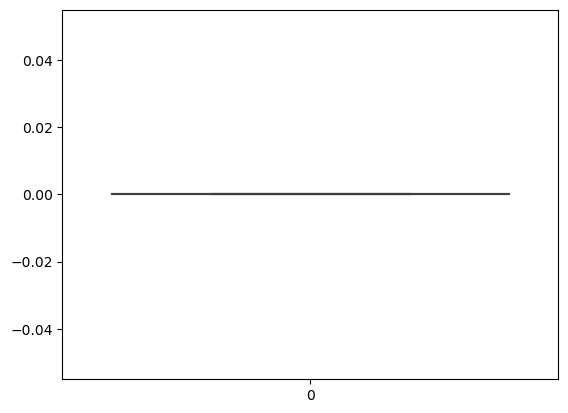

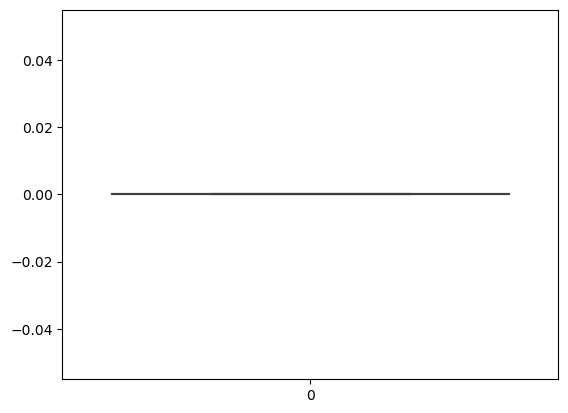

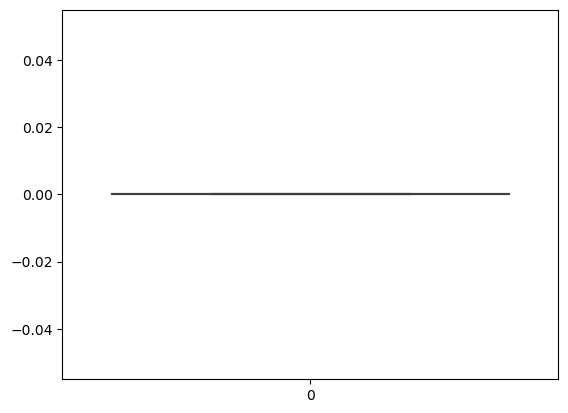

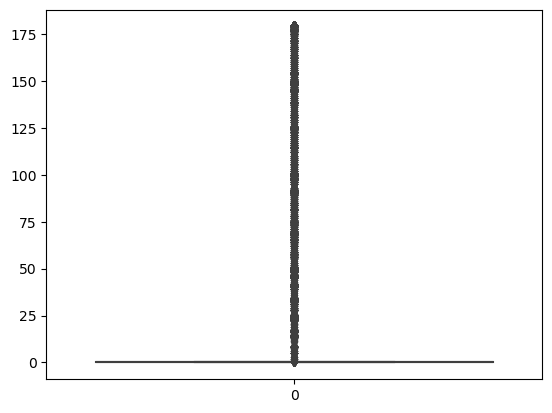

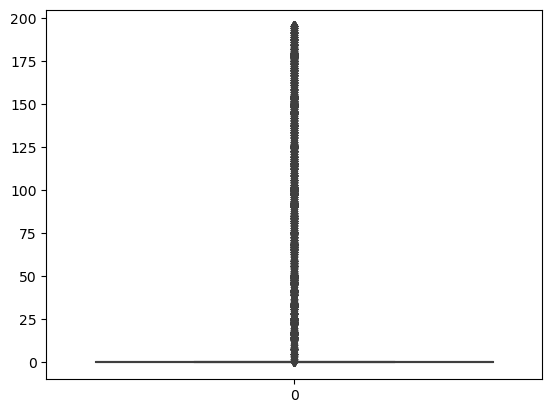

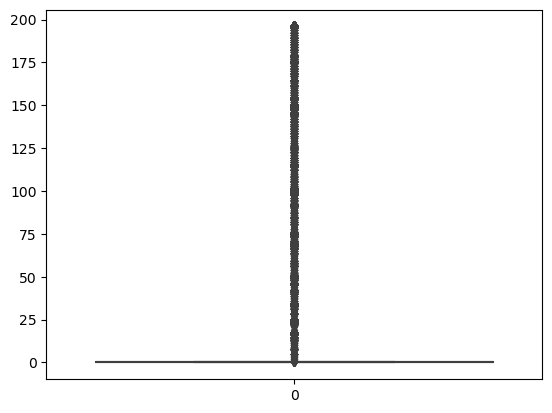

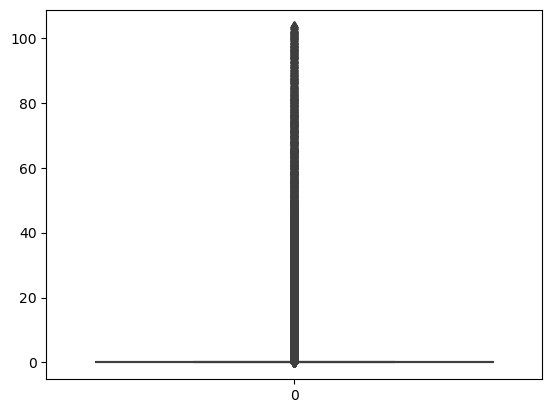

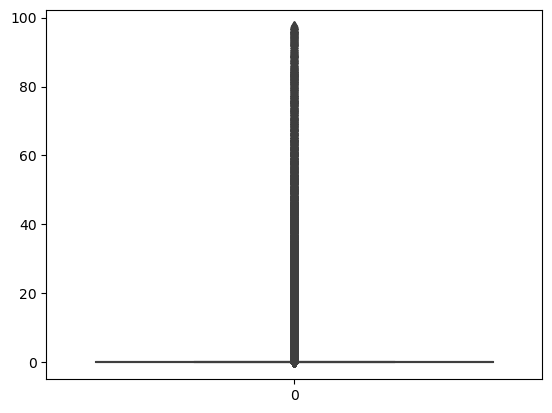

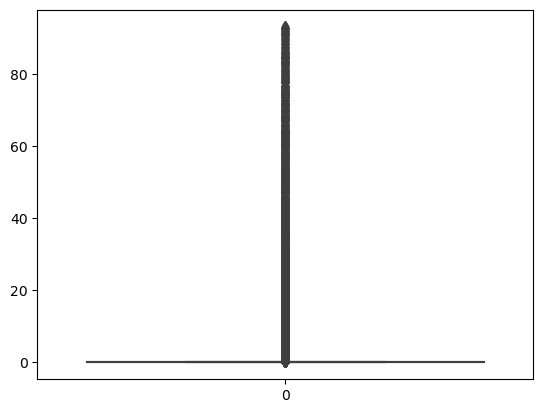

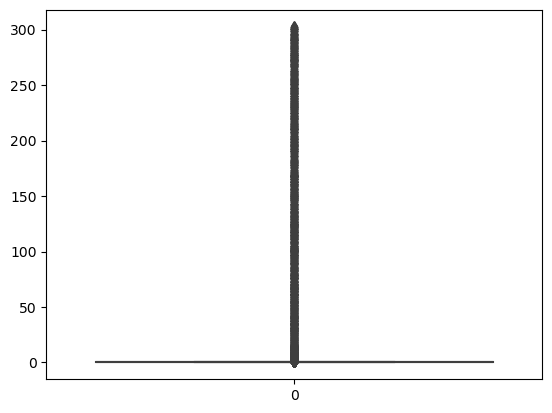

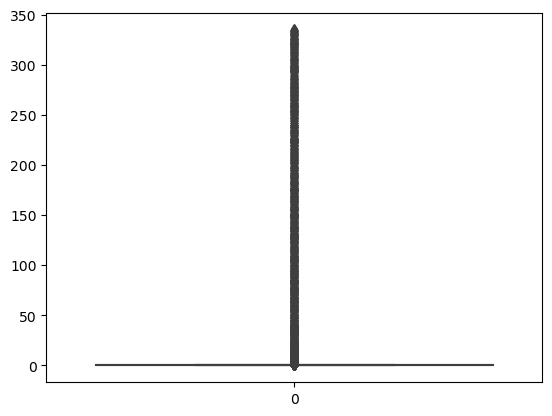

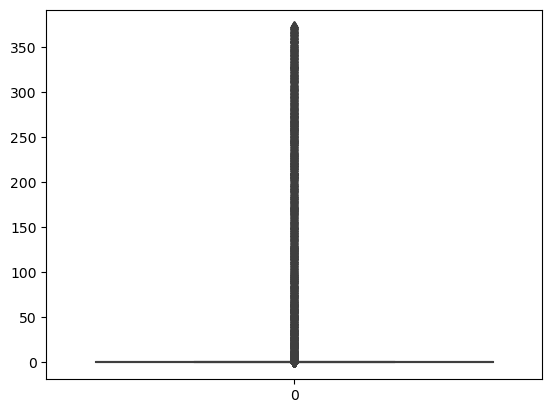

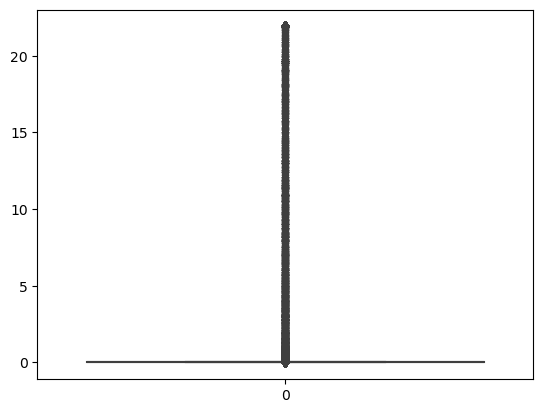

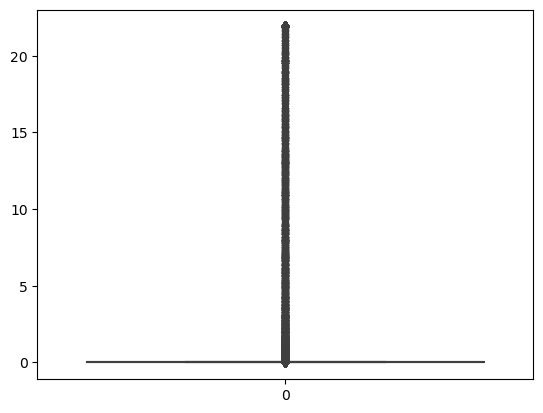

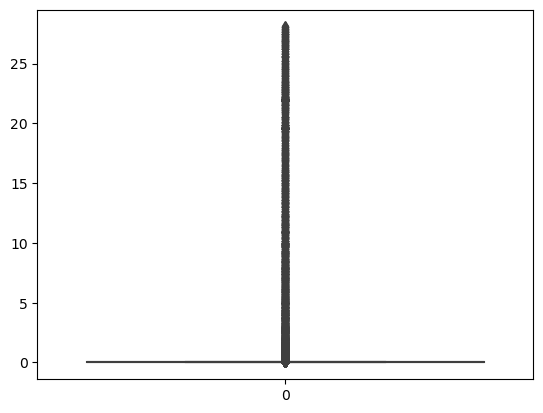

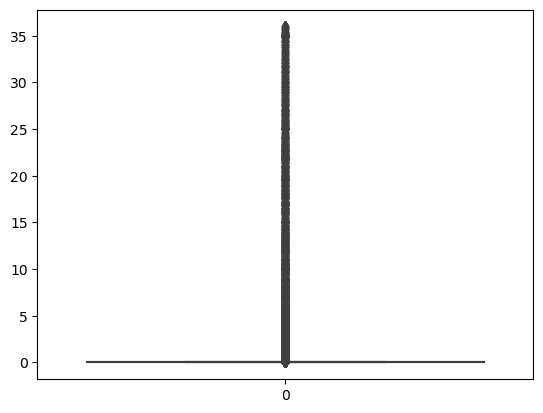

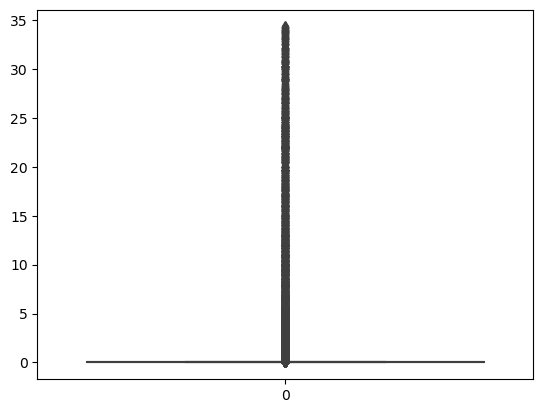

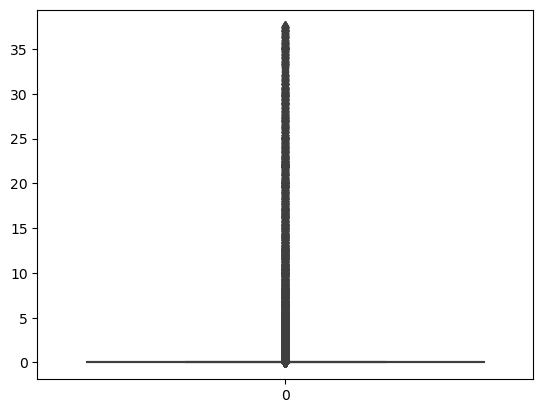

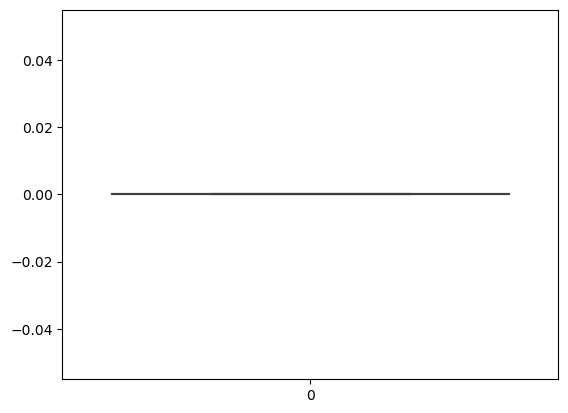

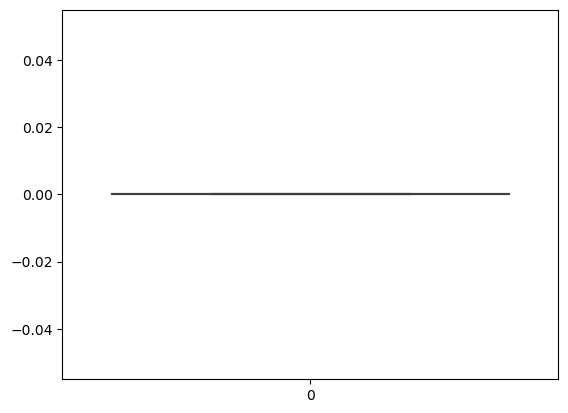

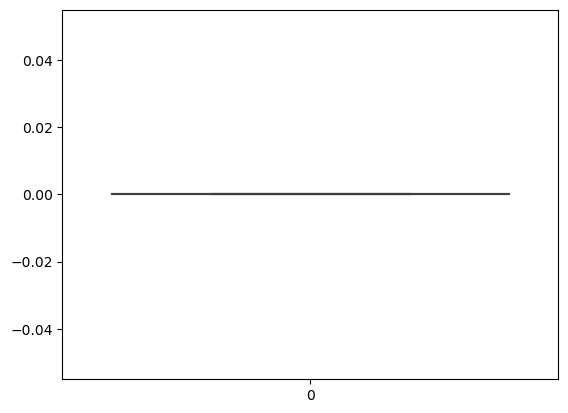

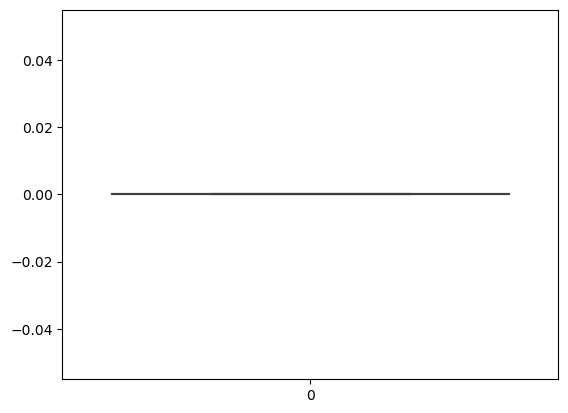

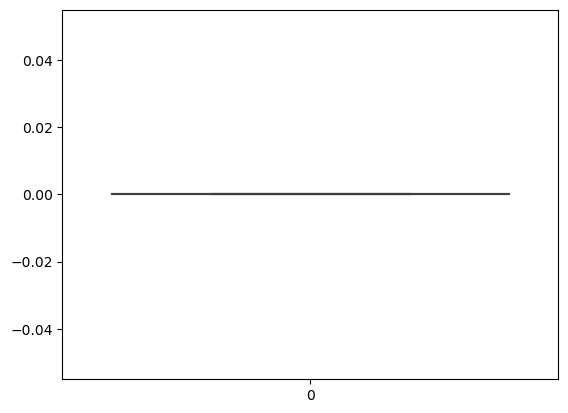

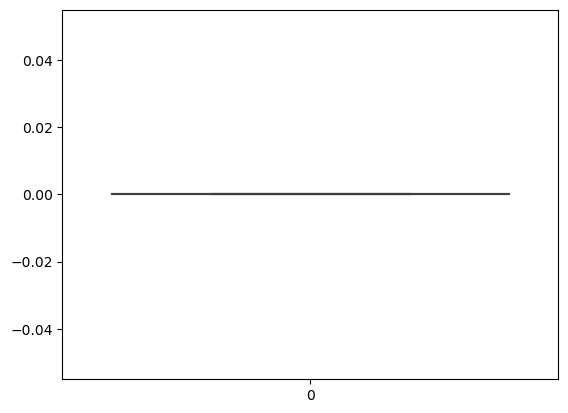

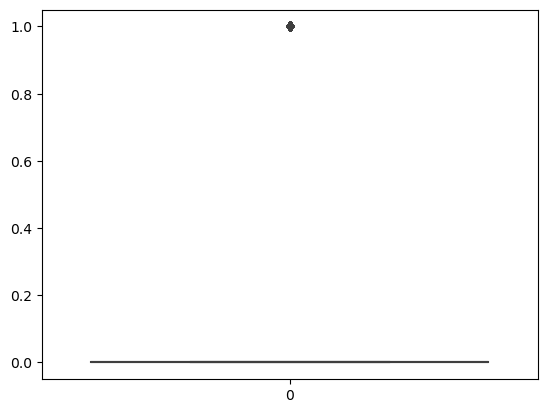

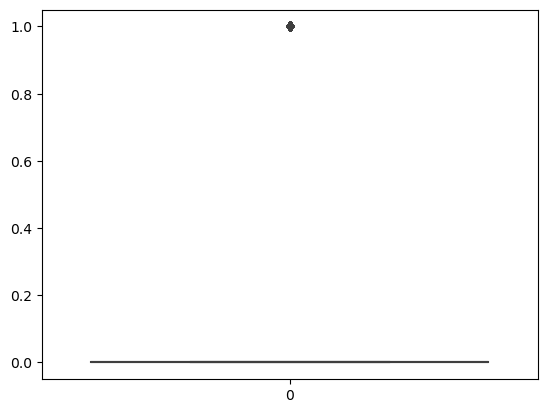

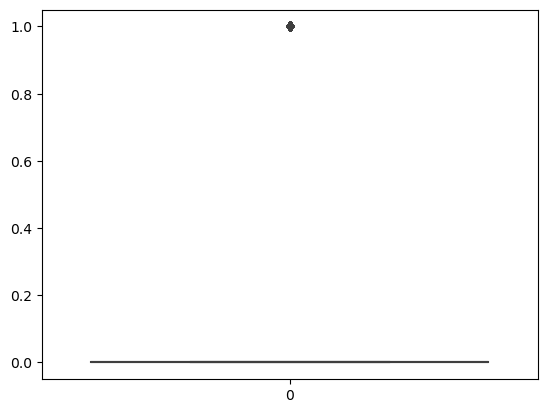

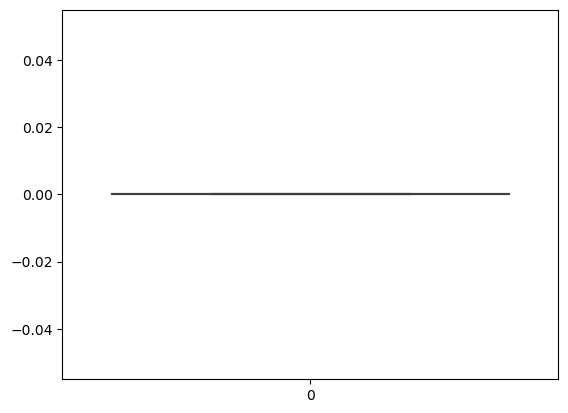

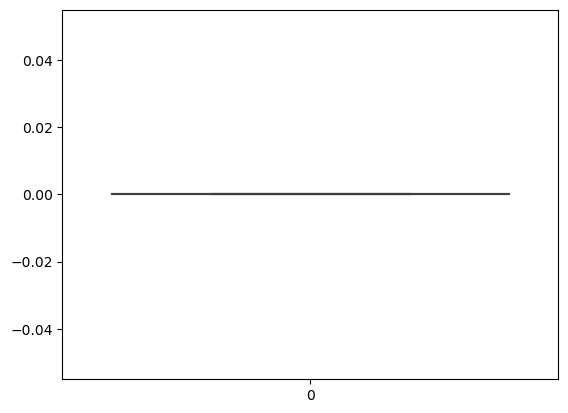

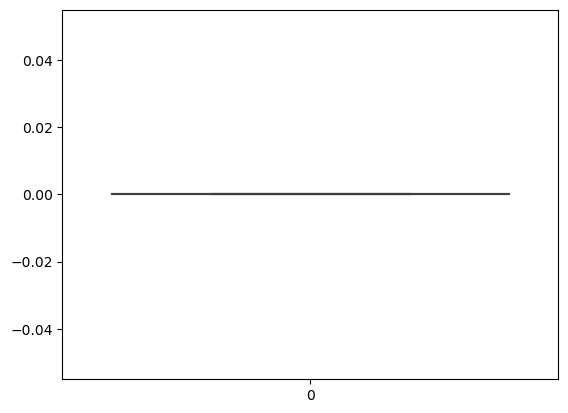

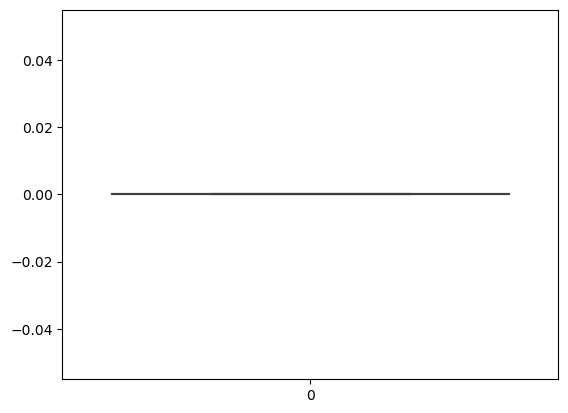

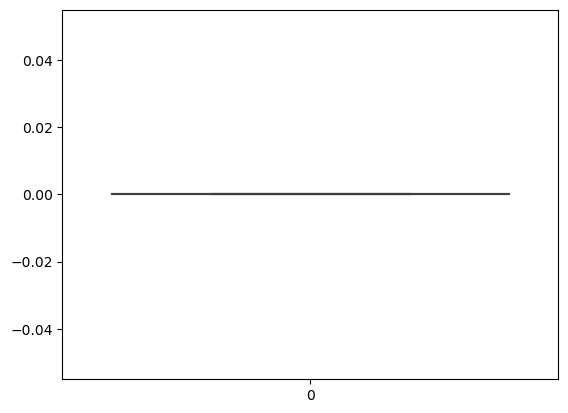

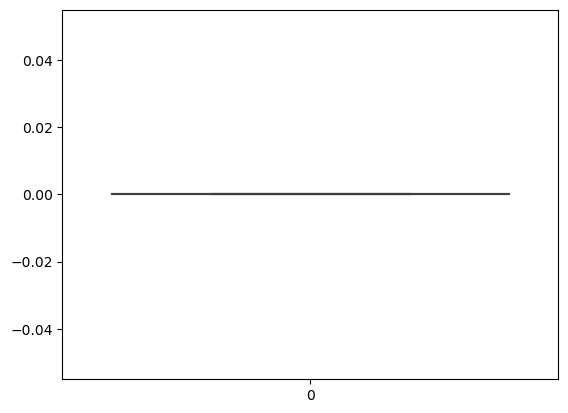

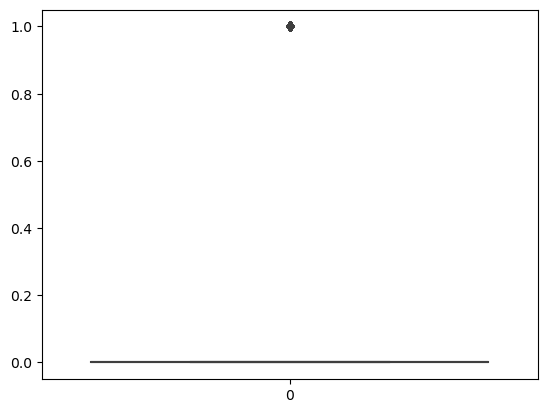

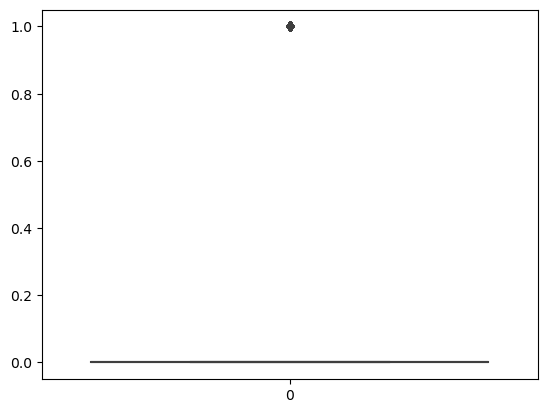

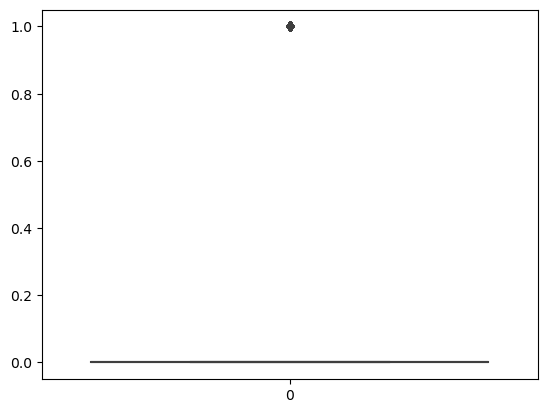

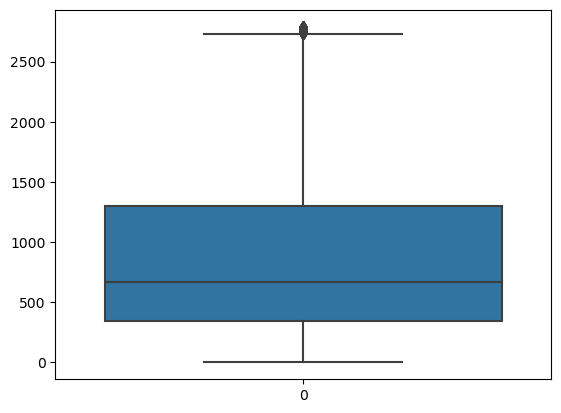

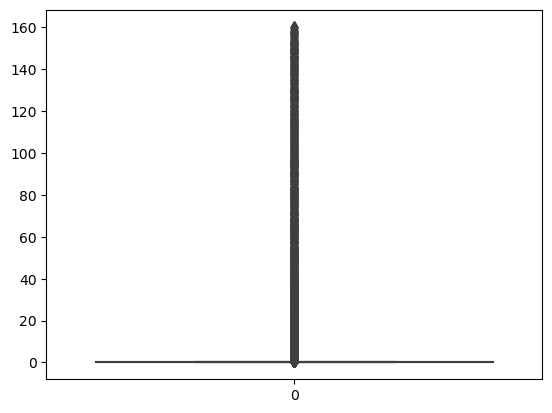

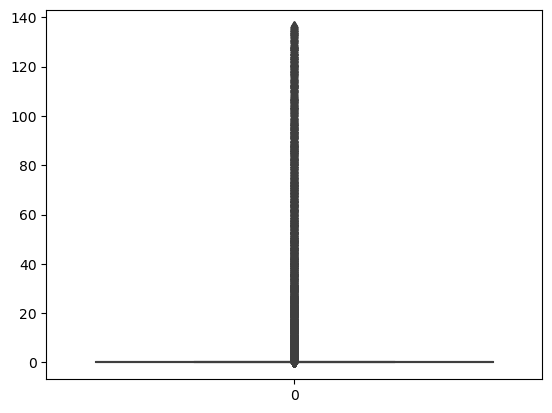

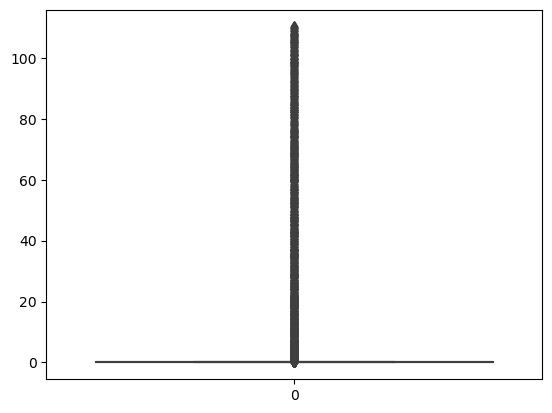

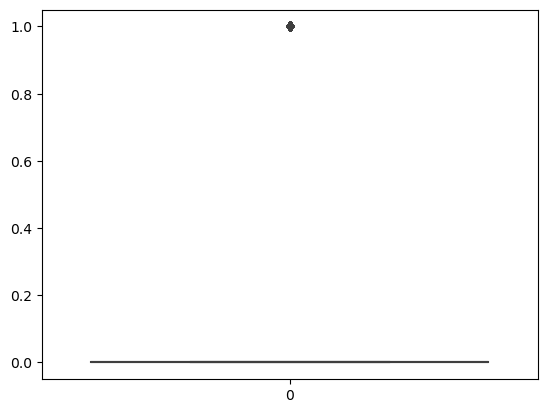

In [14]:
for i in df.columns:
   sns.boxplot(df[i])
   plt.show()

## Checking the correlation between the variables

<Axes: >

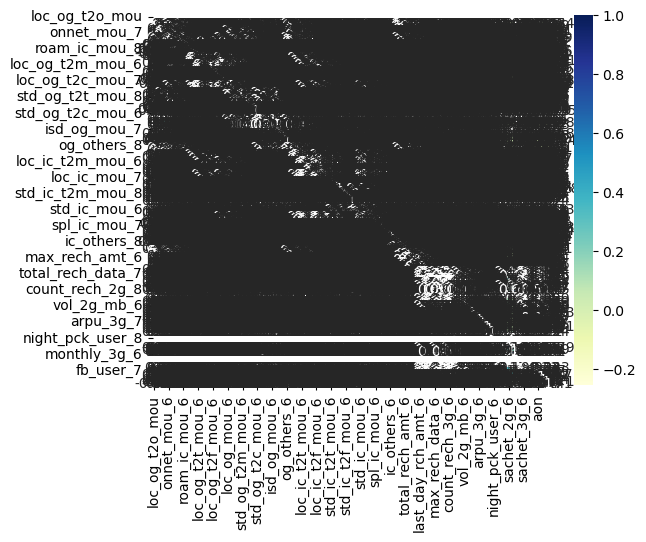

In [15]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

## Univariate EDA

count    69999.000000
mean       185.934495
std        159.233563
min          0.000000
25%         54.602000
50%        151.937000
75%        285.688000
max        619.993000
Name: arpu_6, dtype: float64


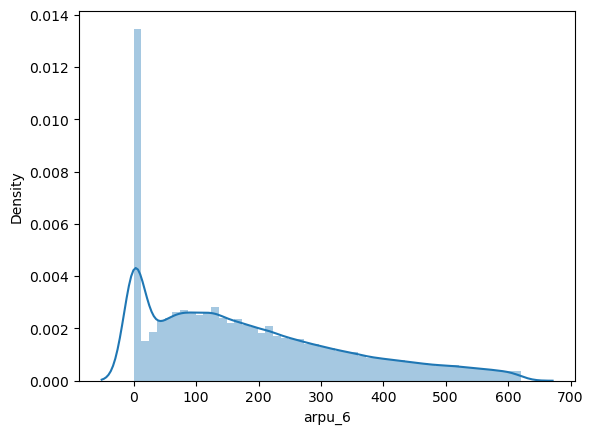

In [16]:
sns.distplot(df.arpu_6)
print(df.arpu_6.describe())

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


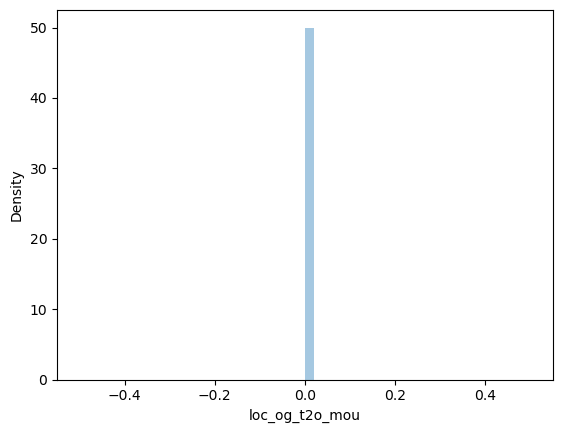

In [17]:
sns.distplot(df.loc_og_t2o_mou)
print(df.loc_og_t2o_mou.describe())

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


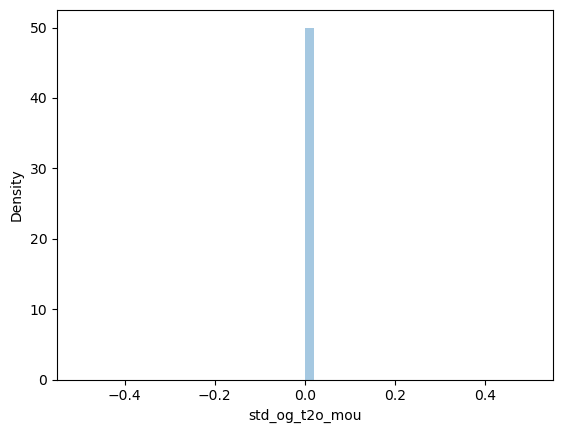

In [18]:
sns.distplot(df.std_og_t2o_mou)
print(df.std_og_t2o_mou.describe())

count    69999.000000
mean        46.239793
std         68.456657
min          0.000000
25%          0.100000
50%         15.680000
75%         60.930000
max        326.290000
Name: onnet_mou_8, dtype: float64


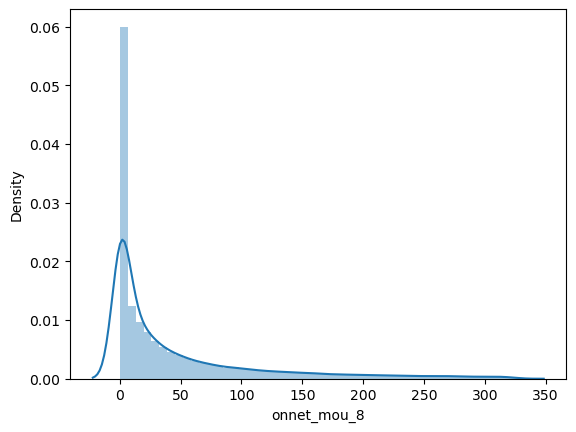

In [19]:
sns.distplot(df.onnet_mou_8)
print(df.onnet_mou_8.describe())

Variables are very skewed towards the left.

<Axes: xlabel='arpu_7', ylabel='Count'>

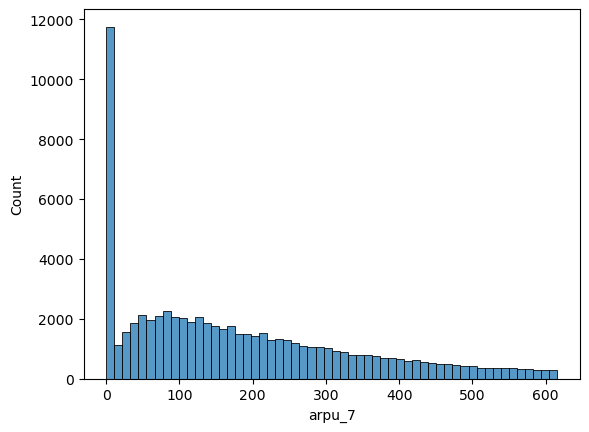

In [20]:
sns.histplot(x='arpu_7', data=df)

<Axes: xlabel='arpu_6', ylabel='Count'>

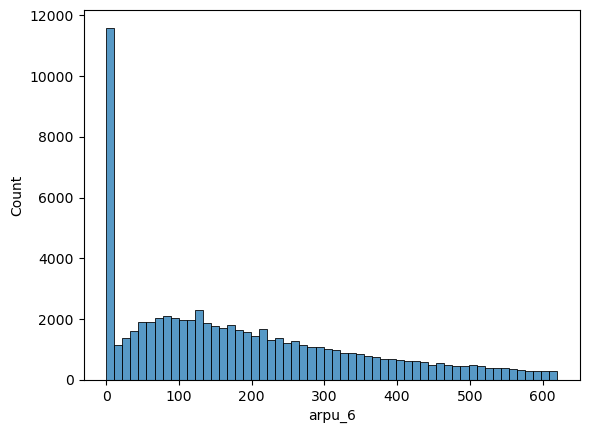

In [21]:
sns.histplot(x='arpu_6', data=df)

Looks similar patteren for all three months.

<Axes: xlabel='arpu_8', ylabel='Count'>

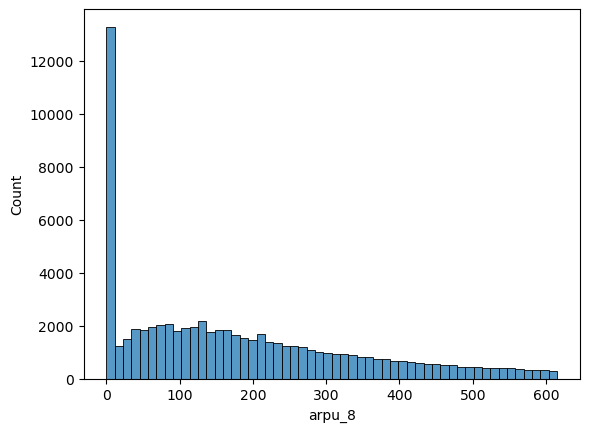

In [22]:
sns.histplot(x='arpu_8', data=df)

<Axes: xlabel='total_rech_num_6', ylabel='Count'>

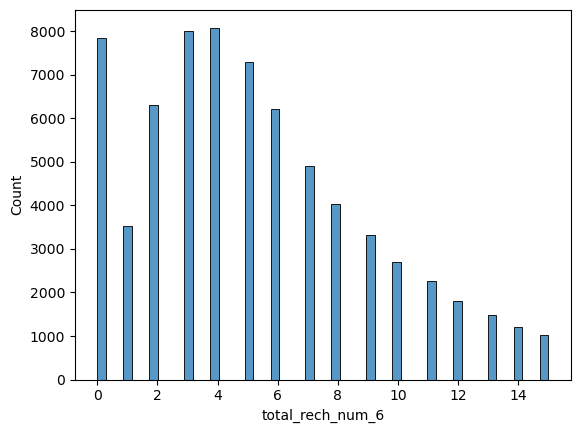

In [23]:
sns.histplot(x='total_rech_num_6', data=df)


<Axes: xlabel='total_rech_num_7', ylabel='Count'>

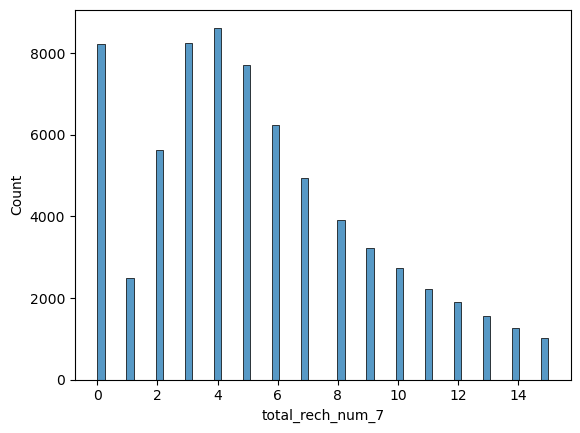

In [24]:
sns.histplot(x='total_rech_num_7', data=df)

<Axes: xlabel='total_rech_num_8', ylabel='Count'>

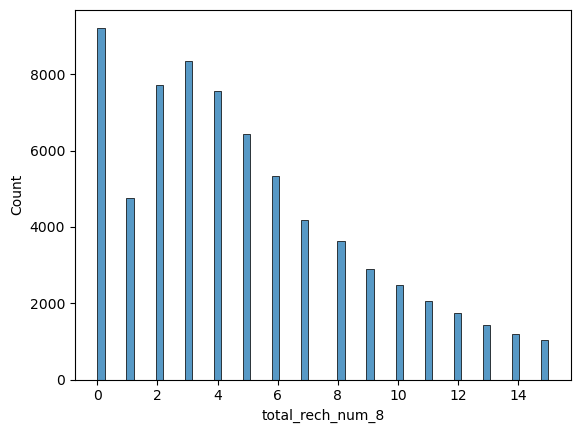

In [25]:
sns.histplot(x='total_rech_num_8', data=df)

Recharge amount looks exponentially down

## Bivariate EDA

In [26]:
# Converting churn column to int in order to do aggfunc in the pivot table
df['churn_probability'] = df['churn_probability'].astype('category')

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

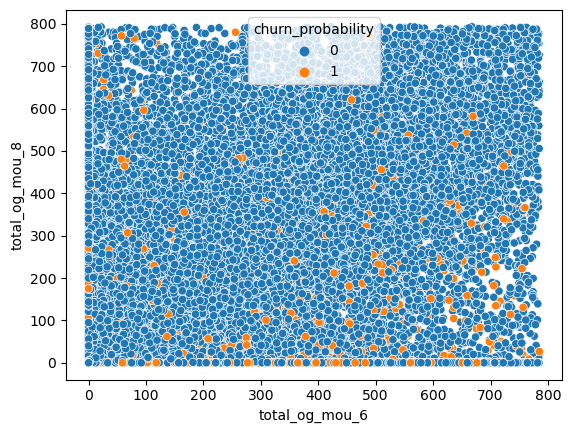

In [27]:
sns.scatterplot(x=df['total_og_mou_6'],y=df['total_og_mou_8'],hue=df['churn_probability'])

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

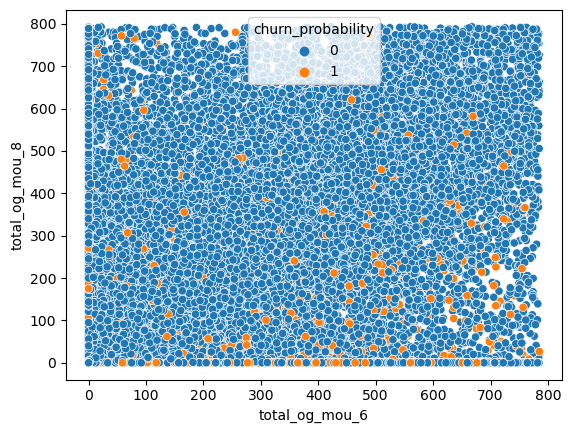

In [28]:
sns.scatterplot(x=df['total_og_mou_6'],y=df['total_og_mou_8'],hue=df['churn_probability'])

The customers with lower total_og_mou in 6th and 8th months are more likely to Churn compared to the ones with higher total_og_mou.

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

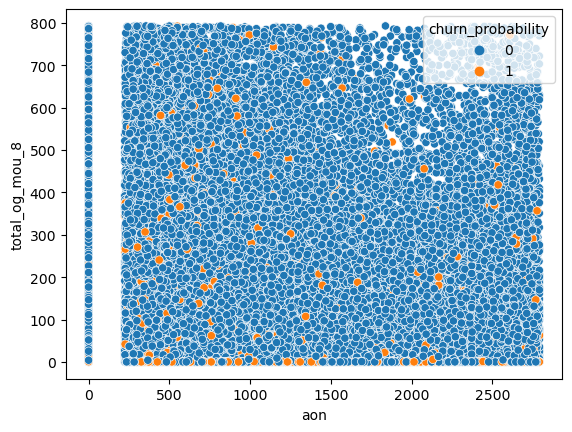

In [29]:
sns.scatterplot(x=df['aon'],y=df['total_og_mou_8'],hue=df['churn_probability'])

The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.

The customers with total_ic_mou_8 > 2000 are very less likely to churn.

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

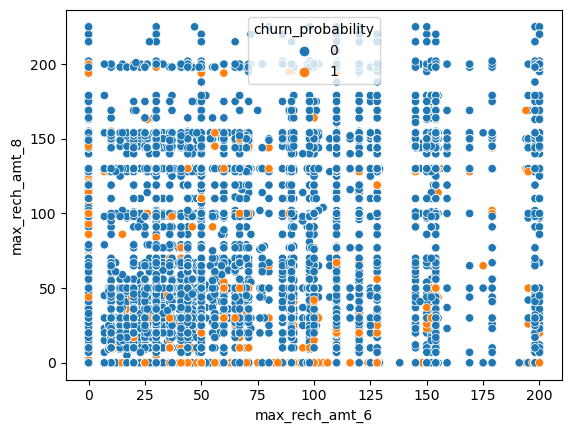

In [30]:
sns.scatterplot(x=df['max_rech_amt_6'],y=df['max_rech_amt_8'],hue=df['churn_probability'])

# 3. Modelling

## Train Test split

Target variable is 'churn_probability' and assigned to 'y'

In [31]:
y = df.pop('churn_probability')

Feature variables are assigned to 'X'

In [32]:
X = df

Checking the shape of the feature variable dataset

In [33]:
X.shape

(69999, 160)

Test-train split, with testsize of 30% 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [35]:
X_train.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=160)

defining numeric columns for scaling

In [36]:
num_col = ['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'ic_others_6',
 'ic_others_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_6',
 'max_rech_data_7',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_2g_6',
 'arpu_2g_7',
 'monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'sachet_2g_7',
 'monthly_3g_6',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'aon',
 'jul_vbc_3g',
 'jun_vbc_3g']

## Scaling
Instantiating the scaler and transforming the numeric feature variables for both training data and test data

In [37]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
48645             0.0             0.0             0.0 -0.254559 -0.442304   
54979             0.0             0.0             0.0 -0.494999 -0.946375   
7134              0.0             0.0             0.0 -1.166268  2.710387   
6361              0.0             0.0             0.0 -0.529916 -0.644201   
6647              0.0             0.0             0.0 -0.675463 -0.224103   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
48645  223.732    -0.671874    -0.661049         1.10     -0.703129  ...   
54979  106.170     0.006904    -0.022911        68.96     -0.665943  ...   
7134   553.857    -0.697669    -0.683206         0.00     -0.897389  ...   
6361   196.600    -0.549030    -0.516810        39.69     -0.631625  ...   
6647    83.040    -0.584943    -0.552405         0.00      0.170774  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
48645          0.0          0.0          0.0        1.0        1.0        1.0   
54979          0.0          0.0          0.0        0.0        0.0        0.0   
7134           0.0          0.0          0.0        0.0        0.0        0.0   
6361           0.0          0.0          0.0        0.0        0.0        0.0   
6647           0.0          0.0          0.0        0.0        0.0        0.0   

            aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
48645  0.334325         0.0   -0.197511   -0.179478  
54979 -0.164175         0.0   -0.197511   -0.179478  
7134  -1.179687         0.0   -0.197511   -0.179478  
6361   0.478454         0.0   -0.197511   -0.179478  
6647  -1.179687         0.0   -0.197511   -0.179478  

[5 rows x 160 columns]

In [38]:
X_test[num_col] = scaler.fit_transform(X_test[num_col])
X_test.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
3425              0.0             0.0             0.0 -0.952104  2.439958   
33067             0.0             0.0             0.0 -1.171059  2.480376   
52420             0.0             0.0             0.0  0.496528 -0.809801   
5220              0.0             0.0             0.0 -0.976377 -0.866572   
33958             0.0             0.0             0.0 -0.740303 -0.422227   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
3425     0.000    -0.320910    -0.678276         0.00     -0.912894  ...   
33067  248.855    -0.694077     3.321352        25.63     -0.913430  ...   
52420    0.520     0.816658    -0.289252         0.00     -0.291487  ...   
5220    82.767    -0.674728    -0.678276         0.00     -0.881868  ...   
33958   54.830    -0.580548    -0.248551        19.36      0.158519  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
3425           0.0          0.0          0.0        0.0        0.0        0.0   
33067          0.0          0.0          0.0        1.0        0.0        0.0   
52420          0.0          0.0          0.0        0.0        0.0        0.0   
5220           0.0          0.0          0.0        0.0        1.0        1.0   
33958          0.0          0.0          0.0        0.0        0.0        0.0   

            aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
3425  -0.064761         0.0   -0.195057   -0.180489  
33067 -0.072648         0.0   -0.195057   -0.180489  
52420 -0.151522         0.0   -0.195057   -0.180489  
5220  -1.176878         0.0   -0.195057   -0.180489  
33958  1.435152         0.0   -0.195057   -0.180489  

[5 rows x 160 columns]

This is a classification problem, therefore logistic regression models and tree models can be used.

## Model No. 1: Logistic regression.

In [39]:
lr = LogisticRegression(class_weight='balanced', random_state=100)

In [40]:
X_train.isnull().sum()

loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
arpu_6            0
arpu_7            0
                 ..
fb_user_8         0
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
Length: 160, dtype: int64

Fitting the logistic regression model

In [42]:
baseline_model = lr.fit(X=X_train, y=y_train)

In [43]:
y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [44]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

## Baseline Performance

In [45]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [46]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [47]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[35706  8260]
 [ 1230  3803]]

Confusion Matrix for test: 
 [[15300  3601]
 [  507  1592]]


Ensuring that there is no null values in test dataset

In [48]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.806
Sensitivity / True Positive Rate / Recall : 0.756
Specificity / True Negative Rate :  0.812
Precision / Positive Predictive Value : 0.315
F1-score : 0.445


Test Performance : 

Accuracy : 0.804
Sensitivity / True Positive Rate / Recall : 0.758
Specificity / True Negative Rate :  0.809
Precision / Positive Predictive Value : 0.307
F1-score : 0.437


## Baseline Performance - Finding Optimum Probability Cutoff

In [49]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
48645    1    1    1    1    1    0    0    0    0    0
54979    1    1    0    0    0    0    0    0    0    0
7134     1    0    0    0    0    0    0    0    0    0
6361     1    0    0    0    0    0    0    0    0    0
6647     1    0    0    0    0    0    0    0    0    0

In [50]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.103
0.1        0.961        0.324     0.389
0.2        0.923        0.499     0.543
0.3        0.875        0.626     0.652
0.4        0.822        0.728     0.738
0.5        0.756        0.812     0.806
0.6        0.671        0.882     0.860
0.7        0.541        0.937     0.896
0.8        0.329        0.975     0.909
0.9        0.071        0.995     0.900

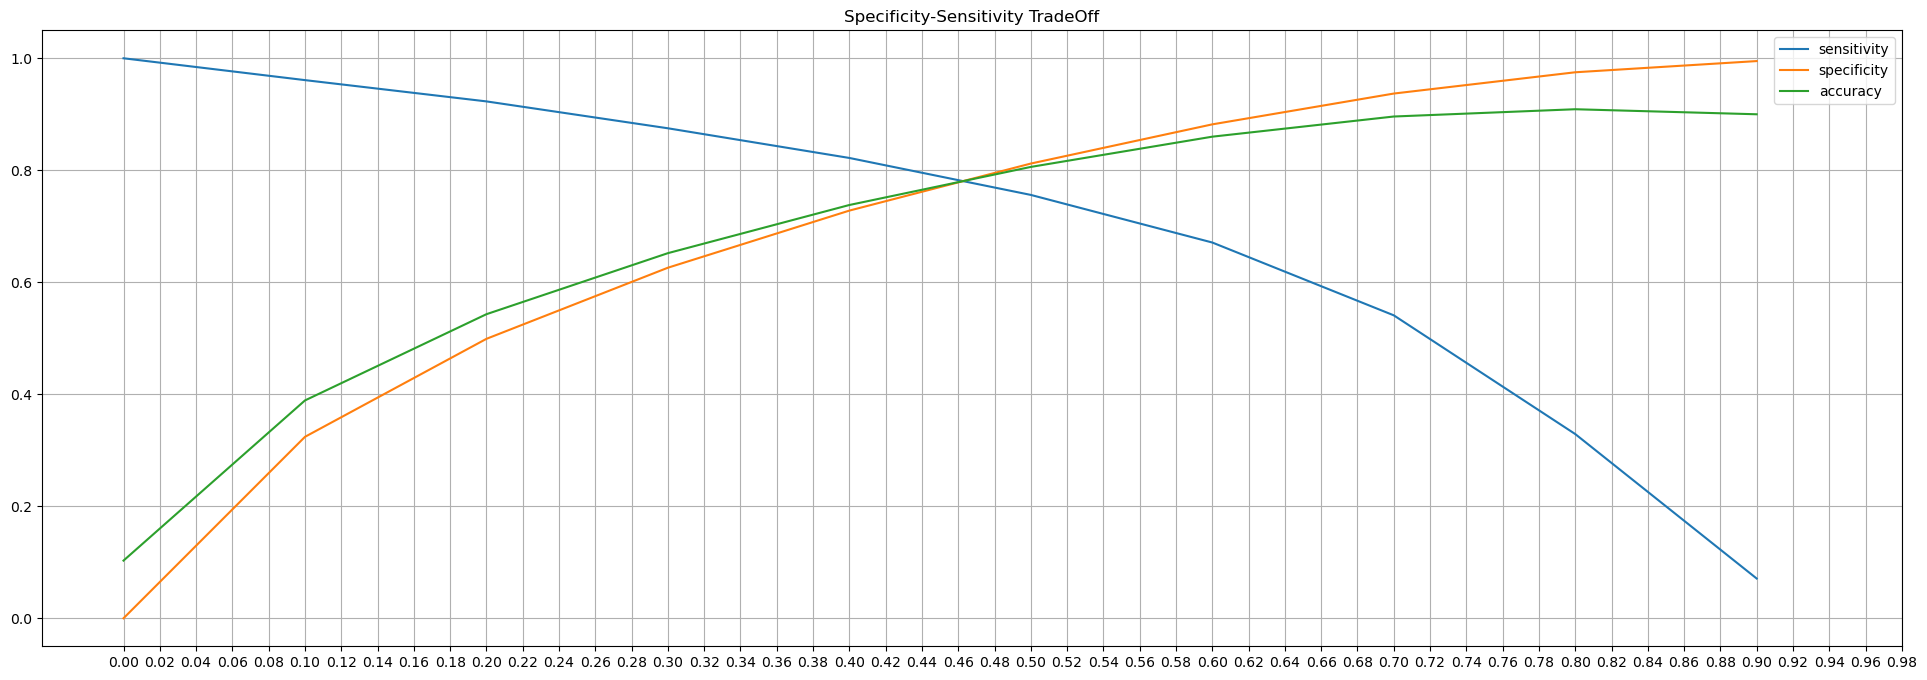

In [51]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [55]:
optimum_cutoff = 0.46
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[34303  9663]
 [ 1084  3949]]

Confusion Matrix for test: 
 [[14705  4196]
 [  432  1667]]


In [56]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.781
Sensitivity / True Positive Rate / Recall : 0.785
Specificity / True Negative Rate :  0.78
Precision / Positive Predictive Value : 0.29
F1-score : 0.424


Test Performance : 

Accuracy : 0.78
Sensitivity / True Positive Rate / Recall : 0.794
Specificity / True Negative Rate :  0.778
Precision / Positive Predictive Value : 0.284
F1-score : 0.418


In [57]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.857 

ROC AUC score for Test :  0.858


In [132]:
X_test = X_test.fillna(0)

In [133]:
y_test = y_test.fillna(0)

In [134]:
X_test.shape

(21000, 160)

Predicitng the target variables

In [59]:
y_pred_lr = lr.predict(X_test)

Arriving at the metrics

In [60]:
cm = confusion_matrix(y_test, y_pred_lr)
print("confusion matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

print("Accuracy \t", metrics.accuracy_score(y_test, y_pred_lr))
print("Recall \t", metrics.recall_score(y_test, y_pred_lr))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred_lr),2))

confusion matrix 	
 [[15300  3601]
 [  507  1592]]
sensitivity 	 0.76
specificity 	 0.81
Accuracy 	 0.8043809523809524
Recall 	 0.7584564078132444
area under the curve 	 0.78


Though the metrics from the Logistic regression model is not bad, let us see if we can improve on the accuracy scores

## Model No. 2: Decision tree model

We can use grid search algorithm to arrive at the optimum value of the model parameters

In [61]:
from sklearn.model_selection import GridSearchCV

parameters are defined as max_depth, min_samples_leaf and 'criterion' to iterate over and 4 fold cross validation is used.<br> Scoring metric is 'accuracy' score<br> Grid search model is fit on X_train and y_train

In [62]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth' : [3,4,5,6,7,8, 10, 20],
    'min_samples_leaf' : [5,10, 15, 20, 25, 50, 100],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs = -1, verbose = 1, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 112 candidates, totalling 448 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100]},
             scoring='accuracy', verbose=1)

Checking the grid search parameters of the result

In [63]:
grid_search.best_score_

0.9389375575848757

In [64]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 50}

Best estimator is assigned to the variable dt_best

In [65]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=42)

Defining a function to arrive at the metrics

In [66]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train set performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test set performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    print(recall_score(y_test, y_test_pred))
    

Model is evaluated with the best parameter for decision tree model resulted from gridsearch algorithm

In [67]:
evaluate_model(dt_best)

Train set performance
0.9401212269638156
[[42911  1055]
 [ 1879  3154]]
--------------------------------------------------
Test set performance
0.9407142857142857
[[18460   441]
 [  804  1295]]
0.616960457360648


It can be seen that the accuracy scores are good enough for a normal decision tree model. Test accuracy and Training accuracy are close hinting at very less overfitting on data<br> recall value is 0.617

Importing packages for tree visualization

In [68]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from graphviz import Source
from sklearn.tree import plot_tree

Plotting the tree

[Text(0.521978021978022, 0.9285714285714286, 'total_ic_mou_8 <= 1.12\ngini = 0.184\nsamples = 48999\nvalue = [43966, 5033]\nclass = Churn'),
 Text(0.2802197802197802, 0.7857142857142857, 'total_og_mou_8 <= 0.42\ngini = 0.45\nsamples = 9889\nvalue = [6513, 3376]\nclass = Churn'),
 Text(0.16758241758241757, 0.6428571428571429, 'fb_user_8 <= 0.5\ngini = 0.491\nsamples = 5616\nvalue = [2422, 3194]\nclass = No Churn'),
 Text(0.08791208791208792, 0.5, 'loc_ic_t2f_mou_8 <= 0.05\ngini = 0.453\nsamples = 4729\nvalue = [1639, 3090]\nclass = No Churn'),
 Text(0.04395604395604396, 0.35714285714285715, 'std_og_mou_8 <= 0.065\ngini = 0.412\nsamples = 4336\nvalue = [1256, 3080]\nclass = No Churn'),
 Text(0.02197802197802198, 0.21428571428571427, 'loc_ic_t2m_mou_8 <= 0.025\ngini = 0.387\nsamples = 4169\nvalue = [1092, 3077]\nclass = No Churn'),
 Text(0.01098901098901099, 0.07142857142857142, 'gini = 0.369\nsamples = 4049\nvalue = [987, 3062]\nclass = No Churn'),
 Text(0.03296703296703297, 0.0714285714

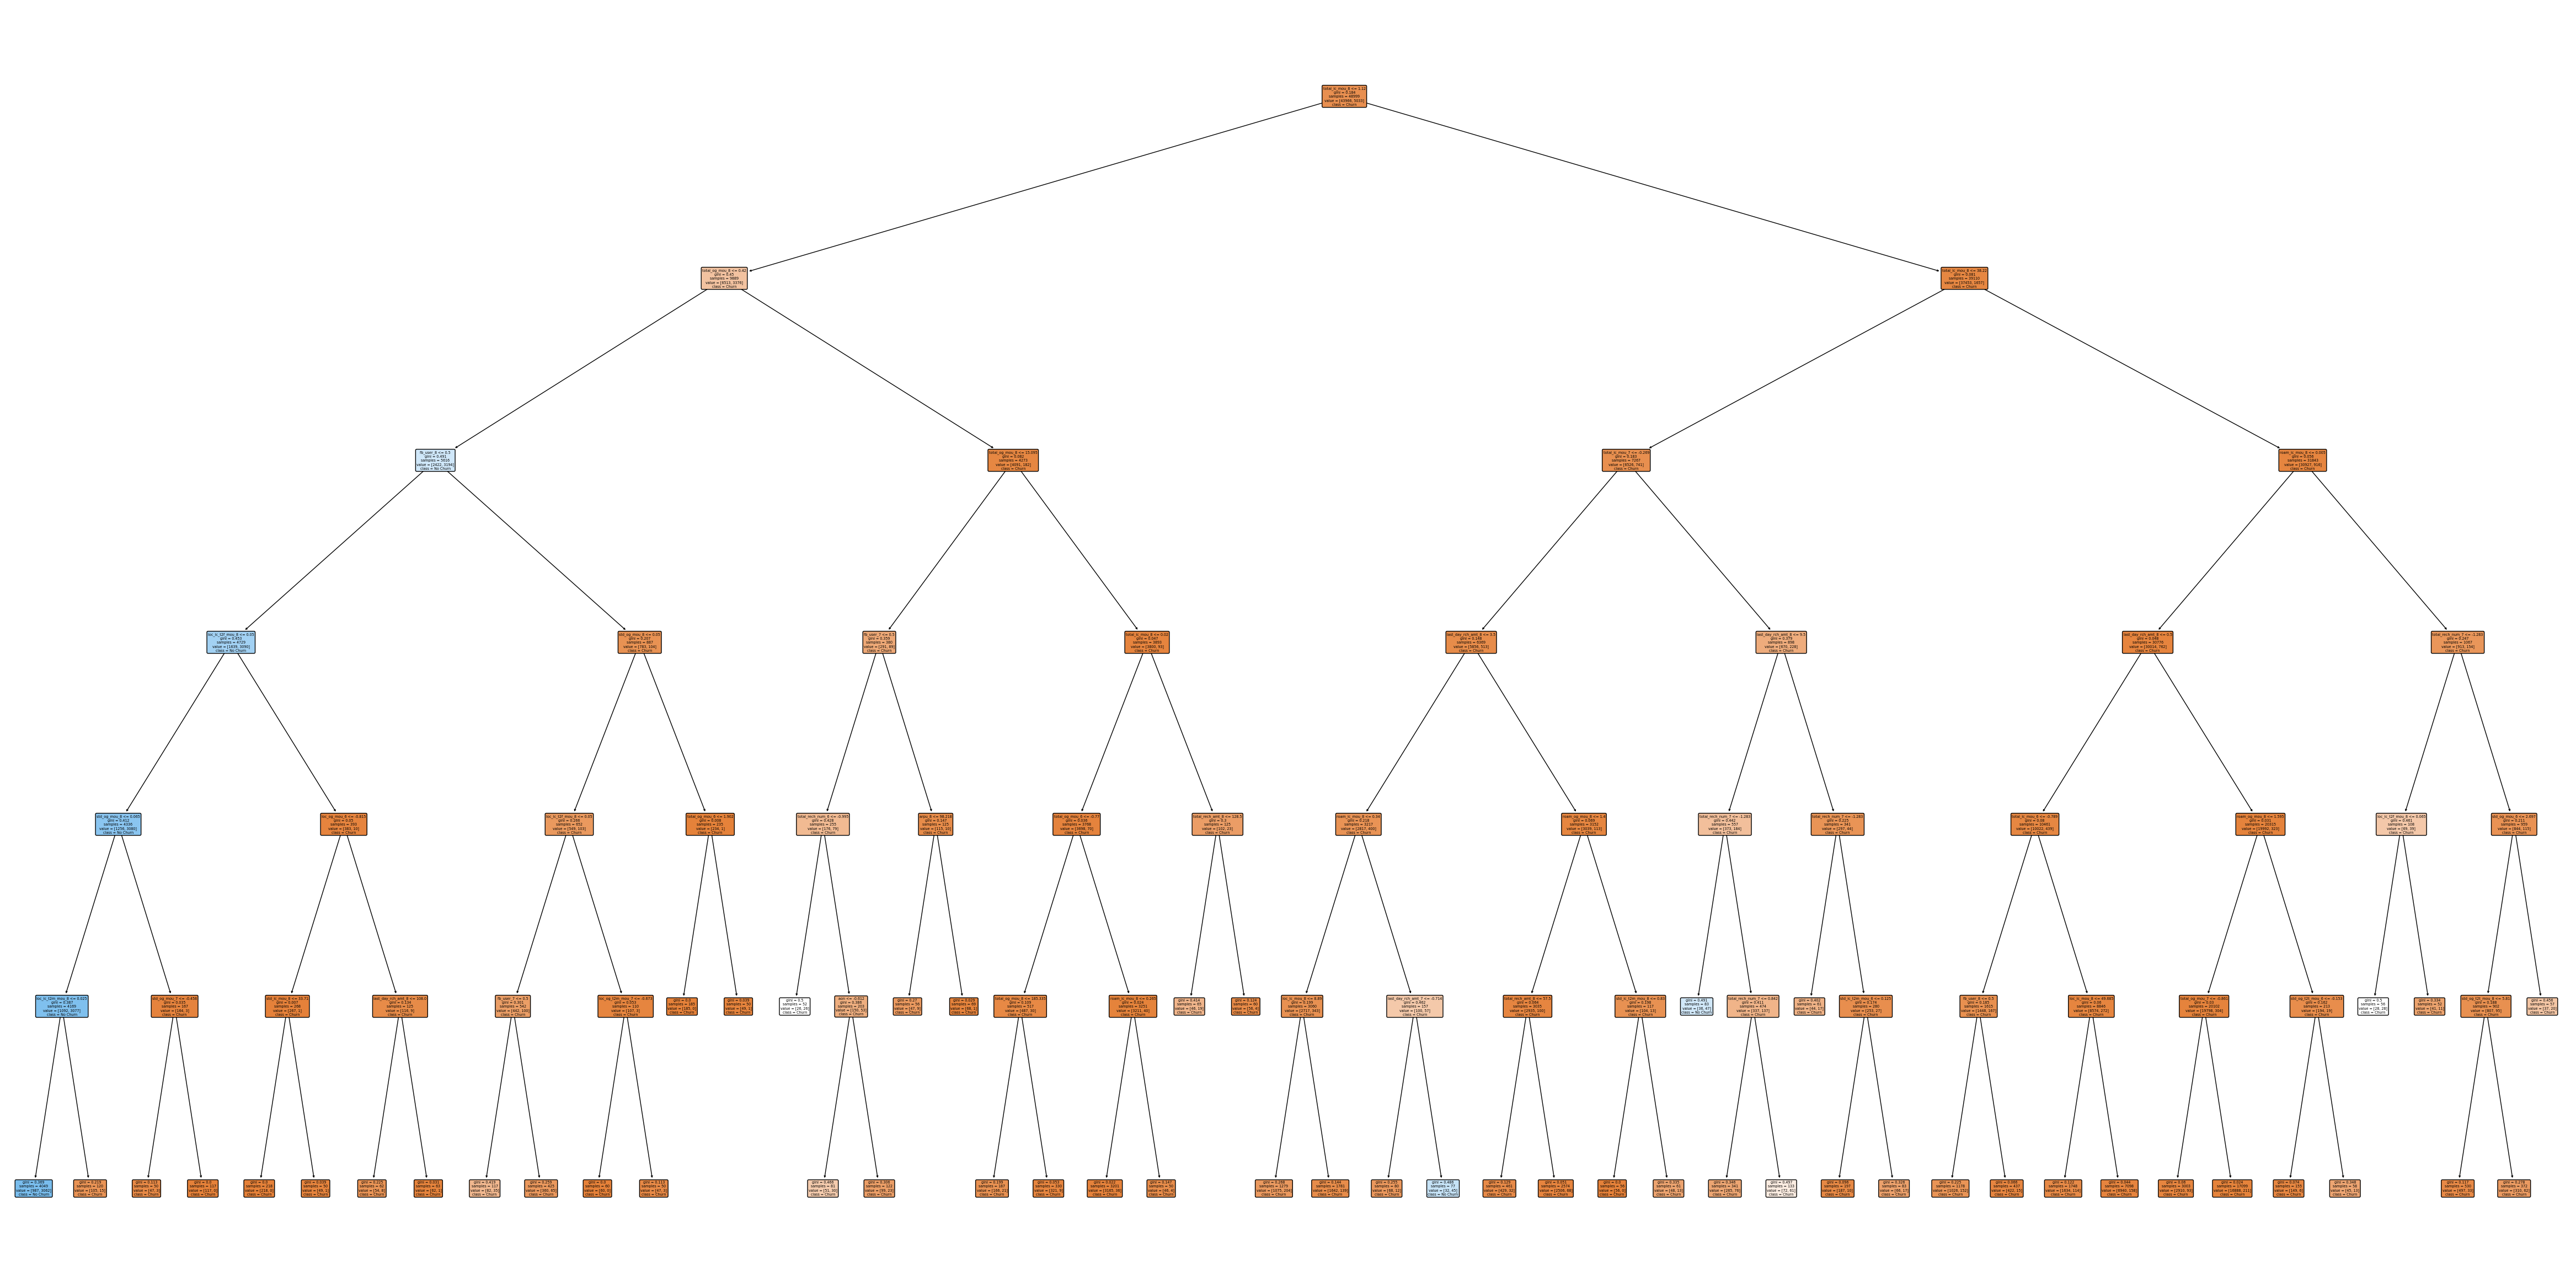

In [69]:
plt.figure(figsize=(60,30))
plot_tree(dt_best, feature_names = X_train.columns,class_names=['Churn', "No Churn"],filled=True, rounded=True)

# Applying PCA for dimensionality reduction

Importing the necessary libraries

In [70]:
from sklearn.decomposition import PCA

Instantiating the PCA object

In [71]:
pca = PCA(random_state=42)

In [72]:
pca.fit(X_train)

PCA(random_state=42)

Arriving at the scree plot

In [73]:
pca.explained_variance_ratio_

array([4.48308336e-01, 1.45437033e-01, 1.18841304e-01, 4.76079339e-02,
       4.50290104e-02, 3.13094422e-02, 2.95571713e-02, 2.26615679e-02,
       2.04839169e-02, 1.70065306e-02, 1.65478932e-02, 9.44973621e-03,
       9.10870032e-03, 7.78792947e-03, 7.46366085e-03, 6.32515924e-03,
       4.62810397e-03, 2.85844613e-03, 2.72866355e-03, 1.79131415e-03,
       1.60395276e-03, 1.47742798e-03, 7.92634511e-04, 3.00246888e-04,
       1.56688053e-04, 9.05350731e-05, 7.52222651e-05, 6.40998815e-05,
       3.98894403e-05, 3.00637051e-05, 2.76518663e-05, 2.01280020e-05,
       1.54901662e-05, 1.25858784e-05, 1.11893126e-05, 9.64381363e-06,
       8.81164964e-06, 8.04372065e-06, 7.77064201e-06, 7.67645560e-06,
       7.31063374e-06, 7.09834545e-06, 6.74084784e-06, 6.66742014e-06,
       6.56392466e-06, 6.46294701e-06, 6.23564906e-06, 6.20787579e-06,
       6.04220769e-06, 5.98189363e-06, 5.82736479e-06, 5.65213860e-06,
       5.61038313e-06, 5.54135005e-06, 5.48181206e-06, 5.44747706e-06,
      

In [74]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

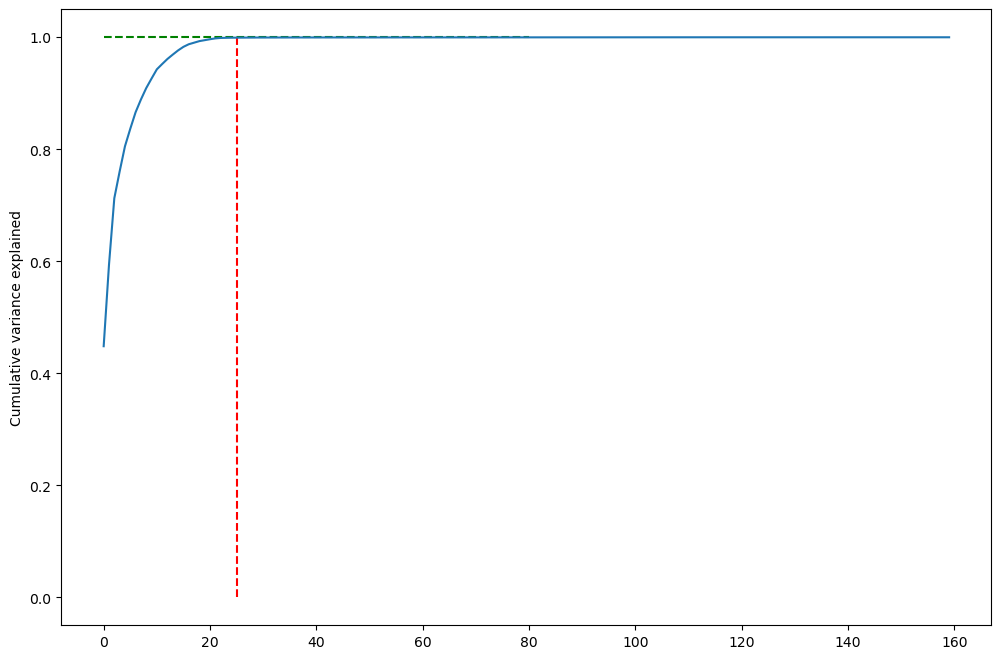

In [75]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=25, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=1, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Trying out incremental PCA and the libraries are imported

In [76]:
from sklearn.decomposition import IncrementalPCA

Though the scree plot is showing 25 variables, giving the components as 90. Even if 90 is given, the process will halt once there is no further improvement in scores by adding more feature variables

In [77]:
pca_final = IncrementalPCA(n_components=90)

Transforming the training data based on the finalized principal components

In [78]:
df_train_pca = pca_final.fit_transform(X_train)

In [79]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(21000, 90)

# Model no. 3 : Decision Tree model with PCA <br>Grid search algorithm, for tree model using the Principal components as feature variables

In [80]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth' : [3,4,5,6,7,8, 10, 20],
    'min_samples_leaf' : [5,10, 15, 20, 25, 50, 100],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs = -1, verbose = 1, scoring= 'accuracy')
grid_search.fit(df_train_pca, y_train)


Fitting 4 folds for each of 112 candidates, totalling 448 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100]},
             scoring='accuracy', verbose=1)

grid_search result parameters

In [81]:
grid_search

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100]},
             scoring='accuracy', verbose=1)

Assigning the best parameters to dt_best_pca

In [82]:
dt_best_pca = grid_search.best_estimator_
dt_best_pca

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100, random_state=42)

Defining a function to evaluate model from principal components

In [83]:
def evaluate_model_DT(dt_classifier):
    y_train_pred = dt_classifier.predict(df_train_pca)
    y_test_pred = dt_classifier.predict(df_test_pca)
    print("Train set performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test set performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    print(recall_score(y_test, y_test_pred))

Model is evaluated

In [84]:
evaluate_model_DT(dt_best_pca)

Train set performance
0.9360395110104288
[[43394   572]
 [ 2562  2471]]
--------------------------------------------------
Test set performance
0.9345238095238095
[[18637   264]
 [ 1111   988]]
0.47070033349213913


It can be seen that the acuracy scores are good but marginally lower than normal decision tree model without using PCA<br>recall value is also low

Plotting the decision tree based on the best parameters from gridsearch

[Text(0.521978021978022, 0.9285714285714286, 'total_ic_mou_8 <= 1.12\ngini = 0.184\nsamples = 48999\nvalue = [43966, 5033]\nclass = Churn'),
 Text(0.2802197802197802, 0.7857142857142857, 'total_og_mou_8 <= 0.42\ngini = 0.45\nsamples = 9889\nvalue = [6513, 3376]\nclass = Churn'),
 Text(0.16758241758241757, 0.6428571428571429, 'fb_user_8 <= 0.5\ngini = 0.491\nsamples = 5616\nvalue = [2422, 3194]\nclass = No Churn'),
 Text(0.08791208791208792, 0.5, 'loc_ic_t2f_mou_8 <= 0.05\ngini = 0.453\nsamples = 4729\nvalue = [1639, 3090]\nclass = No Churn'),
 Text(0.04395604395604396, 0.35714285714285715, 'std_og_mou_8 <= 0.065\ngini = 0.412\nsamples = 4336\nvalue = [1256, 3080]\nclass = No Churn'),
 Text(0.02197802197802198, 0.21428571428571427, 'loc_ic_t2m_mou_8 <= 0.025\ngini = 0.387\nsamples = 4169\nvalue = [1092, 3077]\nclass = No Churn'),
 Text(0.01098901098901099, 0.07142857142857142, 'gini = 0.369\nsamples = 4049\nvalue = [987, 3062]\nclass = No Churn'),
 Text(0.03296703296703297, 0.0714285714

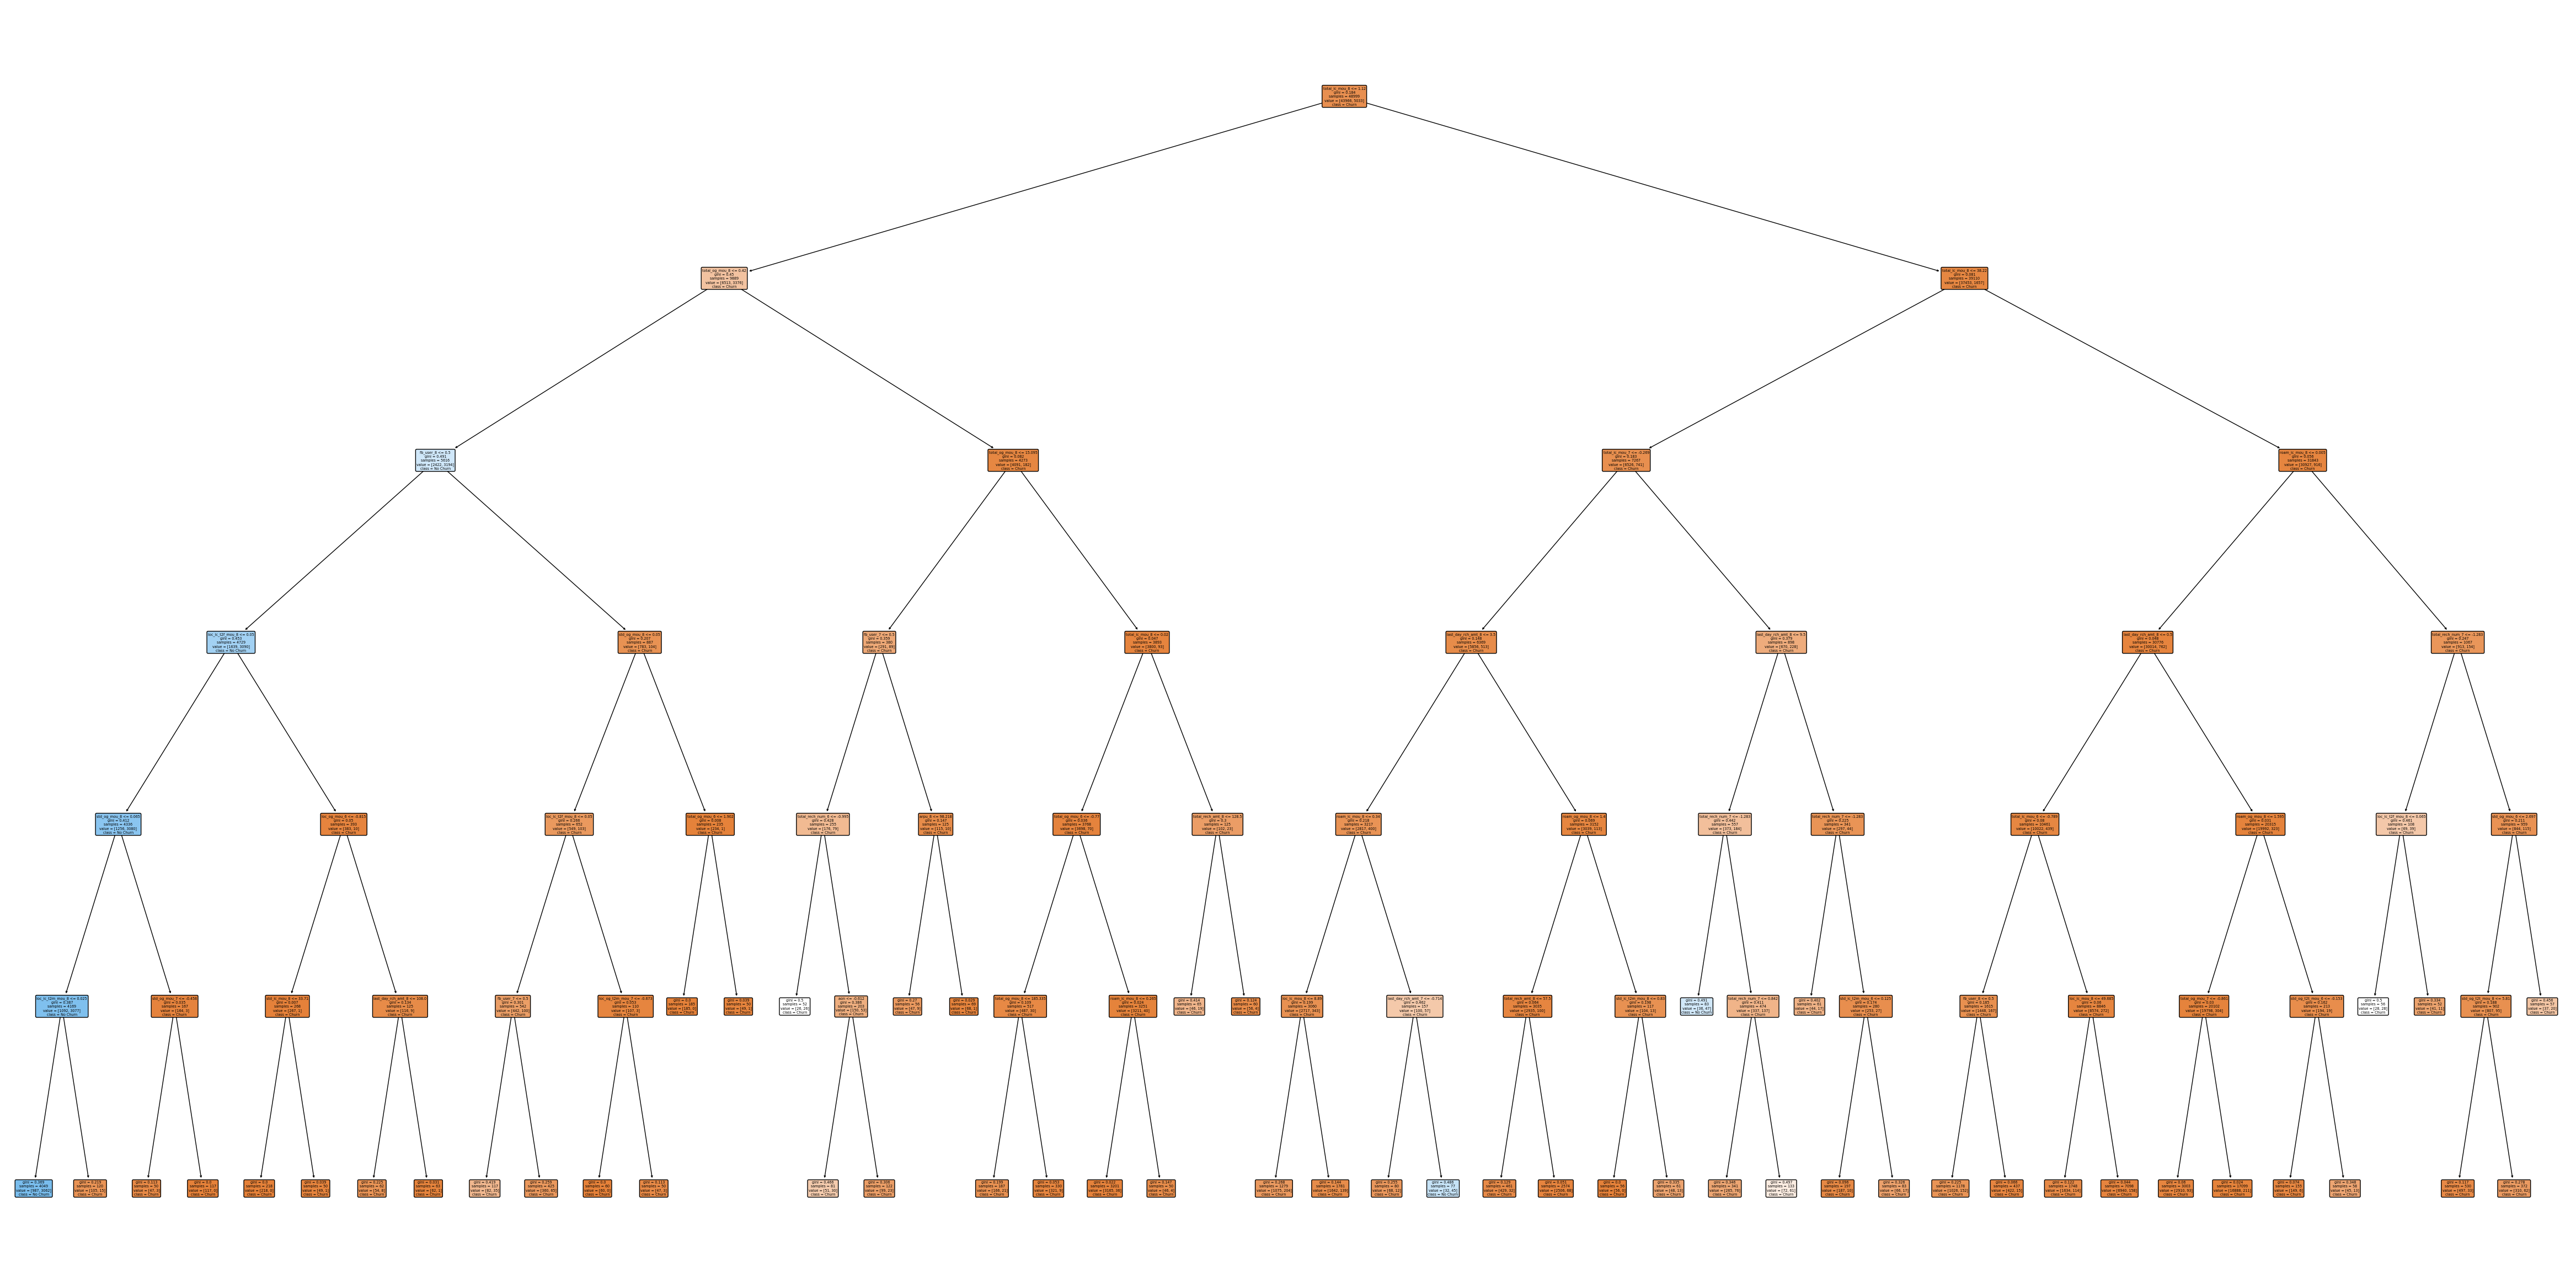

In [85]:
plt.figure(figsize=(60,30))
plot_tree(dt_best, feature_names = X_train.columns,class_names=['Churn', "No Churn"],filled=True, rounded=True)

## Model No. 4: Logistic Regression with PCA<br>Trying out logistic regression with principal components

In [86]:
learner_pca = LogisticRegression()

Fitting the model

In [87]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Prediciting the target variables

In [88]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
y_pred_pca = model_pca.predict(df_test_pca)

In [89]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.87'

Arriving at metrics of logistic regression model with principal components

In [90]:
metrics.accuracy_score(y_test, y_pred_pca)

0.9155714285714286

In [91]:
metrics.recall_score(y_test, y_pred_pca)

0.3458789899952358

It can be seen that the accuracy and recall values are lowest in this case

Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [93]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [94]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01,0.001, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.001, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [95]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.745180      0.158575         0.009512        0.002324    0.01   
1       1.304643      0.472034         0.010827        0.005645   0.001   
2       1.647494      0.382635         0.007030        0.007486     0.1   
3       1.795761      0.309221         0.011831        0.006351       1   
4       1.649272      0.213856         0.008600        0.005884      10   
5       1.666945      0.182906         0.006766        0.002285     100   
6       1.517731      0.418201         0.008755        0.008268    1000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.01}           0.357493           0.350410           0.346496   
1  {'C': 0.001}           0.327130           0.353484           0.325765   
2    {'C': 0.1}           0.333007           0.368852           0.371175   
3      {'C': 1}           0.367287           0.373975           0.374136   
4     {'C': 10}           0.330069           0.348361           0.365252   
5    {'C': 100}           0.339863           0.337090           0.371175   
6   {'C': 1000}           0.339863           0.375000           0.368213   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.374129  ...         0.355254        0.010178                4   
1           0.387065  ...         0.341557        0.026120                7   
2           0.366169  ...         0.355424        0.016449                3   
3           0.368159  ...         0.367046        0.008198                1   
4           0.377114  ...         0.354100        0.016024                5   
5           0.347264  ...         0.347644        0.012239                6   
6           0.390050  ...         0.363191        0.019209                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.365653            0.350012            0.337811   
1            0.339980            0.357160            0.323632   
2            0.341226            0.363816            0.360945   
3            0.378365            0.374661            0.371891   
4            0.342223            0.347547            0.353731   
5            0.349701            0.339660            0.366418   
6            0.344965            0.376879            0.356219   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.362959            0.363885          0.356064         0.010681  
1            0.370655            0.337983          0.345882         0.016329  
2            0.357498            0.355666          0.355830         0.007823  
3            0.351787            0.370361          0.369413         0.009224  
4            0.364945            0.367372          0.355164         0.009718  
5            0.337637            0.364633          0.351610         0.012088  
6            0.377358            0.364384          0.363961         0.012388  

[7 rows x 21 columns]

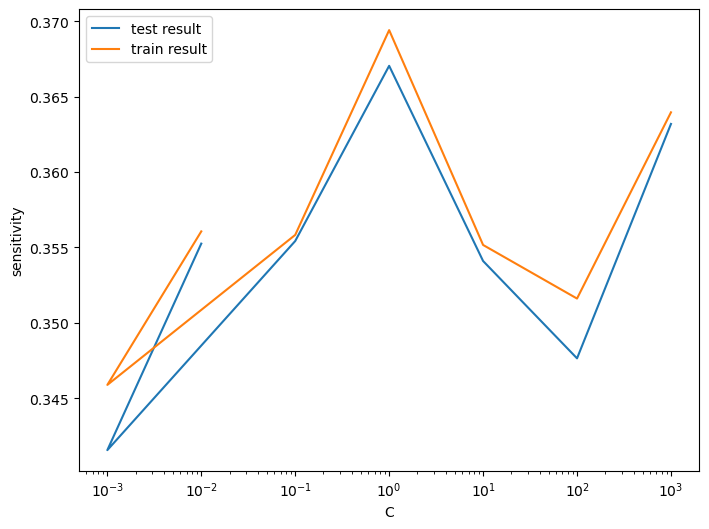

In [96]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [97]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.36704555149102225 at C = 1


## Model No. 5: Random forest with PCA

Importing the necessary libraries

In [98]:
from sklearn.ensemble import RandomForestClassifier

Instantiating the random forest model

In [99]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

<Axes: >

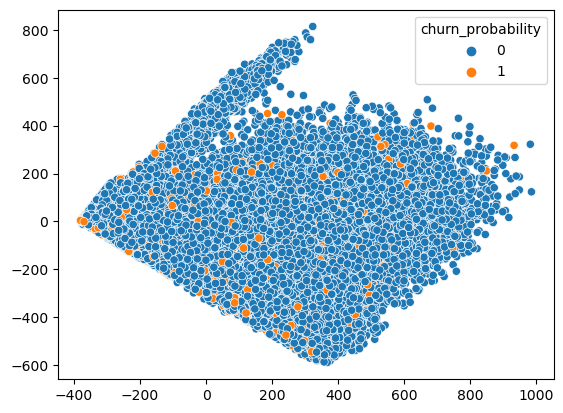

In [109]:
pca = PCA()
pca_components = pca.fit_transform(df_train_pca)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<Axes: >

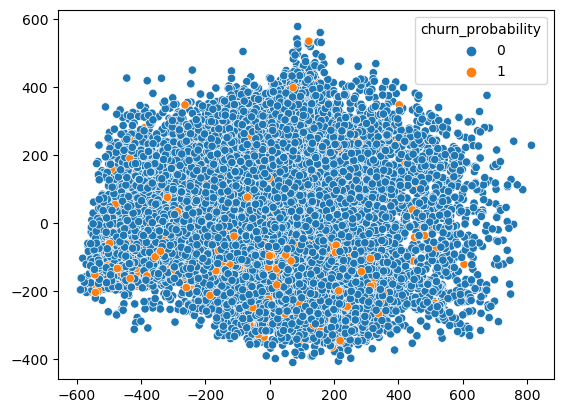

In [110]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

defining the parameters for grid search algorithm

In [106]:
params = {
    'max_depth': [1,5,10, 20],
    'min_samples_leaf': [5,10, 15, 20],
    'criterion' : ['gini'],
    'n_estimators': [200]
}


Instantiating the grid_search model

In [107]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [108]:
grid_search.fit(df_train_pca,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

The parameters of the best random forest model based on grid search CV<br> informativele took 100 minutes to arrive at the best fit..560 candidates, totalling 2240 fits

In [40]:
grid_search

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [41]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [42]:
grid_search.best_score_

0.9373252943597228

In [44]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

Assigning best estimator to rf_best_pca

In [43]:
rf_best_pca = grid_search.best_estimator_

Model evaluation to arrive at the metrics

In [ ]:
evaluate_model_DT(rf_best_pca)

Train set performance
0.9576113798240781
[[43690   276]
 [ 1801  3232]]
--------------------------------------------------
Test set performance
0.9404761904761905
[[18608   293]
 [  957  1142]]
0.5440686040971892


### Testing the models

Importing the test data

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [ ]:
df_test.shape

(30000, 171)

Applying the same data transformations as for the training data

In [ ]:
for i in df_test.columns:
    if 'date' in i:
        df_test = df_test.drop(i, axis =1)

df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0  69999        109             0.0             0.0             0.0   91.882   
1  70000        109             0.0             0.0             0.0  414.168   
2  70001        109             0.0             0.0             0.0  329.844   
3  70002        109             0.0             0.0             0.0   43.550   
4  70003        109             0.0             0.0             0.0  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  ...  sachet_3g_6  sachet_3g_7  \
0   65.330   64.445        31.78        20.23  ...            0            0   
1  515.568  360.868        75.51        41.21  ...            0            0   
2  434.884  746.239         7.54         7.86  ...            0            0   
3  171.390   24.400         5.31         2.16  ...            0            0   
4  406.289  413.329       450.93       609.03  ...            0            0   

   sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
0            0        NaN        NaN        NaN  1692        0.00        0.00   
1            0        NaN        NaN        NaN  2533        0.00        0.00   
2            0        NaN        NaN        NaN   277      525.61      758.41   
3            0        NaN        NaN        NaN  1244        0.00        0.00   
4            0        NaN        NaN        NaN   462        0.00        0.00   

   jun_vbc_3g  
0        0.00  
1        0.00  
2      241.84  
3        0.00  
4        0.00  

[5 rows x 162 columns]

In [ ]:
df_test = df_test.drop('id', axis =1 )
df_test.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0        109             0.0             0.0             0.0   91.882   
1        109             0.0             0.0             0.0  414.168   
2        109             0.0             0.0             0.0  329.844   
3        109             0.0             0.0             0.0   43.550   
4        109             0.0             0.0             0.0  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  sachet_3g_6  \
0   65.330   64.445        31.78        20.23        23.11  ...            0   
1  515.568  360.868        75.51        41.21        19.84  ...            0   
2  434.884  746.239         7.54         7.86         8.40  ...            0   
3  171.390   24.400         5.31         2.16         0.00  ...            0   
4  406.289  413.329       450.93       609.03       700.68  ...            0   

   sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
0            0            0        NaN        NaN        NaN  1692   
1            0            0        NaN        NaN        NaN  2533   
2            0            0        NaN        NaN        NaN   277   
3            0            0        NaN        NaN        NaN  1244   
4            0            0        NaN        NaN        NaN   462   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        0.00        0.00        0.00  
1        0.00        0.00        0.00  
2      525.61      758.41      241.84  
3        0.00        0.00        0.00  
4        0.00        0.00        0.00  

[5 rows x 161 columns]

In [ ]:
df_test = df_test.drop('circle_id', axis =1 )
df_test.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0   91.882   65.330   64.445   
1             0.0             0.0             0.0  414.168  515.568  360.868   
2             0.0             0.0             0.0  329.844  434.884  746.239   
3             0.0             0.0             0.0   43.550  171.390   24.400   
4             0.0             0.0             0.0  306.854  406.289  413.329   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  sachet_3g_6  \
0        31.78        20.23        23.11         60.16  ...            0   
1        75.51        41.21        19.84        474.34  ...            0   
2         7.54         7.86         8.40         16.98  ...            0   
3         5.31         2.16         0.00         40.04  ...            0   
4       450.93       609.03       700.68         60.94  ...            0   

   sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
0            0            0        NaN        NaN        NaN  1692   
1            0            0        NaN        NaN        NaN  2533   
2            0            0        NaN        NaN        NaN   277   
3            0            0        NaN        NaN        NaN  1244   
4            0            0        NaN        NaN        NaN   462   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        0.00        0.00        0.00  
1        0.00        0.00        0.00  
2      525.61      758.41      241.84  
3        0.00        0.00        0.00  
4        0.00        0.00        0.00  

[5 rows x 160 columns]

In [ ]:
df_test = df_test.fillna(0)
df_test.isnull().sum()

loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
arpu_6            0
arpu_7            0
                 ..
fb_user_8         0
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
Length: 160, dtype: int64

In [ ]:
percentile_90 = df_test.quantile(0.9)
df_test = df_test[df_test <= percentile_90]

In [ ]:
percentile_05 = df_test.quantile(0.05)
df_test = df_test[df_test >= percentile_05]

In [ ]:
df_test.isnull().sum()

loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
arpu_6            4349
arpu_7            3157
                  ... 
fb_user_8            0
aon               4343
aug_vbc_3g        3000
jul_vbc_3g        3000
jun_vbc_3g        3000
Length: 160, dtype: int64

In [ ]:
df_test = df_test.fillna(0)

In [ ]:
X_test_final = df_test

In [ ]:
X_test_final.shape

(30000, 160)

In [ ]:
X_test_final[num_col] = scaler.fit_transform(X_test_final[num_col])
X_test_final.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0 -0.589322 -0.732123   
1             0.0             0.0             0.0  1.433964  2.112654   
2             0.0             0.0             0.0  0.904585  1.602862   
3             0.0             0.0             0.0 -0.892747 -0.061995   
4             0.0             0.0             0.0  0.760255  1.422187   

    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
0   64.445    -0.241428    -0.394151        23.11     -0.358253  ...   
1  360.868     0.389473    -0.095617        19.84     -0.906012  ...   
2    0.000    -0.591143    -0.570170         8.40     -0.751408  ...   
3   24.400    -0.623316    -0.651278         0.00     -0.541446  ...   
4  413.329    -0.699924    -0.682014         0.00     -0.351151  ...   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0          0.0          0.0          0.0        0.0        0.0        0.0   
1          0.0          0.0          0.0        0.0        0.0        0.0   
2          0.0          0.0          0.0        0.0        0.0        0.0   
3          0.0          0.0          0.0        0.0        0.0        0.0   
4          0.0          0.0          0.0        0.0        0.0        0.0   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0  1.060738         0.0   -0.198679     -0.1832  
1  2.169979         0.0   -0.198679     -0.1832  
2 -0.805583         0.0   -0.198679     -0.1832  
3  0.469846         0.0   -0.198679     -0.1832  
4 -0.561576         0.0   -0.198679     -0.1832  

[5 rows x 160 columns]

In [ ]:
X_test_final = X_test_final.fillna(0)

## Predictions on model No. 1: Logistic regression without Principal Component Analysis

Predictions on test set with simple logistic regression

In [ ]:
y_pred_final_lr = lr.predict(X_test_final)

In [ ]:
y_pred_final_lr.shape

(30000,)

Predictions based on Model No. 2<br>Predictions based on Simple decision tree

In [ ]:
y_pred_final_dt = dt_best.predict(X_test_final)

In [ ]:
y_pred_final_dt.shape

(30000,)

### Predictions after doing PCA

Transforming the test data

In [ ]:
X_test_final_pca = pca_final.transform(X_test_final)

Predictions based on model No. 3: Decision tree on principal components

Predictions using decision tree after doing PCA

In [ ]:
y_pred_final_dt_pca = dt_best_pca.predict(X_test_final_pca)

In [ ]:
y_pred_final_dt_pca.shape

(30000,)

### Predictions on model no. 4: Logistic regression on principal components

In [ ]:
y_pred_final_lr_pca = model_pca.predict(X_test_final_pca)

In [ ]:
y_pred_final_lr_pca.shape

(30000,)

Preparing the final submission files for kaggle based on each model

To extract only IDs

In [ ]:
df_result = pd.read_csv('test.csv')

In [ ]:
df_result = df_result.pop('id')
df_result.head()

0    69999
1    70000
2    70001
3    70002
4    70003
Name: id, dtype: int64

### Model No. 2: Decision tree final submission

Model No. 1 is not chosen for final submssion since the scores were less

In [ ]:
df_result_DT = pd.DataFrame(data = y_pred_final_dt, columns=['churn_probability'])

In [ ]:
df_result_DT.head()

churn_probability
0                  0
1                  0
2                  1
3                  0
4                  0

In [ ]:
df_result.shape

(30000,)

In [ ]:
df_result_DT.shape

(30000, 1)

In [ ]:
predictions_DT = pd.concat([df_result, df_result_DT], axis = 1)

In [ ]:
predictions_DT.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [ ]:
predictions_DT.to_csv('submission_dt_050324.csv', index=False)

### Model No. 3 Decision tree with PCA final submission


In [ ]:
df_result_DT_PCA = pd.DataFrame(data =y_pred_final_dt_pca, columns=['churn_probability'])
df_result_DT_PCA.head()


churn_probability
0                  0
1                  0
2                  0
3                  0
4                  0

In [ ]:
df_result_DT_PCA.shape

(30000, 1)

In [ ]:
predictions_DT_PCA = pd.concat([df_result, df_result_DT_PCA], axis = 1)

In [ ]:
predictions_DT_PCA.to_csv('submission_DT_PCA_050324.csv', index=False)

### Model No. 4 Logistic Regression with PCA Final submission

In [ ]:
df_result_LR_PCA = pd.DataFrame(data =y_pred_final_lr_pca, columns=['churn_probability'])
df_result_LR_PCA.head()


churn_probability
0                  0
1                  0
2                  0
3                  0
4                  0

In [ ]:
df_result_DT_PCA.shape

(30000, 1)

In [ ]:
predictions_LR_PCA = pd.concat([df_result, df_result_LR_PCA], axis = 1)

In [ ]:
predictions_LR_PCA.to_csv('submission_LR_PCA_050324.csv', index=False)

### Model No.5: Predictions on test data based on random forest with PCA

It can be seen that the results are comparable with decision tree models though decision tree with the original feature variables have a slight upper hand in accuracy and recall values

In [69]:
y_pred_final_rf_pca = rf_best_pca.predict(X_test_final_pca)

In [70]:
df_result_RF_PCA = pd.DataFrame(data =y_pred_final_rf_pca, columns=['churn_probability'])
df_result_RF_PCA.head()


churn_probability
0                  0
1                  0
2                  0
3                  0
4                  0

In [71]:
df_result_RF_PCA.shape

(30000, 1)

In [75]:
predictions_RF_PCA = pd.concat([df_result, df_result_RF_PCA], axis = 1)

In [76]:
predictions_RF_PCA.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [77]:
predictions_RF_PCA.to_csv('submission_RF_PCA_050324.csv', index=False)

To arrive at the influential predictor variables, decision tree without PCA is used.

In [82]:
dt_best.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.15417185e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.16362214e-02, 0.00000000e+00,
       0.00000000e+00, 8.80449431e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.68561561e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.89596606e-04, 0.00000000e+00,
       0.00000000e+00, 6.92576086e-04, 0.00000000e+00, 1.13702441e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.54275997e-03, 6.01835058e-05, 4.16839364e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [83]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

In [85]:
important_features = imp_df.sort_values(by="Imp", ascending=False)

In [89]:
important_features.head(31)

Varname       Imp
89       total_ic_mou_8  0.353528
59       total_og_mou_8  0.328306
155           fb_user_8  0.103835
68     loc_ic_t2f_mou_8  0.082815
47         std_og_mou_8  0.041684
65     loc_ic_t2m_mou_8  0.022162
110  last_day_rch_amt_8  0.012470
14        roam_ic_mou_8  0.011636
88       total_ic_mou_7  0.011287
100    total_rech_num_7  0.008618
71         loc_ic_mou_8  0.003592
109  last_day_rch_amt_7  0.003534
87       total_ic_mou_6  0.003441
154           fb_user_7  0.003050
45         std_og_mou_6  0.001543
35     std_og_t2t_mou_8  0.001137
99     total_rech_num_6  0.001128
104    total_rech_amt_8  0.001103
17        roam_og_mou_8  0.000880
156                 aon  0.000768
33     std_og_t2t_mou_6  0.000693
75     std_ic_t2m_mou_6  0.000661
77     std_ic_t2m_mou_8  0.000633
57       total_og_mou_6  0.000453
58       total_og_mou_7  0.000423
5                arpu_8  0.000315
30         loc_og_mou_6  0.000190
46         std_og_mou_7  0.000060
22     loc_og_t2m_mou_7  0.000047
86         std_ic_mou_8  0.000008
114     max_rech_data_6  0.000000

## Conclusion

The most influential 10 nos features in the descending order of importance are:  <br>
    - 1. total_ic_mou_8	<br>
    - 2. total_og_mou_8	<br>
    - 3. fb_user_8	<br>
    - 4. loc_ic_t2f_mou_8	<br>
    - std_og_mou_8	<br>
    - loc_ic_t2m_mou_8 <br>	
    - last_day_rch_amt_8 <br>	
    - roam_ic_mou_8	<br>
    - total_ic_mou_7	<br>
    - total_rech_num_7	<br>
    <br>

Best model based on accuracy is decision tree model with the original feature variables without usig PCA.<br> Accuracy is 0.941<br>
Recall is 0.617